# Projet Machine Learning 4A - Notebook R

## Importation des librairies


In [97]:
library(plotly)
library(dplyr)
library(corrplot)
library(ggplot2)
library(ggbiplot)
library(factoextra)
library(FactoMineR)
library(gridExtra)
library(caret)
library(glmnet)
library(MASS)
library(e1071)
library(rpart)
library(rpart.plot)
library(partykit)
library(randomForest)
library(gbm)
library(neuralnet)
library(ggRandomForests)
library(xgboost)
library(nnet)
library(missForest)

## Importation du jeu de données

In [2]:
data <- read.csv("global-data-on-sustainable-energy (1).csv", header = TRUE)
head(data)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

En affichant que les 5 premières lignes de notre data frame, on remarque déjà qu'il y a des données manquantes.

# Partie 1 : Analyse exploratoire du jeu de données

### Question 1


On affiche les types des variables


In [3]:
str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Nous remarquons qu'il se trouve alors 21 variables dans notre jeu de données. Nous avons deux variables qualitatives : Entity et Year.

In [4]:
summary(data)

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

Nous remarquons que les variables ne possèdent pas le même nombre d'observations. Nous pourrons l'observer plus précisément plus tard. De plus, cette analyse est faite sur les variables quantitatives de notre jeu de données, et nous pouvons observer la présence de la variable 'Year', qui devrait être quantitative, ainsi que l'abscence de la variable 'Density', qui elle devrait être quantitative. Des transformations du type des variables s'imposent !

In [5]:
#On transforme la variable Year en qualitative
data$Year <- as.factor(data$Year)
class(data$Year)

[1] "factor"

In [6]:
#On transforme la densité en variable numérique
data$Density.n.P.Km2.<-as.numeric(gsub(",","",data$Density.n.P.Km2.))
class(data$Density.n.P.Km2.)

[1] "numeric"

On bien changé la variable 'Density' en numérique.

In [7]:
#On vérifie qu'on a les bons types 
str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nucl

### Question 2


In [8]:
#Afficher le nombre de valeurs manquantes par variables

données_manquantes <- colSums(is.na(data))
print(données_manquantes)

                                                          Entity 
                                                               0 
                                                            Year 
                                                               0 
                         Access.to.electricity....of.population. 
                                                              10 
                               Access.to.clean.fuels.for.cooking 
                                                             169 
            Renewable.electricity.generating.capacity.per.capita 
                                                             931 
                  Financial.flows.to.developing.countries..US... 
                                                            2089 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                             194 
                             Electricity.from.fossil.fuels..TWh. 
          

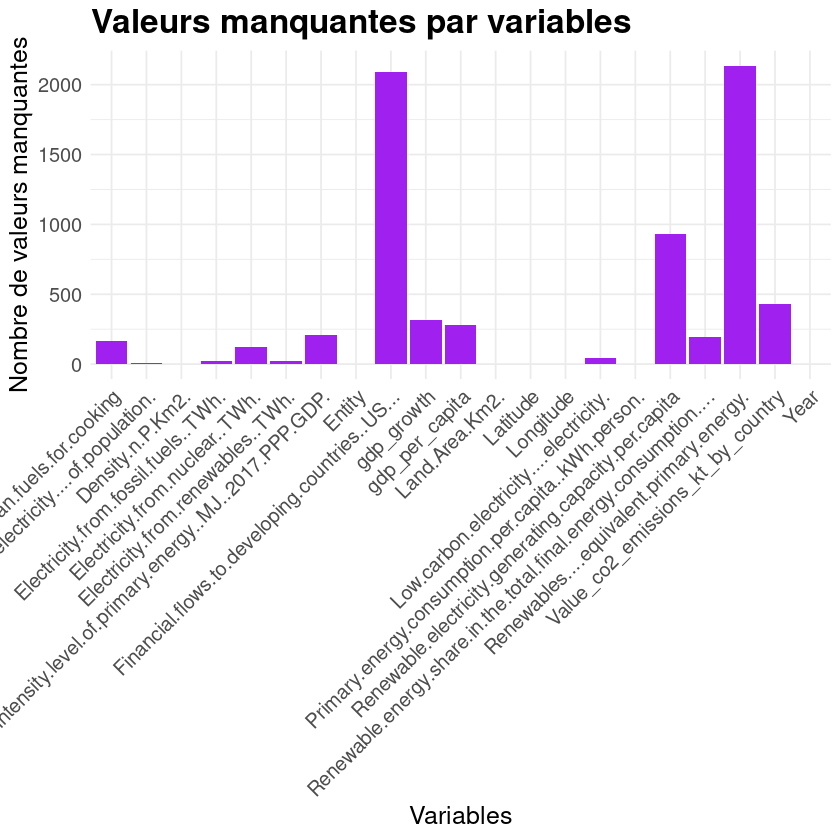

In [9]:
options(height=10, width=15)
df_manquantes <- data.frame(
  Variable = names(données_manquantes),
  ValeursManquantes = données_manquantes
)

fig <- ggplot(df_manquantes, aes(x = Variable, y = ValeursManquantes)) +
  geom_bar(stat = "identity", fill = "purple") +
  labs(title = "Valeurs manquantes par variables",
       x = "Variables",
       y = "Nombre de valeurs manquantes") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 15),
    axis.title.y = element_text(size = 15),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12)
  )
print(fig)

In [10]:
#On récupère le nom complet des variables
names(data)

[1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.electricity.generating.capacity.per.capita"            
 [6] "Financial.flows.to.developing.countries..US..."                  
 [7] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [8] "Electricity.from.fossil.fuels..TWh."                             
 [9] "Electricity.from.nuclear..TWh."                                  
[10] "Electricity.from.renewables..TWh."                               
[11] "Low.carbon.electricity....electricity."                          
[12] "Primary.energy.consumption.per.capita..kWh.person."              
[13] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[14] "Value_co2_emissions_kt_by_country"                               
[15] "Renewables....equivalent.primary.energy."                        
[16] "gdp_growth"                                                      
[17] "gdp_per_capita"                                                  
[18] "Density.n.P.Km2."                                                
[19] "Land.Area.Km2."                                                  
[20] "Latitude"                                                        
[21] "Longitude"

In [11]:
#On supprime les variables comportant un taux de données manquantes très important

data <- subset(data, select = -c(Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.))

In [12]:
#On vérifie que data a bien les 3 variables précédentes en moins

names(data)
dim(data)

[1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [6] "Electricity.from.fossil.fuels..TWh."                             
 [7] "Electricity.from.nuclear..TWh."                                  
 [8] "Electricity.from.renewables..TWh."                               
 [9] "Low.carbon.electricity....electricity."                          
[10] "Primary.energy.consumption.per.capita..kWh.person."              
[11] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[12] "Value_co2_emissions_kt_by_country"                               
[13] "gdp_growth"                                                      
[14] "gdp_per_capita"                                                  
[15] "Density.n.P.Km2."                                                
[16] "Land.Area.Km2."                                                  
[17] "Latitude"                                                        
[18] "Longitude"

[1] 3649   18

### Question 3


In [13]:
# On créé un nouveau jeu de données comportant seulement les individus sans valeurs manquantes
#data_sans_val_manquantes=data2
#data3=data2
#data4=data2 (modif des noms variables)
#data6=data3





data2 <- data[complete.cases(data), ]

In [14]:
#On vérifie qu'on a bien 2868 observations dans le jeu de données complet

nrow(data2)
dim(data2)


[1] 2868

[1] 2868   18

# Analyse descriptive unidimensionnelle

### Question 4

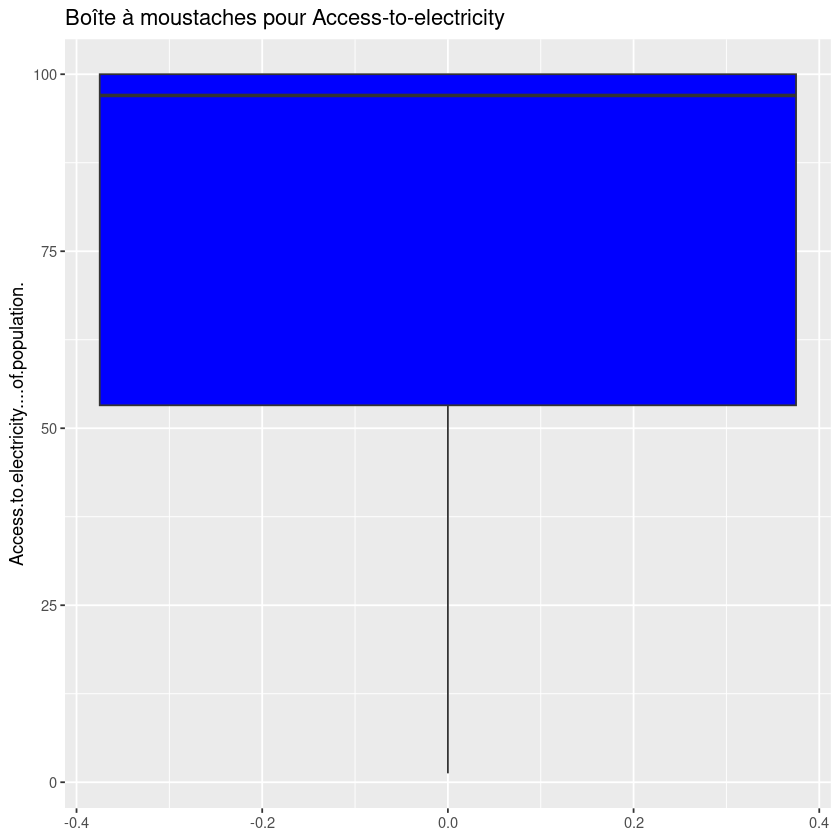

In [15]:
ggplot(data2, aes(y = `Access.to.electricity....of.population.`)) +
  geom_boxplot(fill = "blue") +
  labs(title = "Boîte à moustaches pour Access-to-electricity")

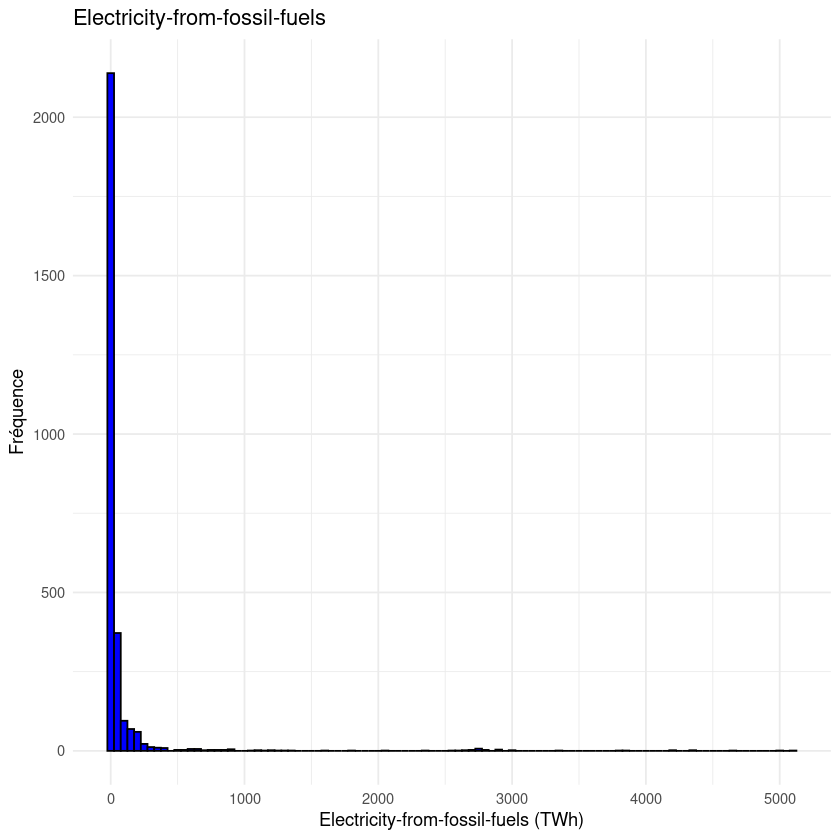

In [16]:
# Autre type d'analyse descriptive de variable qualitative

ggplot(data2, aes(x = `Electricity.from.fossil.fuels..TWh.`)) +
  geom_histogram(binwidth = 50, fill = "blue", color = "black") +
  labs(title = "Electricity-from-fossil-fuels",
       x = "Electricity-from-fossil-fuels (TWh)",
       y = "Fréquence") +
  theme_minimal()

# Nous remarquons que cette variable possède bcp de données entre 0 et 500 TWh

In [17]:
#ggplot(data2, aes(x = `Electricity.from.fossil.fuels..TWh.`)) +
 # geom_density(fill = "skyblue", alpha = 0.5) +
  #labs(title = "Densité de Electricity-from-fossil-fuels")

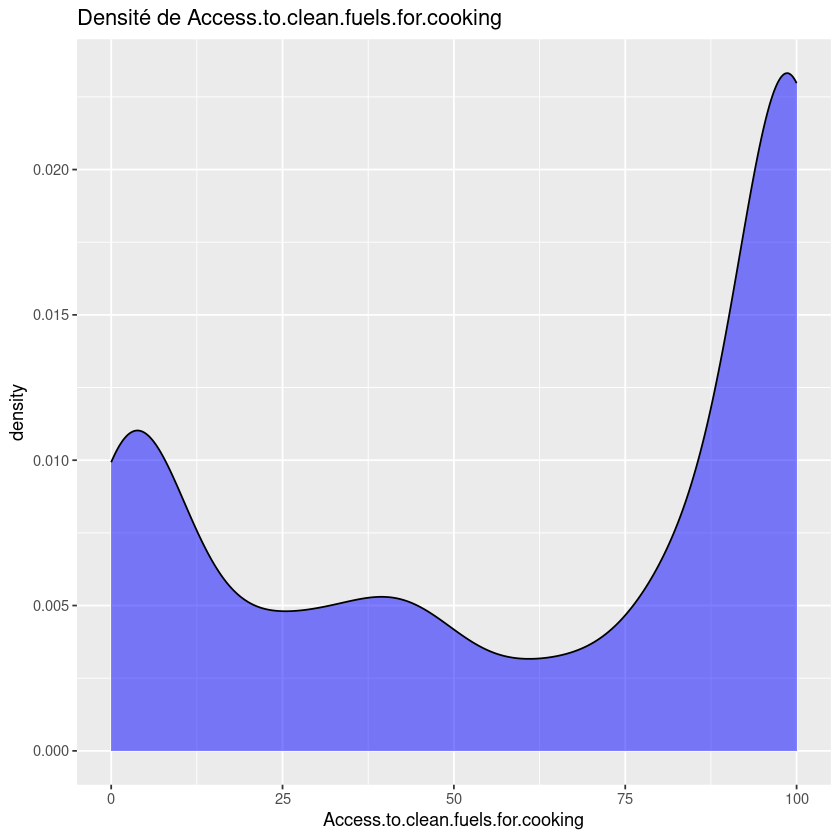

In [18]:
ggplot(data2, aes(x = `Access.to.clean.fuels.for.cooking`)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "Densité de Access.to.clean.fuels.for.cooking")

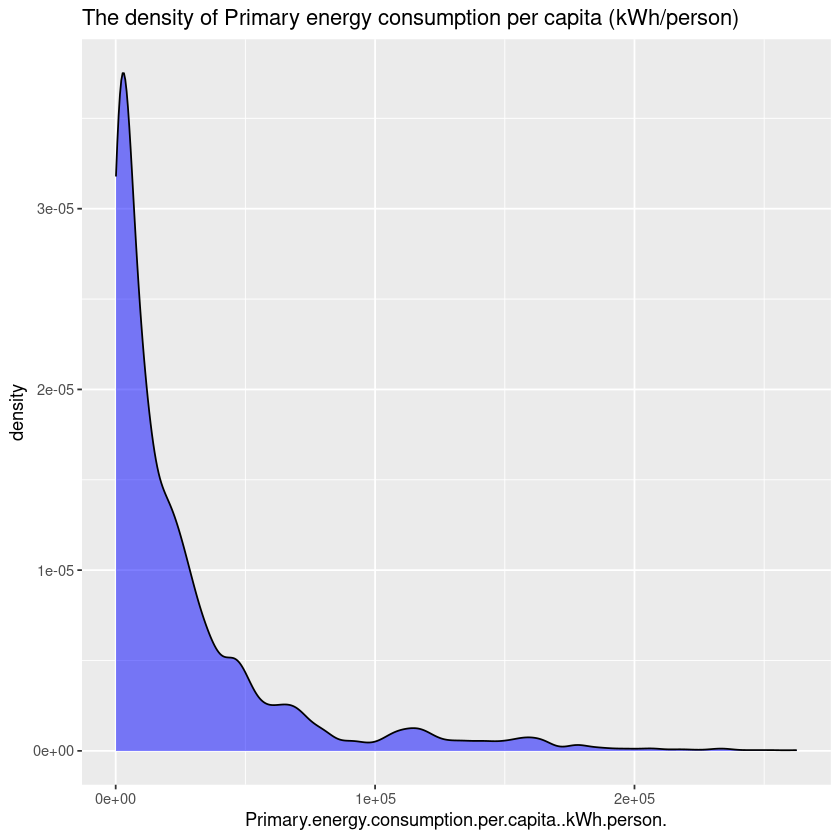

In [19]:
ggplot(data2, aes(x=`Primary.energy.consumption.per.capita..kWh.person.`)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "The density of Primary energy consumption per capita (kWh/person)")

In [20]:
#On applique une transformation logarithmique à cette variable

data2$Primary_energy_consumption_per_capita_new <- log(data2$Primary.energy.consumption.per.capita..kWh.person.)

#On supprime la variable sans transformation

data2 <- subset(data2, select = -c(Primary.energy.consumption.per.capita..kWh.person.))

dim(data2)
names(data2)


[1] 2868   18

[1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [6] "Electricity.from.fossil.fuels..TWh."                             
 [7] "Electricity.from.nuclear..TWh."                                  
 [8] "Electricity.from.renewables..TWh."                               
 [9] "Low.carbon.electricity....electricity."                          
[10] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[11] "Value_co2_emissions_kt_by_country"                               
[12] "gdp_growth"                                                      
[13] "gdp_per_capita"                                                  
[14] "Density.n.P.Km2."                                                
[15] "Land.Area.Km2."                                                  
[16] "Latitude"                                                        
[17] "Longitude"                                                       
[18] "Primary_energy_consumption_per_capita_new"

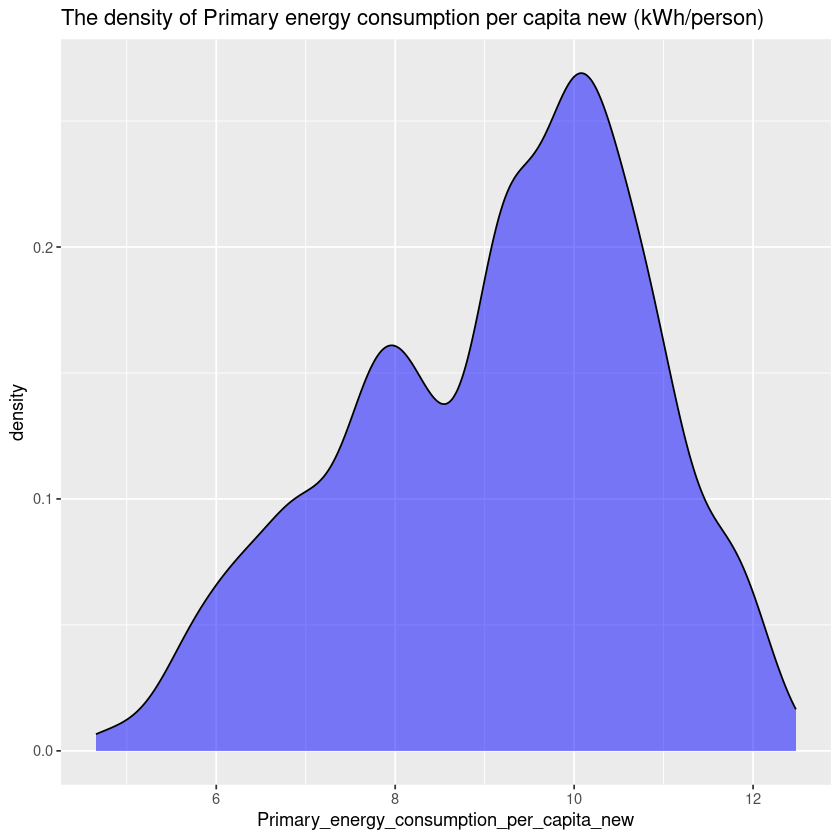

In [21]:
#On affiche la nouvelle densité :
ggplot(data2, aes(x=`Primary_energy_consumption_per_capita_new`)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "The density of Primary energy consumption per capita new (kWh/person)")

Nous avons bien effectué notre transformation logarithmique sur la variable "Primary.energy.consumption.per.capita..kWh.person.".

### Question 5

In [22]:
#On renomme la colonne "Value_co2_emissions_kt_by_country_new" en "CO2" 
data2 <- data2 %>%
  rename(CO2 = Value_co2_emissions_kt_by_country)

In [23]:
#On vérifie :
names(data2)

[1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [6] "Electricity.from.fossil.fuels..TWh."                             
 [7] "Electricity.from.nuclear..TWh."                                  
 [8] "Electricity.from.renewables..TWh."                               
 [9] "Low.carbon.electricity....electricity."                          
[10] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[11] "CO2"                                                             
[12] "gdp_growth"                                                      
[13] "gdp_per_capita"                                                  
[14] "Density.n.P.Km2."                                                
[15] "Land.Area.Km2."                                                  
[16] "Latitude"                                                        
[17] "Longitude"                                                       
[18] "Primary_energy_consumption_per_capita_new"

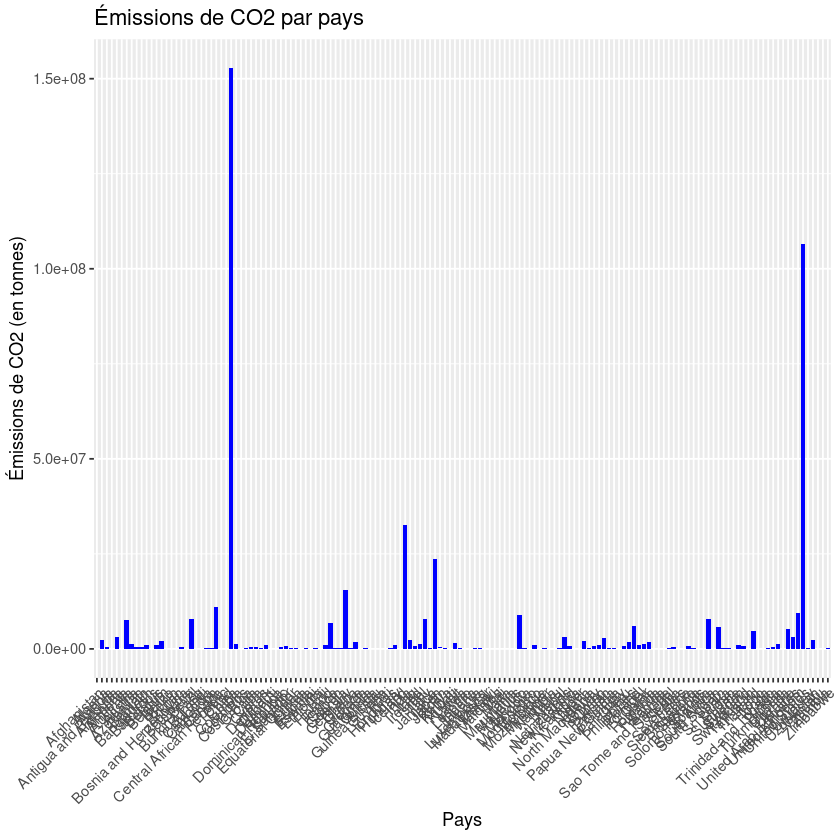

In [24]:
#Nous pouvons observer les émissions de CO2 par pays

ggplot(data2, aes(x = Entity, y = CO2)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Émissions de CO2 par pays",
       x = "Pays",
       y = "Émissions de CO2 (en tonnes)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

#Légende difficile à lire mais on voit une hétérogénéité entre les pays

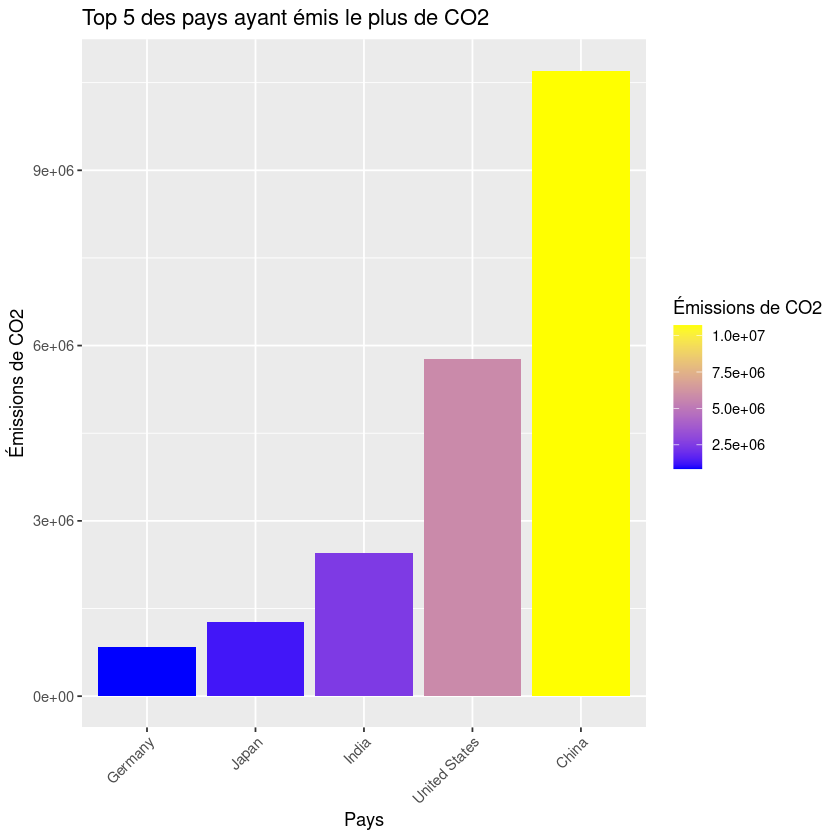

In [25]:
#On veut mtn voir les 5 pays les plus emetteurs en CO2:


#On calcule les émissions maximales de CO2 par pays
CO2_max <- data2 %>%
  group_by(Entity) %>%
  summarise(CO2 = max(CO2)) %>%
  arrange(desc(CO2)) %>%
  head(5)

ggplot(CO2_max, aes(x = reorder(Entity, CO2), y = CO2, fill = CO2)) +
  geom_bar(stat = "identity") +
  labs(title = "Top 5 des pays ayant émis le plus de CO2",
       x = "Pays",
       y = "Émissions de CO2",
       fill = "Émissions de CO2") +
  scale_fill_gradient(low = "blue", high = "yellow") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotation des noms de pays sur l'axe x

# Analyse descriptive multidimensionnelle

### Question 6


In [26]:
str(data2)
names(data2)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access.to.electricity....of.population.                         : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access.to.clean.fuels.for.cooking                               : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low.carbon.electricity....e

[1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [6] "Electricity.from.fossil.fuels..TWh."                             
 [7] "Electricity.from.nuclear..TWh."                                  
 [8] "Electricity.from.renewables..TWh."                               
 [9] "Low.carbon.electricity....electricity."                          
[10] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[11] "CO2"                                                             
[12] "gdp_growth"                                                      
[13] "gdp_per_capita"                                                  
[14] "Density.n.P.Km2."                                                
[15] "Land.Area.Km2."                                                  
[16] "Latitude"                                                        
[17] "Longitude"                                                       
[18] "Primary_energy_consumption_per_capita_new"

In [27]:

# On renomme les colonnes du dataframe 2
data2 <- data2 %>%
  rename(Access_to_electricity = Access.to.electricity....of.population.,
         Access_to_clean_fuels_for_cooking = Access.to.clean.fuels.for.cooking,
         Renewable_energy_share_in_the_total_final_energy_consumption = Renewable.energy.share.in.the.total.final.energy.consumption....,
         Electricity_from_fossil_fuels = Electricity.from.fossil.fuels..TWh.,
         Electricity_from_nuclear = Electricity.from.nuclear..TWh.,
         Electricity_from_renewables = Electricity.from.renewables..TWh.,
         Low_carbon_electricity = Low.carbon.electricity....electricity.,
         Energy_intensity_level_of_primary_energy = Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,
         Density_n_P_Km2 = Density.n.P.Km2.,
         Land_Area = Land.Area.Km2.)

names(data2)

[1] "Entity"                                                      
 [2] "Year"                                                        
 [3] "Access_to_electricity"                                       
 [4] "Access_to_clean_fuels_for_cooking"                           
 [5] "Renewable_energy_share_in_the_total_final_energy_consumption"
 [6] "Electricity_from_fossil_fuels"                               
 [7] "Electricity_from_nuclear"                                    
 [8] "Electricity_from_renewables"                                 
 [9] "Low_carbon_electricity"                                      
[10] "Energy_intensity_level_of_primary_energy"                    
[11] "CO2"                                                         
[12] "gdp_growth"                                                  
[13] "gdp_per_capita"                                              
[14] "Density_n_P_Km2"                                             
[15] "Land_Area"                                                   
[16] "Latitude"                                                    
[17] "Longitude"                                                   
[18] "Primary_energy_consumption_per_capita_new"

In [28]:
# On convertit la variable "Land-Area" qui est en entier en réel
data2 <- data2 %>%
  mutate(Land_Area = as.numeric(Land_Area))
str(data2)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                                                      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                        : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_electricity                                       : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_clean_fuels_for_cooking                           : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share_in_the_total_final_energy_consumption: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Electricity_from_fossil_fuels                               : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Electricity_from_nuclear                                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity_from_renewables                                 : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_electricity                                     

[1] "Entity"                                                      
 [2] "Year"                                                        
 [3] "Access_to_electricity"                                       
 [4] "Access_to_clean_fuels_for_cooking"                           
 [5] "Renewable_energy_share_in_the_total_final_energy_consumption"
 [6] "Electricity_from_fossil_fuels"                               
 [7] "Electricity_from_nuclear"                                    
 [8] "Electricity_from_renewables"                                 
 [9] "Low_carbon_electricity"                                      
[10] "Energy_intensity_level_of_primary_energy"                    
[11] "CO2"                                                         
[12] "gdp_growth"                                                  
[13] "gdp_per_capita"                                              
[14] "Density_n_P_Km2"                                             
[15] "Land_Area"                                                   
[16] "Latitude"                                                    
[17] "Longitude"                                                   
[18] "Primary_energy_consumption_per_capita_new"

[1] 2868   18

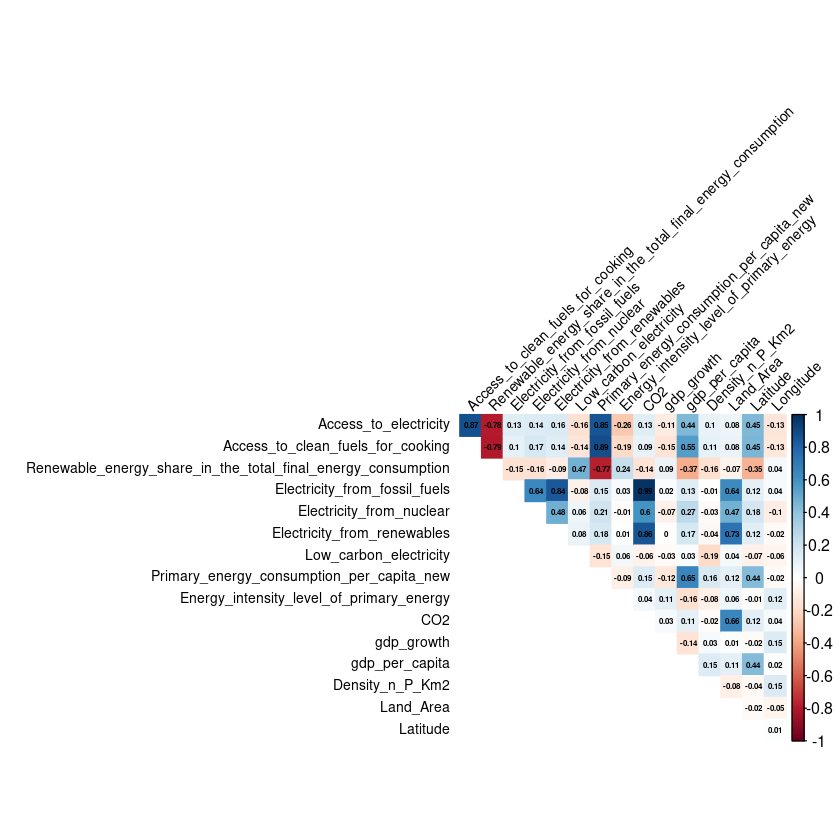

In [29]:
names(data2)


cols <- c('Access_to_electricity',
          'Access_to_clean_fuels_for_cooking',
          'Renewable_energy_share_in_the_total_final_energy_consumption',
          'Electricity_from_fossil_fuels',
          'Electricity_from_nuclear',
          'Electricity_from_renewables',
          'Low_carbon_electricity',
          'Primary_energy_consumption_per_capita_new',
          'Energy_intensity_level_of_primary_energy',
          'CO2',
          'gdp_growth',
          'gdp_per_capita',
          'Density_n_P_Km2',
          'Land_Area',
          'Latitude',
          'Longitude')


correlation_matrix <- cor(data2[cols])
dim(data2)

corrplot(correlation_matrix, 
          method = "color", 
          type = "upper", 
          tl.col = "black", 
          tl.srt = 45, 
          tl.cex = 0.7,
          diag = FALSE,  
          addCoef.col = "black",  
          number.cex = 0.4,  
          tl.pos = "lt")

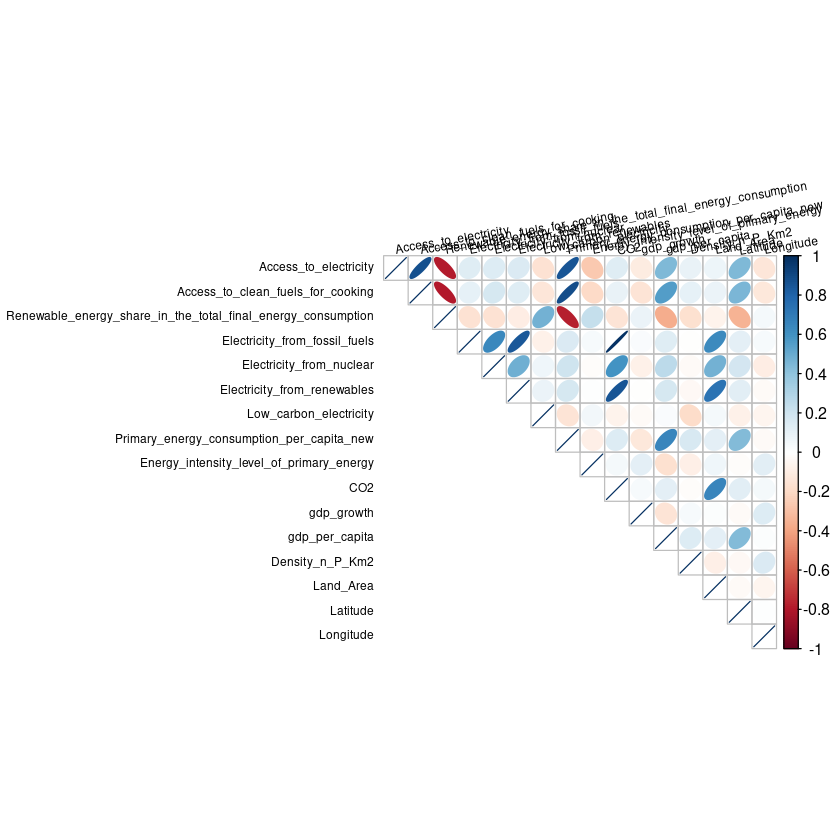

In [30]:
corrplot(correlation_matrix, 
          method = "ellipse",  # Utiliser la méthode ellipse
          tl.pos = "lt", type = "upper", 
          tl.col = "black", 
          tl.srt = 10, 
          tl.cex = 0.6)

In [31]:
#On trace un scatterplot pour toutes les variables de corrélation

#pairs(data2[, c('Access_to_electricity', 'Access_to_clean_fuels_for_cooking', 'Renewable_energy_share_in_the_total_final_energy_consumption', 'Electricity_from_fossil_fuels', 'Electricity_from_nuclear', 'Electricity_from_renewables', 'Low_carbon_electricity', 'Primary_energy_consumption_per_capita_new', 'Energy_intensity_level_of_primary_energy', 'CO2', 'gdp_growth', 'gdp_per_capita', 'Density_n_P_Km2', 'Land_Area', 'Latitude', 'Longitude')], main = "Scatterplot pour les variables de corrélation")

#On voit pas grand chose, on va essayer de tracer plutôt un scatterplot pour les deux variables les plus corrélées

In [32]:
#On veut voir quelles sont les paires de variables les plus corrélées
paires_plus_cor <- which(correlation_matrix == max(correlation_matrix[lower.tri(correlation_matrix)], na.rm = TRUE), arr.ind = TRUE)

#On affiche ces variables
var_plus_cor <- colnames(correlation_matrix)[paires_plus_cor[, 1]]
var_plus_cor

[1] "CO2"                          
[2] "Electricity_from_fossil_fuels"

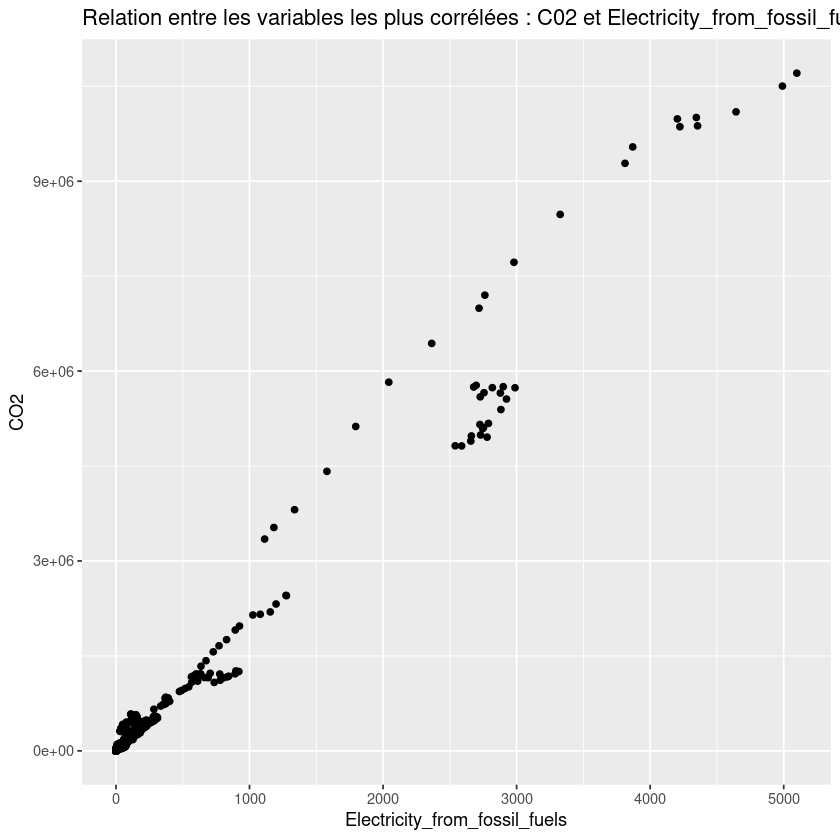

In [33]:

#On affiche un nuage de points pour visualiser les relations entre les paires de variables les plus corrélées
scatterplot <- ggplot(data2, aes(x = Electricity_from_fossil_fuels, y = CO2)) +
  geom_point() +  
  labs(title = "Relation entre les variables les plus corrélées : C02 et Electricity_from_fossil_fuels",
       x = "Electricity_from_fossil_fuels",
       y = "CO2")

scatterplot

### Question 7


Call:
PCA(X = data2, scale.unit = TRUE, quali.sup = c(1, 2), graph = FALSE) 


Eigenvalues
                       Dim.1
Variance               4.783
% of var.             29.892
Cumulative % of var.  29.892
                       Dim.2
Variance               3.359
% of var.             20.996
Cumulative % of var.  50.887
                       Dim.3
Variance               1.401
% of var.              8.758
Cumulative % of var.  59.645
                       Dim.4
Variance               1.180
% of var.              7.375
Cumulative % of var.  67.019
                       Dim.5
Variance               1.020
% of var.              6.376
Cumulative % of var.  73.395
                       Dim.6
Variance               0.879
% of var.              5.494
Cumulative % of var.  78.890
                       Dim.7
Variance               0.793
% of var.              4.955
Cumulative % of var.  83.845
                       Dim.8
Variance               0.729
% of var.              4.559
Cumulativ

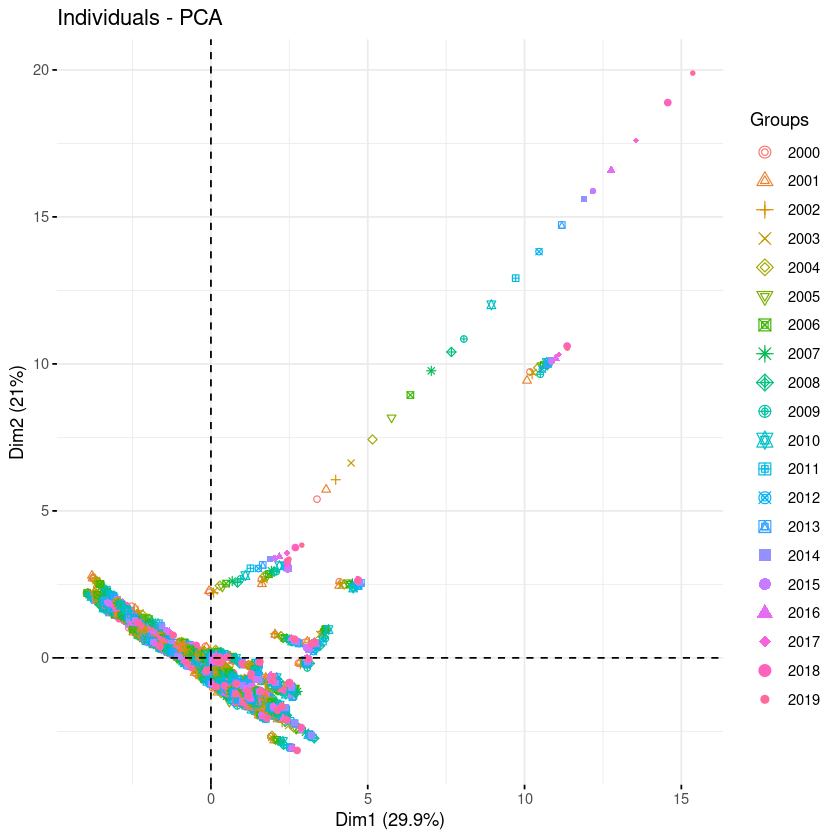

In [34]:
#On fait une ACP
#On met "true" pour standardiser les données

pca <- PCA(data2,quali.sup=c(1,2), scale. = TRUE,graph=FALSE)
summary(pca)

fviz_pca_ind(pca,geom=c("point"), habillage = data2[,2])

En 2 dimensions on explique 50% de la variance, on distingue bcp
d’outliers

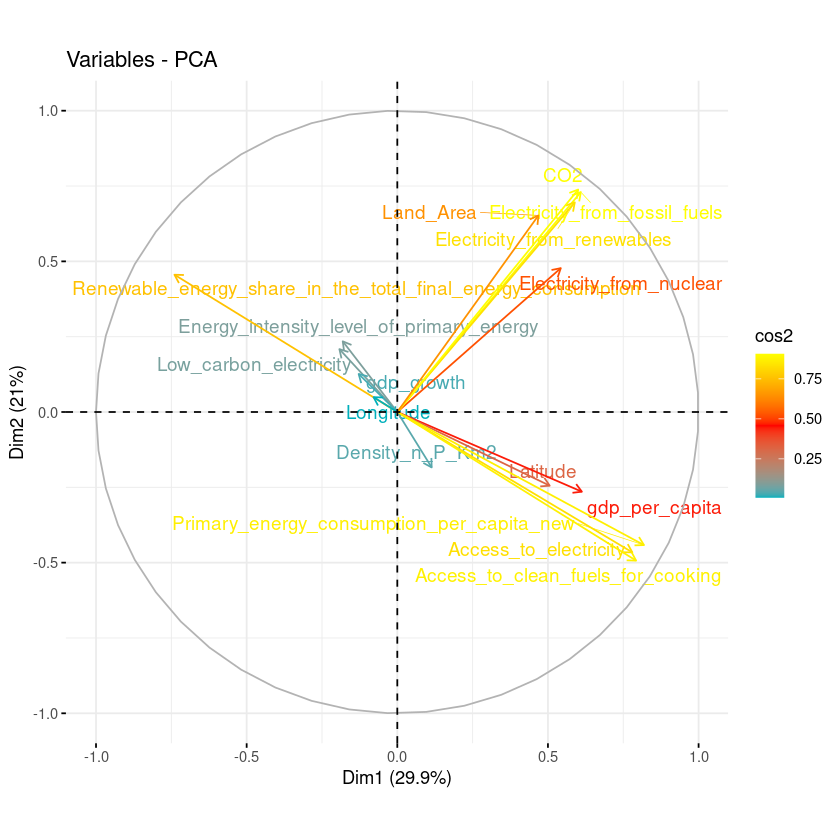

In [35]:
#On affiche la qualité de représentation des variables : comment les axes permettent d'expliquer les variables
q1=fviz_pca_var(pca, col.var="cos2",repel=TRUE,gradient.cols=c("#00afbb","red","yellow"))
q1


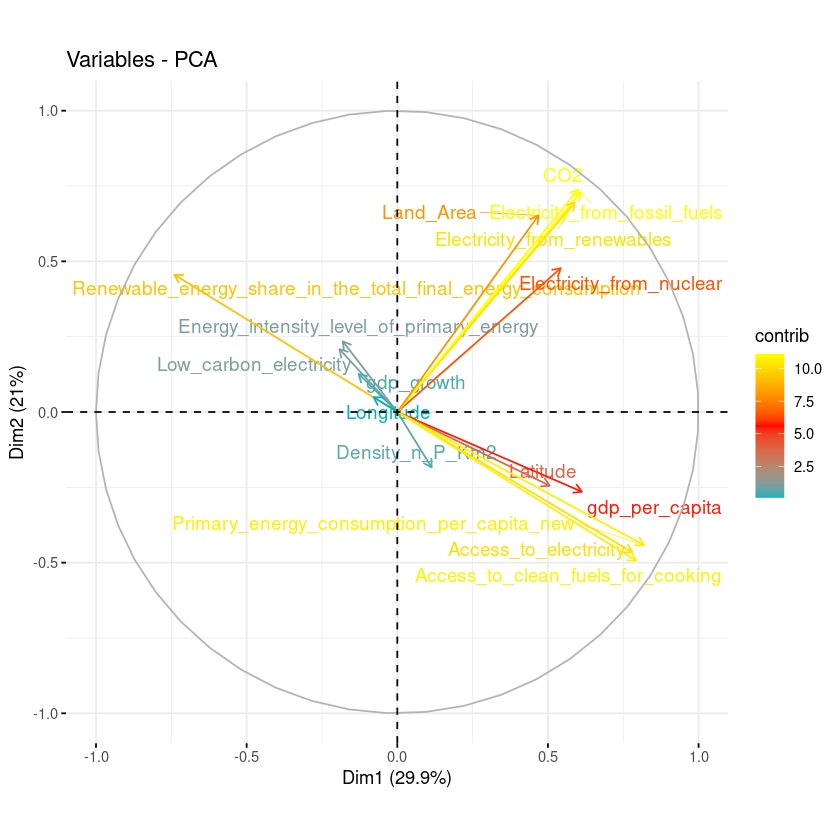

In [36]:
#On affiche la contribution des variables aux axes

c1=fviz_pca_var(pca,col.var="contrib",repel=TRUE,gradient.cols=c("#00afbb","red","yellow"))
c1

Les individus proches de 0 sont mal expliqués


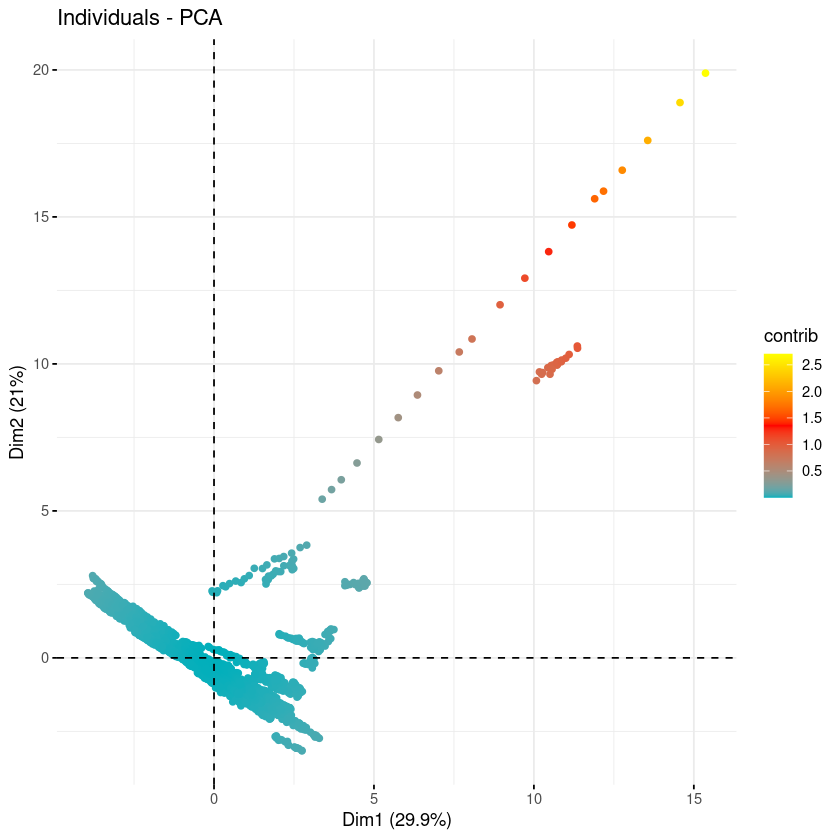

In [37]:
c2=fviz_pca_ind(pca, col.ind="contrib",geom=c("point"),gradient.cols=c("#00afbb","red","yellow"))
c2

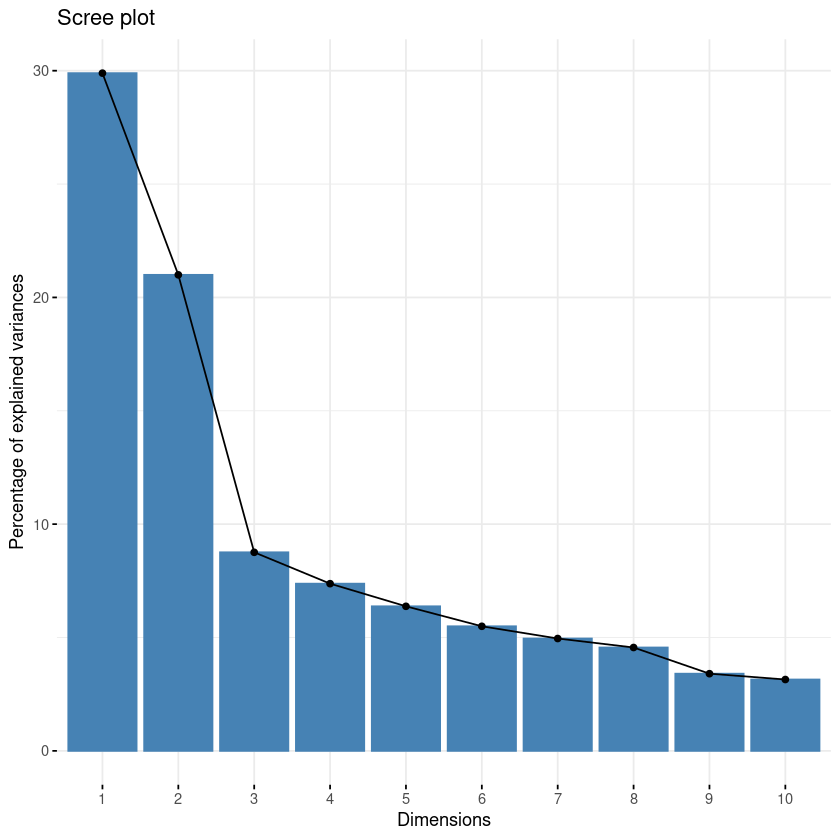

In [38]:
fviz_eig(pca)

Plus la proportion de variance expliquée est élevée pour une composante principale donnée, plus cette composante principale est importante pour représenter la structure des données : la 1ère composante est celle qui est la plus importante ici

### Question 8

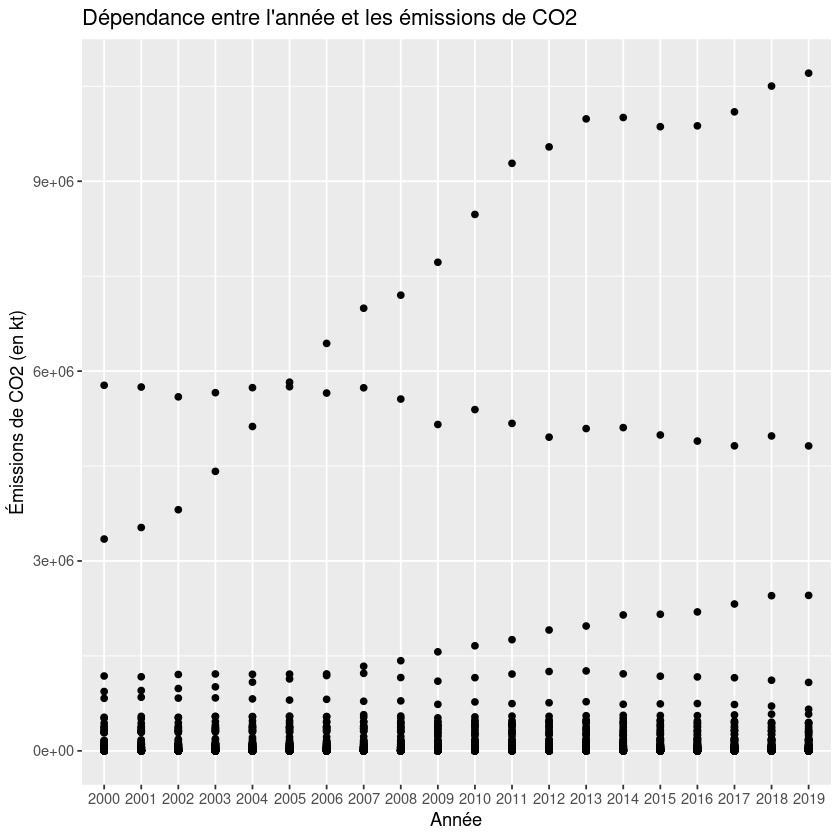

In [39]:
#On affiche une dépendance linéaire entre les variables C02 et Year

ggplot(data2, aes(x = Year, y = CO2)) +
  geom_point() +  
 labs(title = "Dépendance entre l'année et les émissions de CO2",
       x = "Année",
       y = "Émissions de CO2 (en kt)")

In [40]:
#On fait la même chose mais avec un graphique intéractif pour avoir la valeur exacte de CO2 en chaque point
plot_ly(data = data2, x = ~Year, y = ~CO2, type = "scatter", mode = "markers")

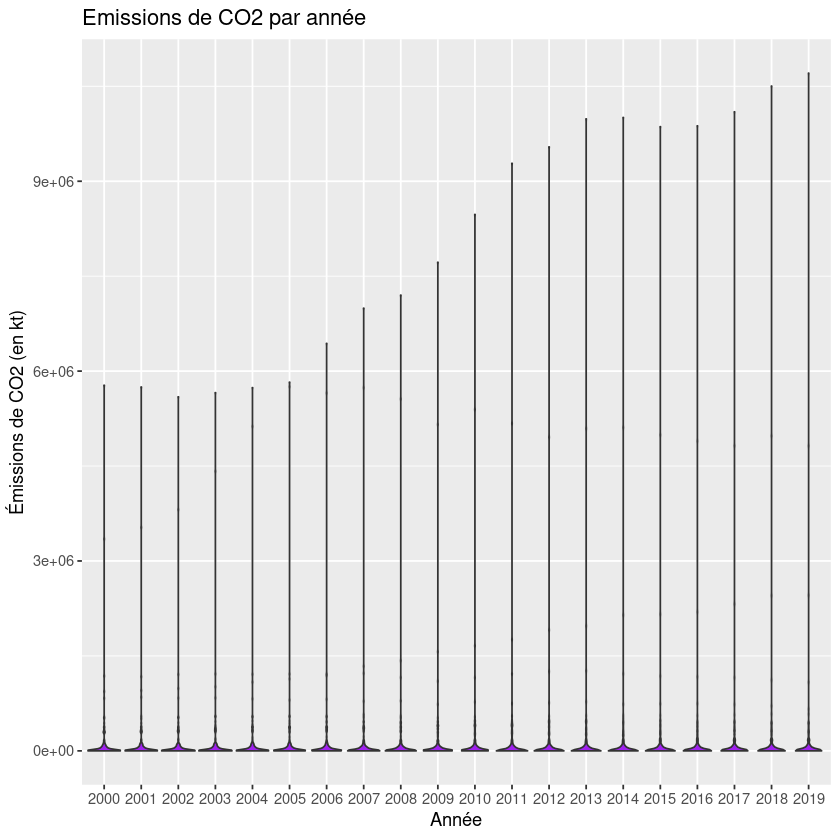

In [41]:
#On trace un graphique en violon des émissions de CO2 par année

ggplot(data2, aes(x = Year, y = CO2)) +
  geom_violin(fill = "purple") +
  labs(title = "Emissions de CO2 par année",
       x = "Année",
       y = "Émissions de CO2 (en kt)")



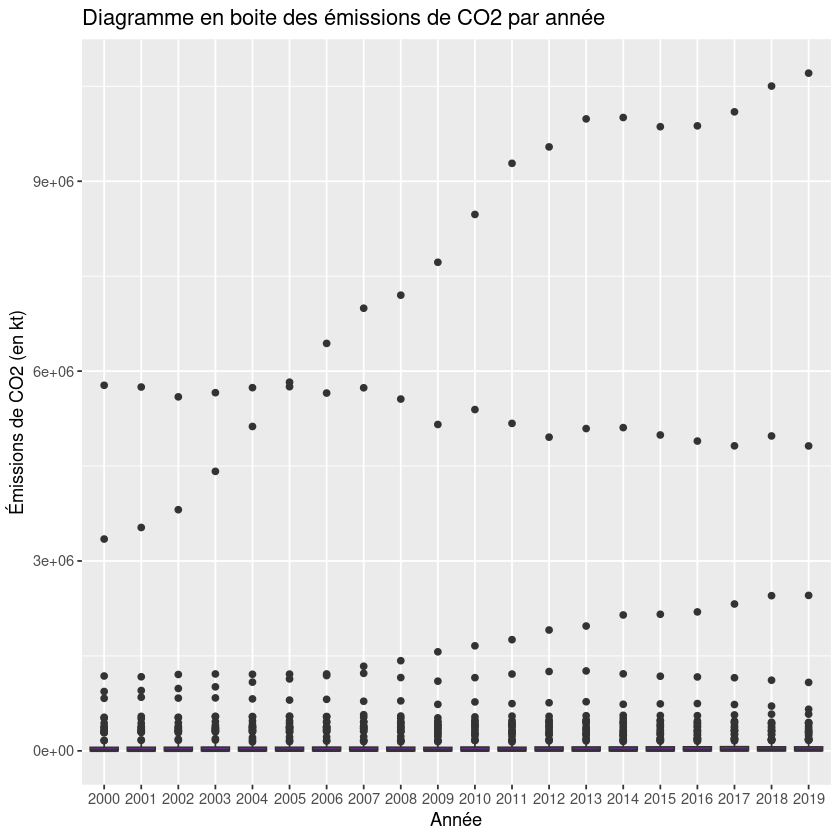

In [42]:
#Diagramme en boîte des émissions de CO2 par année

ggplot(data2, aes(x = Year, y = CO2)) +
  geom_boxplot(fill = "purple") +
  labs(title = "Diagramme en boite des émissions de CO2 par année",
       x = "Année",
       y = "Émissions de CO2 (en kt)")

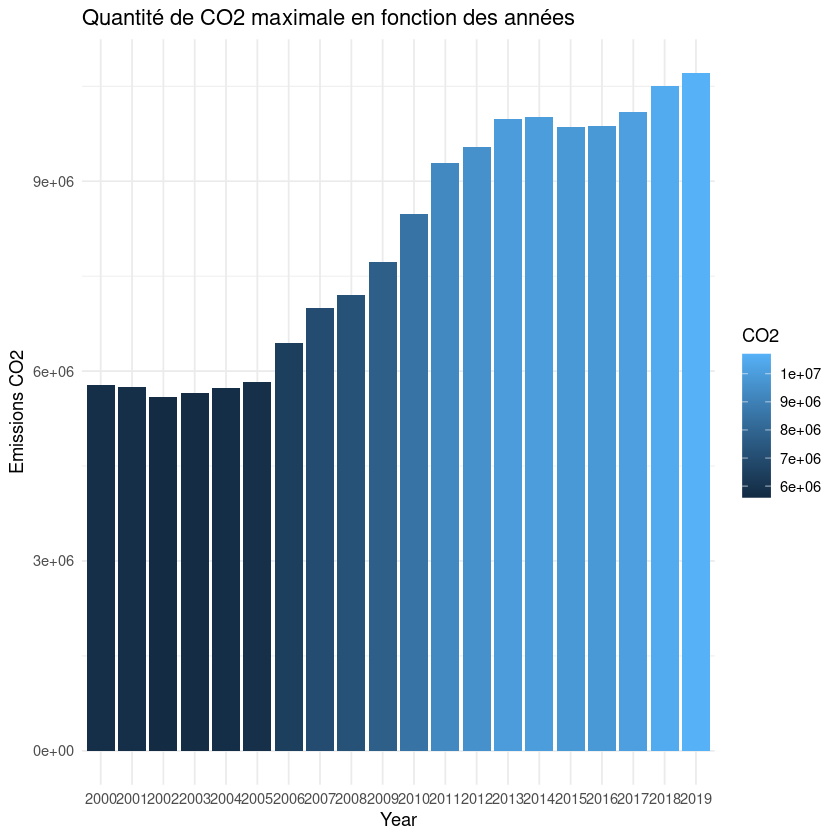

In [43]:
#On créé un df avec les valeurs max de CO2 par année

CO2_max_year <- aggregate(data2$CO2, by=list(Year=data2$Year), FUN=max)
CO2_max_year <- CO2_max_year[order(CO2_max_year$x),]
CO2_max_year20 <- head(CO2_max_year, 20)
names(CO2_max_year20) <- c("Year", "CO2")

# Création du graphique à barres
fig <- ggplot(CO2_max_year20, aes(x = Year, y = CO2, fill = CO2)) +
  geom_bar(stat = "identity") +
  labs(x = "Year", y = "Emissions CO2", title = "Quantité de CO2 maximale en fonction des années") +
  theme_minimal()

print(fig )

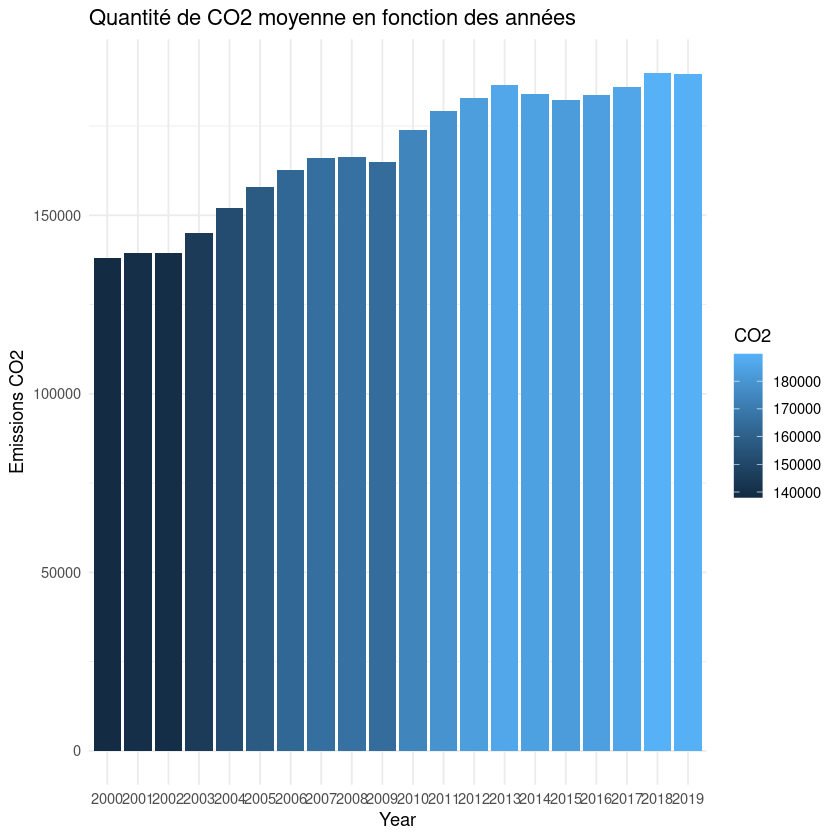

In [44]:
#Le max des CO2 n'est pas judicieux car on a bcp de outliers

#On créé un df avec les valeurs moyennes de CO2 par année

CO2_moy_year <- aggregate(data2$CO2, by=list(Year=data2$Year), FUN=mean)
CO2_moy_year <- CO2_moy_year[order(CO2_moy_year$x),]
CO2_moy_year20 <- head(CO2_moy_year, 20)
names(CO2_moy_year20) <- c("Year", "CO2")

# Création du graphique à barres
fig <- ggplot(CO2_moy_year20, aes(x = Year, y = CO2, fill = CO2)) +
  geom_bar(stat = "identity") +
  labs(x = "Year", y = "Emissions CO2", title = "Quantité de CO2 moyenne en fonction des années") +
  theme_minimal()

print(fig )

#Diagramme en boîte des émissions de CO2 par année
data_log <- data2
data_log <- data_log[, 11, drop = FALSE]  # Conserver la structure de dataframe
data_log[, 1] <- log(data_log[, 1])  # Appliquer log à la colonne extraite
data_log$Year <- data2$Year  # Réattribuer la colonne Year


ggplot(data_log, aes(x = Year, y = CO2)) +
  geom_boxplot(fill = "purple") +
  labs(title = "Diagramme en boite des émissions de CO2 par année",
       x = "Année",
       y = "Émissions de CO2 (en kt)")

In [45]:
#On va faire une ANOVA à 1 facteur pour analyser la dépendance d'une variable quantitative avec une variable qualitative

model1 <- lm(CO2 ~ Year, data = data2)
summary(model1)


Call:
lm(formula = CO2 ~ Year, data = data2)

Residuals:
     Min 
 -189754 
      1Q 
 -171265 
  Median 
 -146434 
      3Q 
 -109319 
     Max 
10517610 

Coefficients:
            Estimate
(Intercept)   138016
Year2001        1562
Year2002        1305
Year2003        6955
Year2004       14023
Year2005       19923
Year2006       24729
Year2007       27917
Year2008       28442
Year2009       26872
Year2010       36003
Year2011       41194
Year2012       44948
Year2013       48421
Year2014       46000
Year2015       44396
Year2016       45586
Year2017       47784
Year2018       51798
Year2019       51593
            Std. Error
(Intercept)      70105
Year2001         98964
Year2002         98611
Year2003         98438
Year2004         98438
Year2005         98438
Year2006         98438
Year2007         97931
Year2008         97931
Year2009         97931
Year2010         97766
Year2011         97766
Year2012         97931
Year2013         97766
Year2014         97443
Year2015         9

In [46]:
#On créé un 2ème modèle pour comparer avec le précédent 
model2 <- lm(CO2 ~ 1, data = data2)

#On compare le sous modèle avec le modèle1, on a une p-val>0.05, c'est sur qu'on accepte ce sous modèle.
anova(model2,model1)

Res.Df
1 2867  
2 2848  
  RSS         
1 1.918473e+15
2 1.917602e+15
  Df
1 NA
2 19
  Sum of Sq  
1          NA
2 8.71788e+11
  F         
1         NA
2 0.06814577
  Pr(>F)
1 NA    
2  1

In [47]:
#On vérifie ces résultats avec un test d'indépendance du chi2
chi2_test <- chisq.test(data2$CO2, data2$Year)
print(chi2_test)

#pval=0.14>0.05 : on rejette pas H0, CO2 et Year sont indépendants

Warning message in chisq.test(data2$CO2, data2$Year):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's
	Chi-squared
	test

data:  data2$CO2 and data2$Year
X-squared =
41101, df =
40793,
p-value =
0.1406



In [48]:
#On se rend compte que sur les tests on peut enlever l'année alors que sur les graphes des quantités moyennes de CO2 on voit quand même une augmentation au fil des années

#On essaye donc de faire un modèle en fonction du pays et de l'année
model3 <- lm(CO2 ~ Year+Entity, data = data2)
summary(model3)


Call:
lm(formula = CO2 ~ Year + Entity, data = data2)

Residuals:
     Min 
-4252025 
      1Q 
  -18045 
  Median 
   -1522 
      3Q 
   15252 
     Max 
 3046123 

Coefficients:
                               Estimate
(Intercept)                      -39747
Year2001                           2406
Year2002                           4708
Year2003                          11596
Year2004                          18663
Year2005                          24563
Year2006                          29369
Year2007                          36062
Year2008                          36587
Year2009                          35016
Year2010                          45431
Year2011                          50622
Year2012                          53317
Year2013                          58070
Year2014                          58194
Year2015                          56590
Year2016                          56535
Year2017                          58732
Year2018                          62746
Year2019          

Le R^2 est de 0.93 donc modèle bcp mieux


In [49]:
#On fait mtn un sous modèle en fonction seulement du pays
model4=lm(CO2 ~ Entity, data = data2)
#On compare ce sous modèle avec le précédent
anova(model4,model3)

Res.Df
1 2720  
2 2701  
  RSS         
1 1.324125e+14
2 1.311919e+14
  Df
1 NA
2 19
  Sum of Sq   
1           NA
2 1.220555e+12
  F       
1       NA
2 1.322578
  Pr(>F)   
1        NA
2 0.1575553

On voit que pval=0.15\>0.05, donc on peut garder le sous modèle et donc
l’effet de l’année est en fait négligeable par rapport à celui du pays

# Partie 2 : Modélisation

### Question 1

In [50]:
data3 <- subset(data2, select =-Electricity_from_fossil_fuels)


In [51]:
data3$Entity <- as.factor(data3$Entity)
class(data3$Entity)

[1] "factor"

In [52]:
#data4 <- subset(data3, select =-c(Entity,Year))

#train_index <- createDataPartition(y, p = 0.8, list = FALSE)
#train_data <- data7[train_index, ]
#test_data <- data7[-train_index, ]


#X <- subset(data3, select = -c(CO2,Entity,Year))
#train_data <- cbind(X_train, y_train)
#test_data <- cbind(X_test, y_test)
#train_index <- sample(nrow(data3), 0.8 * nrow(data3)) 
#X_train <- X[train_index, ]
#y_train <- y[train_index]
#X_test <- X[-train_index, ]
#y_test <- y[-train_index]

In [53]:
names(data3) 

#On sélectionne les variables prédictives : toutes sauf la variable à prédire
#On enlève également les variables quantitatives
data4 <- subset(data3, select =-c(Entity))

X <- subset(data3, select =-c(Entity,CO2))

# On garde la variable à prédire : CO2

y <- data3$CO2

set.seed(123)

#On divise les données en un ensemble d'apprentissage et un ensemble de test

#Ici on garde que 20% des données pour l'échantillon test

train_index <- createDataPartition(y, p = 0.8, list = FALSE)

#Données d'apprentissage :
train_data_Year <- data4[train_index, ]
train_data <- subset(train_data_Year, select =-c(Year))

#Données de test :
test_data_Year <- data4[-train_index, ]
test_data <- subset(test_data_Year, select =-c(Year))

#Vérification
str(train_data)
str(train_data_Year)
str(test_data)
str(test_data_Year)

#Regression, SVM (gd nb de modalités) on enlève Year

[1] "Entity"                                                      
 [2] "Year"                                                        
 [3] "Access_to_electricity"                                       
 [4] "Access_to_clean_fuels_for_cooking"                           
 [5] "Renewable_energy_share_in_the_total_final_energy_consumption"
 [6] "Electricity_from_nuclear"                                    
 [7] "Electricity_from_renewables"                                 
 [8] "Low_carbon_electricity"                                      
 [9] "Energy_intensity_level_of_primary_energy"                    
[10] "CO2"                                                         
[11] "gdp_growth"                                                  
[12] "gdp_per_capita"                                              
[13] "Density_n_P_Km2"                                             
[14] "Land_Area"                                                   
[15] "Latitude"                                                    
[16] "Longitude"                                                   
[17] "Primary_energy_consumption_per_capita_new"

'data.frame':	2296 obs. of  15 variables:
 $ Access_to_electricity                                       : num  20.1 30.7 36.1 42.4 46.7 ...
 $ Access_to_clean_fuels_for_cooking                           : num  10.9 13.8 15.3 16.7 18.4 ...
 $ Renewable_energy_share_in_the_total_final_energy_consumption: num  44.2 31.9 28.8 21.2 16.5 ...
 $ Electricity_from_nuclear                                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity_from_renewables                                 : num  0.56 0.64 0.75 0.54 0.78 0.75 0.6 0.74 0.89 1 ...
 $ Low_carbon_electricity                                      : num  62.9 76.2 78.9 74 83 ...
 $ Energy_intensity_level_of_primary_energy                    : num  1.2 1.5 1.53 1.94 2.25 2.46 3.23 2.61 2.46 2.25 ...
 $ CO2                                                         : num  1030 1760 1770 3560 4880 ...
 $ gdp_growth                                                  : num  1.41 5.36 13.83 3.92 21.39 ...
 $ gdp_per_capita             

On a bien divisé notre jeu de données en 80-20. Cette étape est primordiale car elle permet de diviser notre jeu de données en 80-20, et pour éviter le sur-ajustement (overfitting) cela permet à ce que le jeu de données test représente la majorité de la variance de notre jeu de données. Et cela nous permettra d'obtenir un bon modèle par validation croisée.

In [54]:
#Pour pouvoir comparer les modèles, on créé une fonction qui permet de tracer les résidus avec une échelle fixe
plot_res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

### Question 2

#### a) Regression linéaire (sans Year)


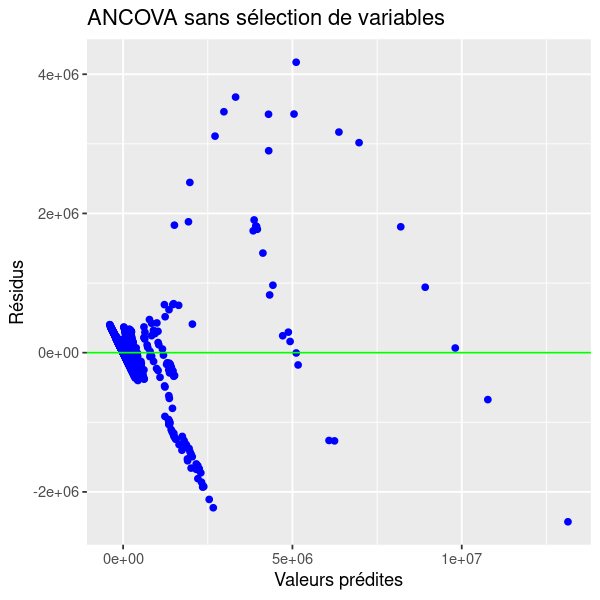

In [55]:
#Sans sélection de variables

lm_model_complet <- aov(CO2 ~ ., data = train_data)
res.lm <- lm_model_complet$residuals
fit.lm <- lm_model_complet$fitted.values
options(repr.plot.width = 5, repr.plot.height = 5)
plot_res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

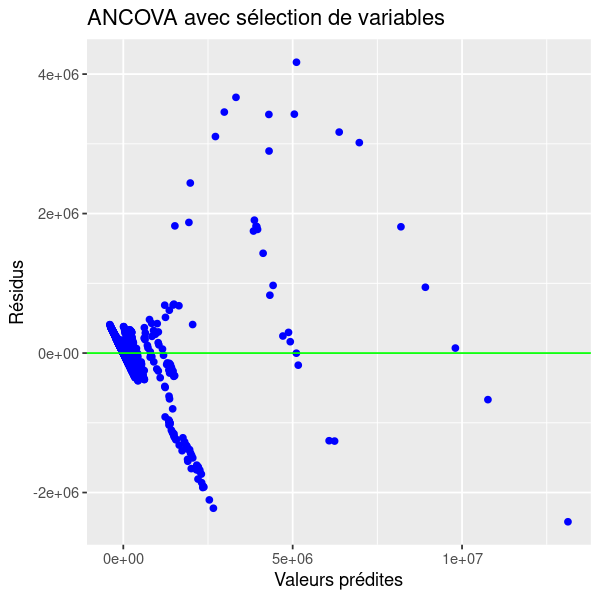

In [56]:
#Avec sélection de variables : on cherche les variables à garder

lm_model_AIC<- stepAIC(lm_model_complet, trace=FALSE)
#summary(lm_model_AIC)
res.lm.selec <- lm_model_AIC$residuals
fit.lm.selec <- lm_model_AIC$fitted.values
plot_res(fit.lm.selec,res.lm.selec,"ANCOVA avec sélection de variables")

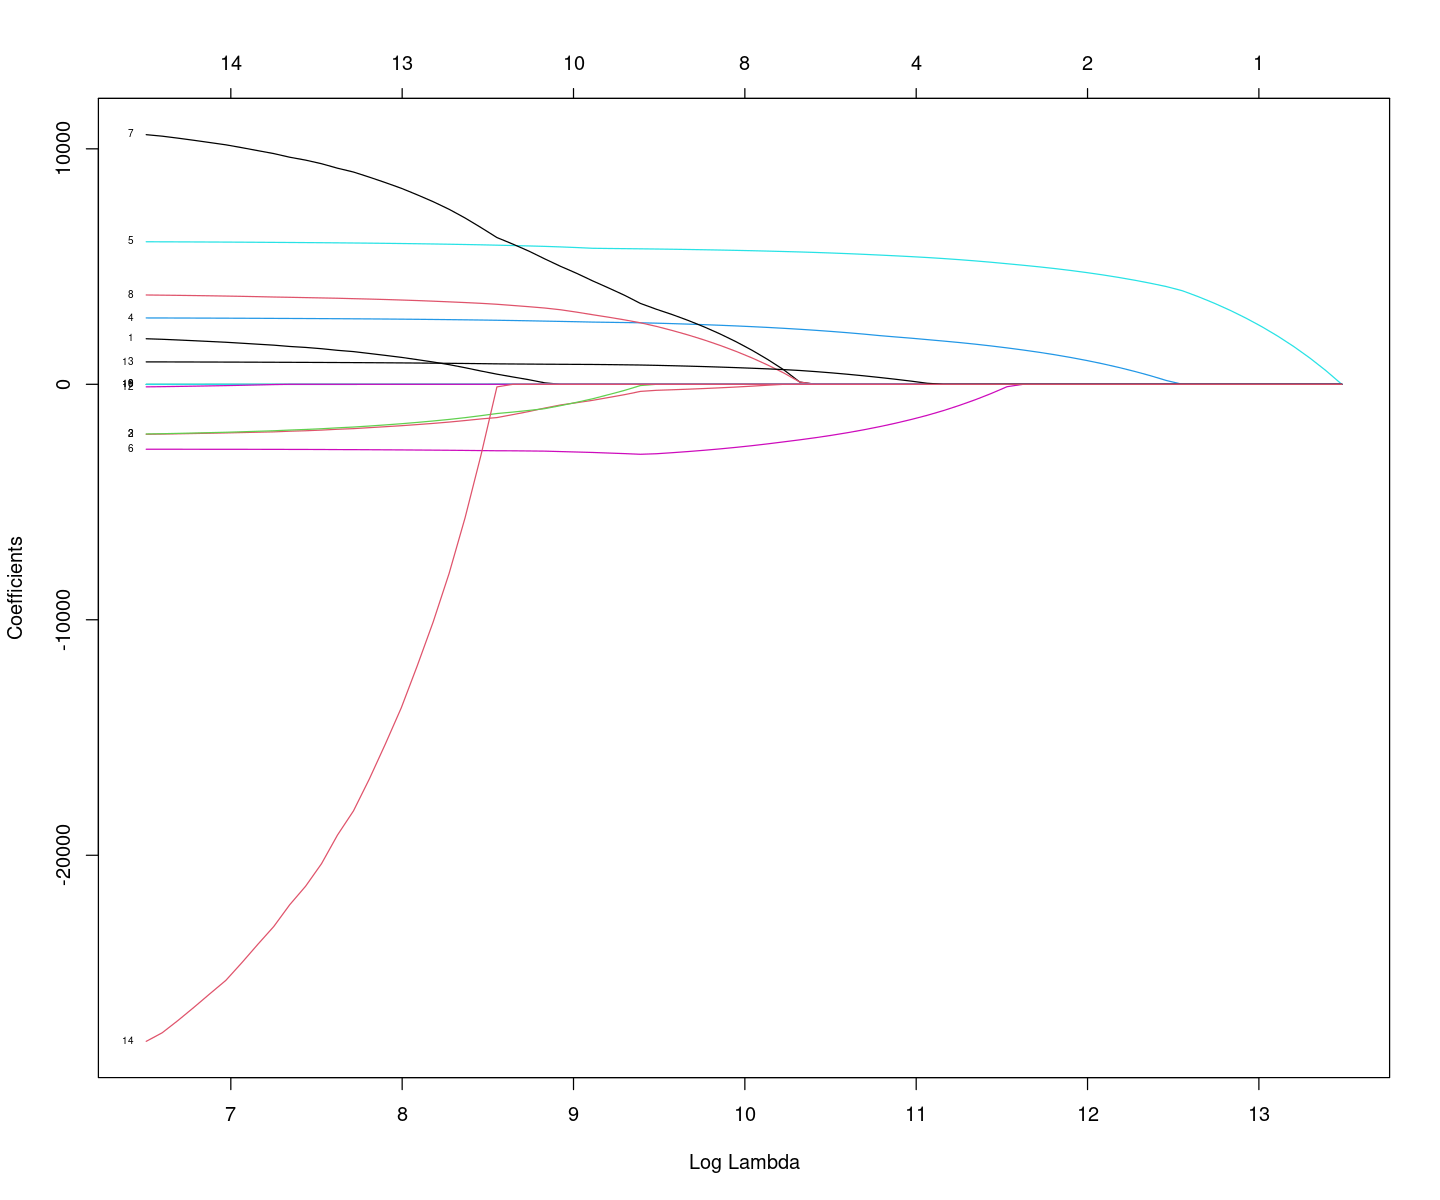

In [57]:
#Avec pénalisation (par exemple Lasso)

#On enlève la variable C02 et on transforme en matrice

x=as.matrix(train_data[-1])
y=train_data$CO2

#On fait avec validation croisée

lasso_model <- cv.glmnet(x, y, alpha = 1)


#res.lasso <- lasso_model$residuals
#res.lasso=predict(lasso_model)
#fit.lasso <- lasso_model$fitted.values
#plot_res(fit.lasso,res.lasso,"ANCOVA avec Lasso")


#ou----------------------------------------------------------------------------------------------

x.mat <- model.matrix(CO2 ~ . - 1, data = train_data) #notre x.mat c'est récupéré juste la matrice de design dans notre modèle où on enlève un intercept, 
                                                     #cad qu'on va prendre 2 modalités pour jour, soit on a un intercept soit on prend toutes les modalités pour une var; 
                                                     #mais on garde toujours 4modalités/5 pour la station
reg.lasso <- glmnet(y = train_data$CO2, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
#legend("topright", 
       #legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

#### b) SVM (sans Year)

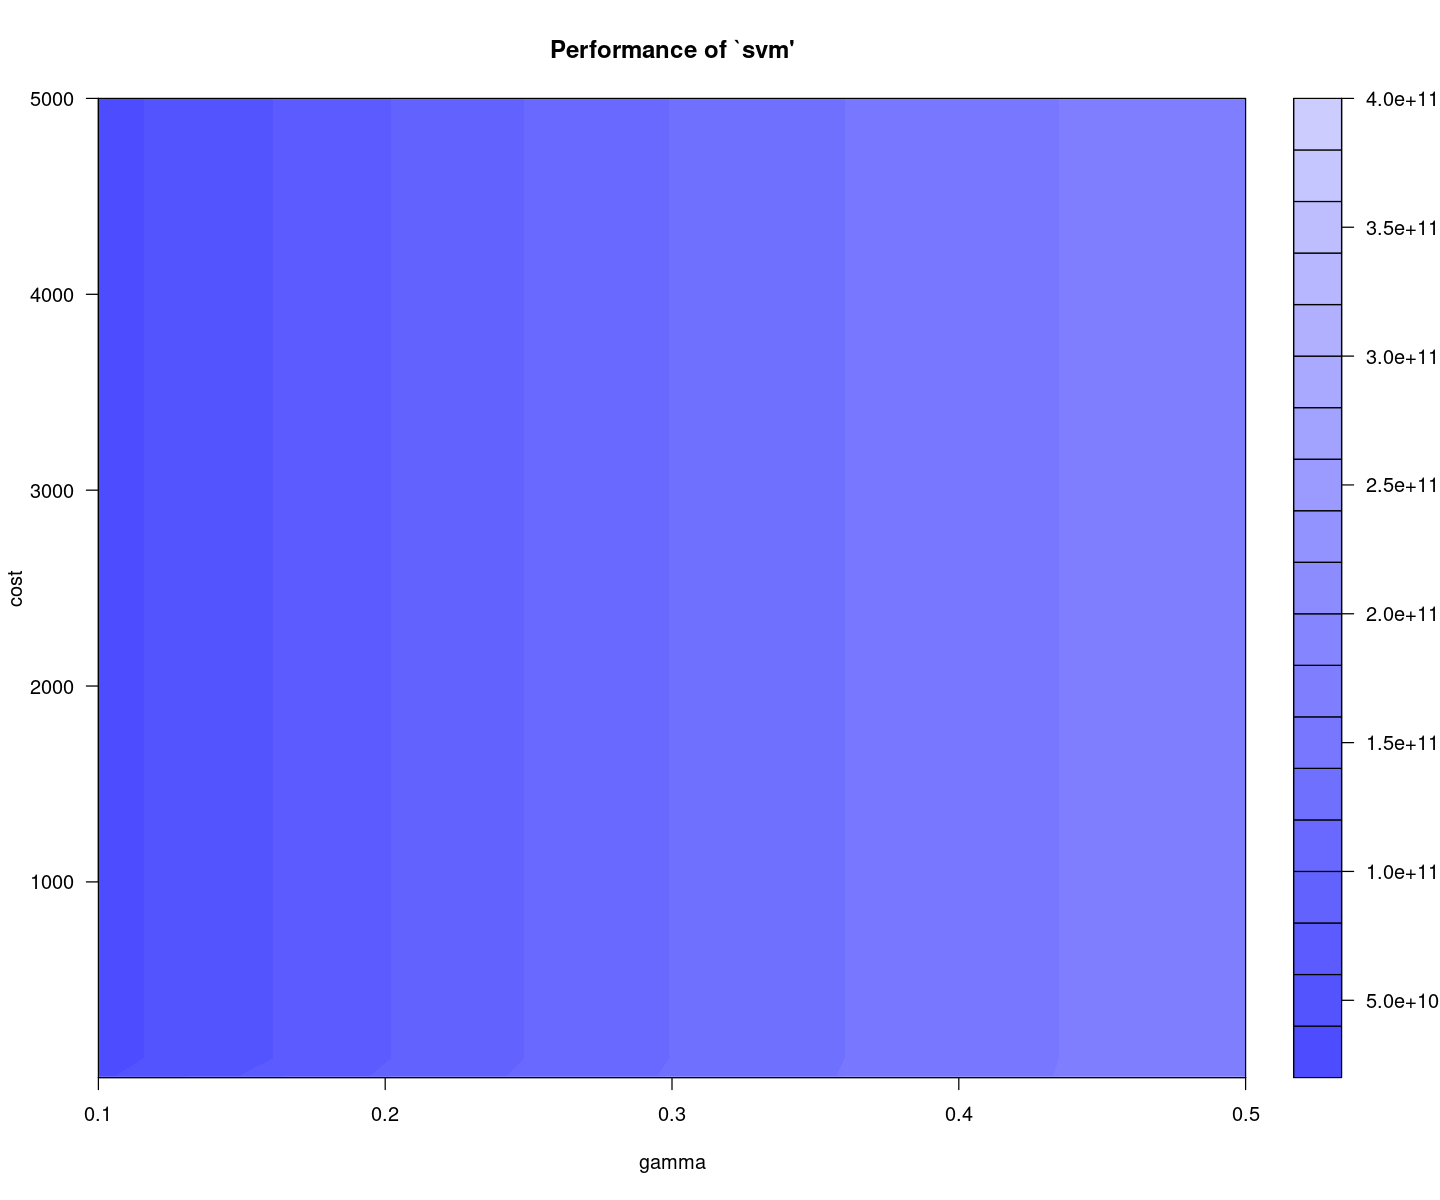

In [58]:
#Avec noyau linéaire

svm_model_linear <- svm(CO2 ~ ., data = train_data, kernel = "linear")

#Avec noyau gaussien 

svm_model_gaussien <- svm(CO2 ~ ., data = train_data, kernel = "radial")

#On fait SVM en régression sur le noyau par défaut, le "radial"-> Gaussien

svm_model0 = svm(CO2 ~ ., data = train_data)
set.seed(2021)
svm.reg.tune = tune.svm(CO2 ~ ., data = train_data, cost = c(1,10,100,1000,5000), 
    gamma = seq(0.1, 0.5, by = 0.05))

plot(svm.reg.tune)



In [59]:
svm_reg = svm(CO2 ~ ., data = train_data, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)
summary(svm_reg)

Warning message in deparse(x$call, 0.8 * getOption("width")):
“'cutoff' incorrect pour 'deparse', utilisation de la valeur par défaut”



Call:
svm(formula = CO2 ~ ., data = train_data, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1000 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  240






On voit que le modèle optimal est celui avec le noyau gaussien et un
cout de 1000.

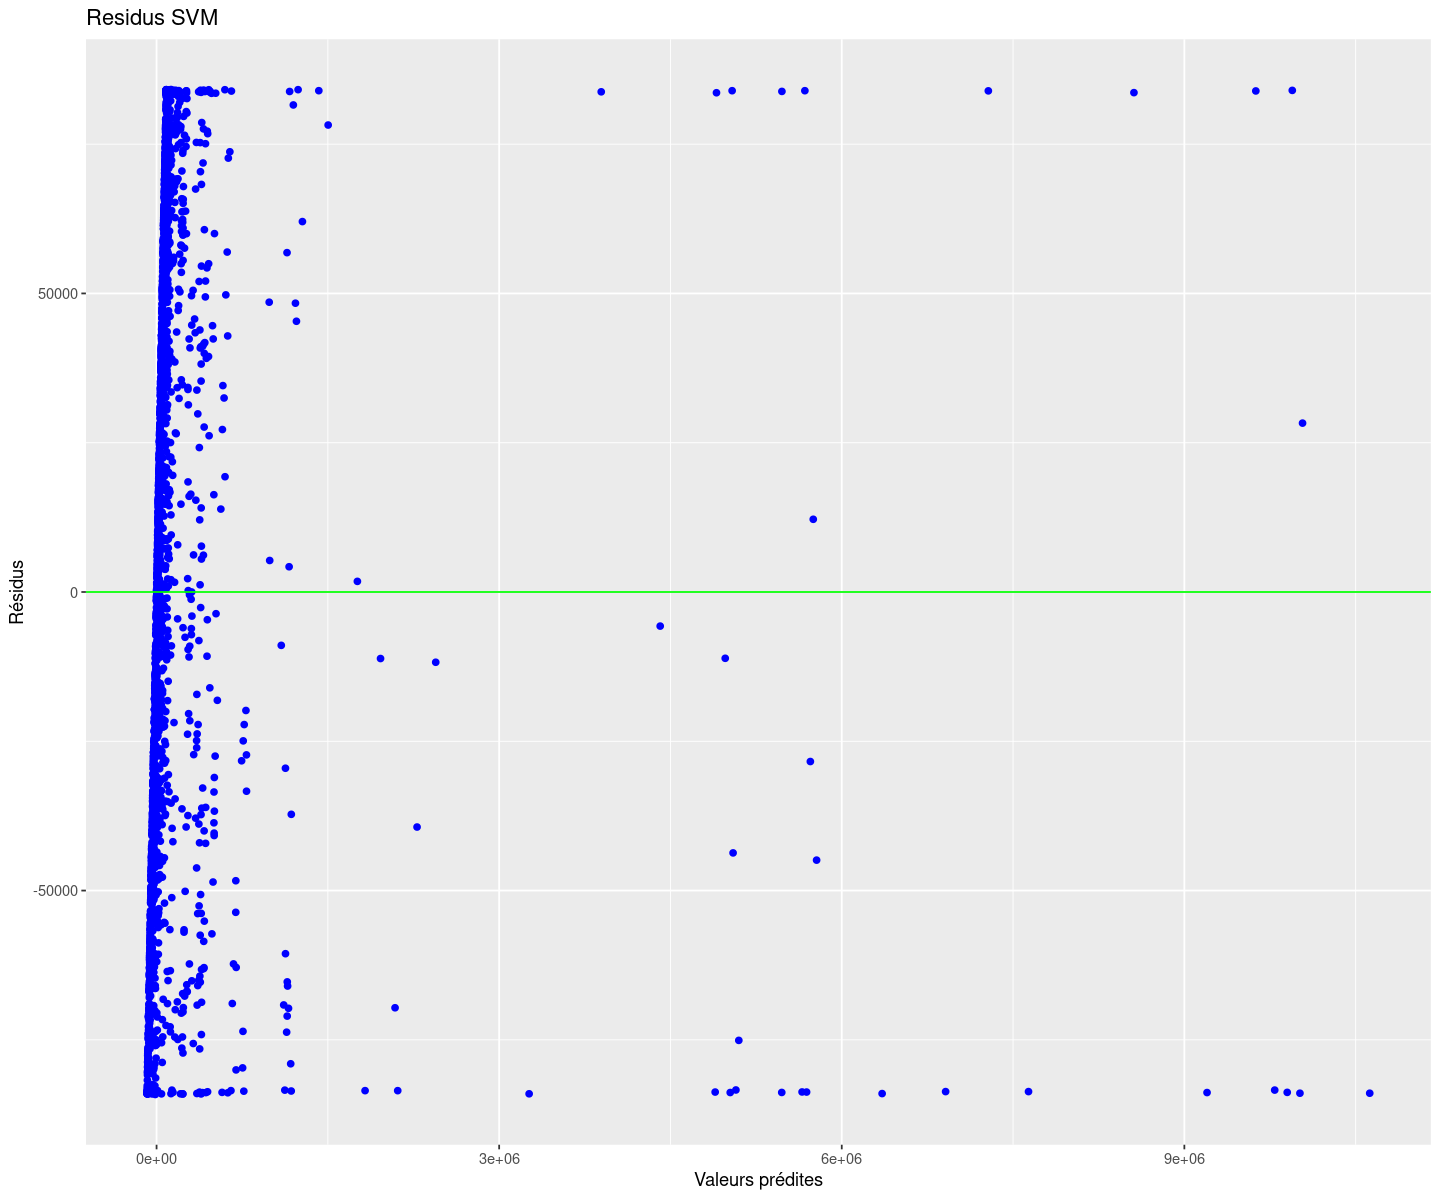

In [60]:
#Tracé des résidus
fit.svmr = svm_reg$fitted
res.svmr = fit.svmr - train_data[,"CO2"]


plot_res(fit.svmr,res.svmr,titre="Residus SVM")


#### c) Arbre de décision (Avec Year)


In [61]:
#Sélection des paramètres optimaux par validation croisée
tree_model <- rpart(CO2 ~ ., data = train_data_Year, control=rpart.control(cp=c(0.00001,0.0001,0.001, 0.01, 0.1)))
options(repr.plot.width = 10, repr.plot.height = 15)

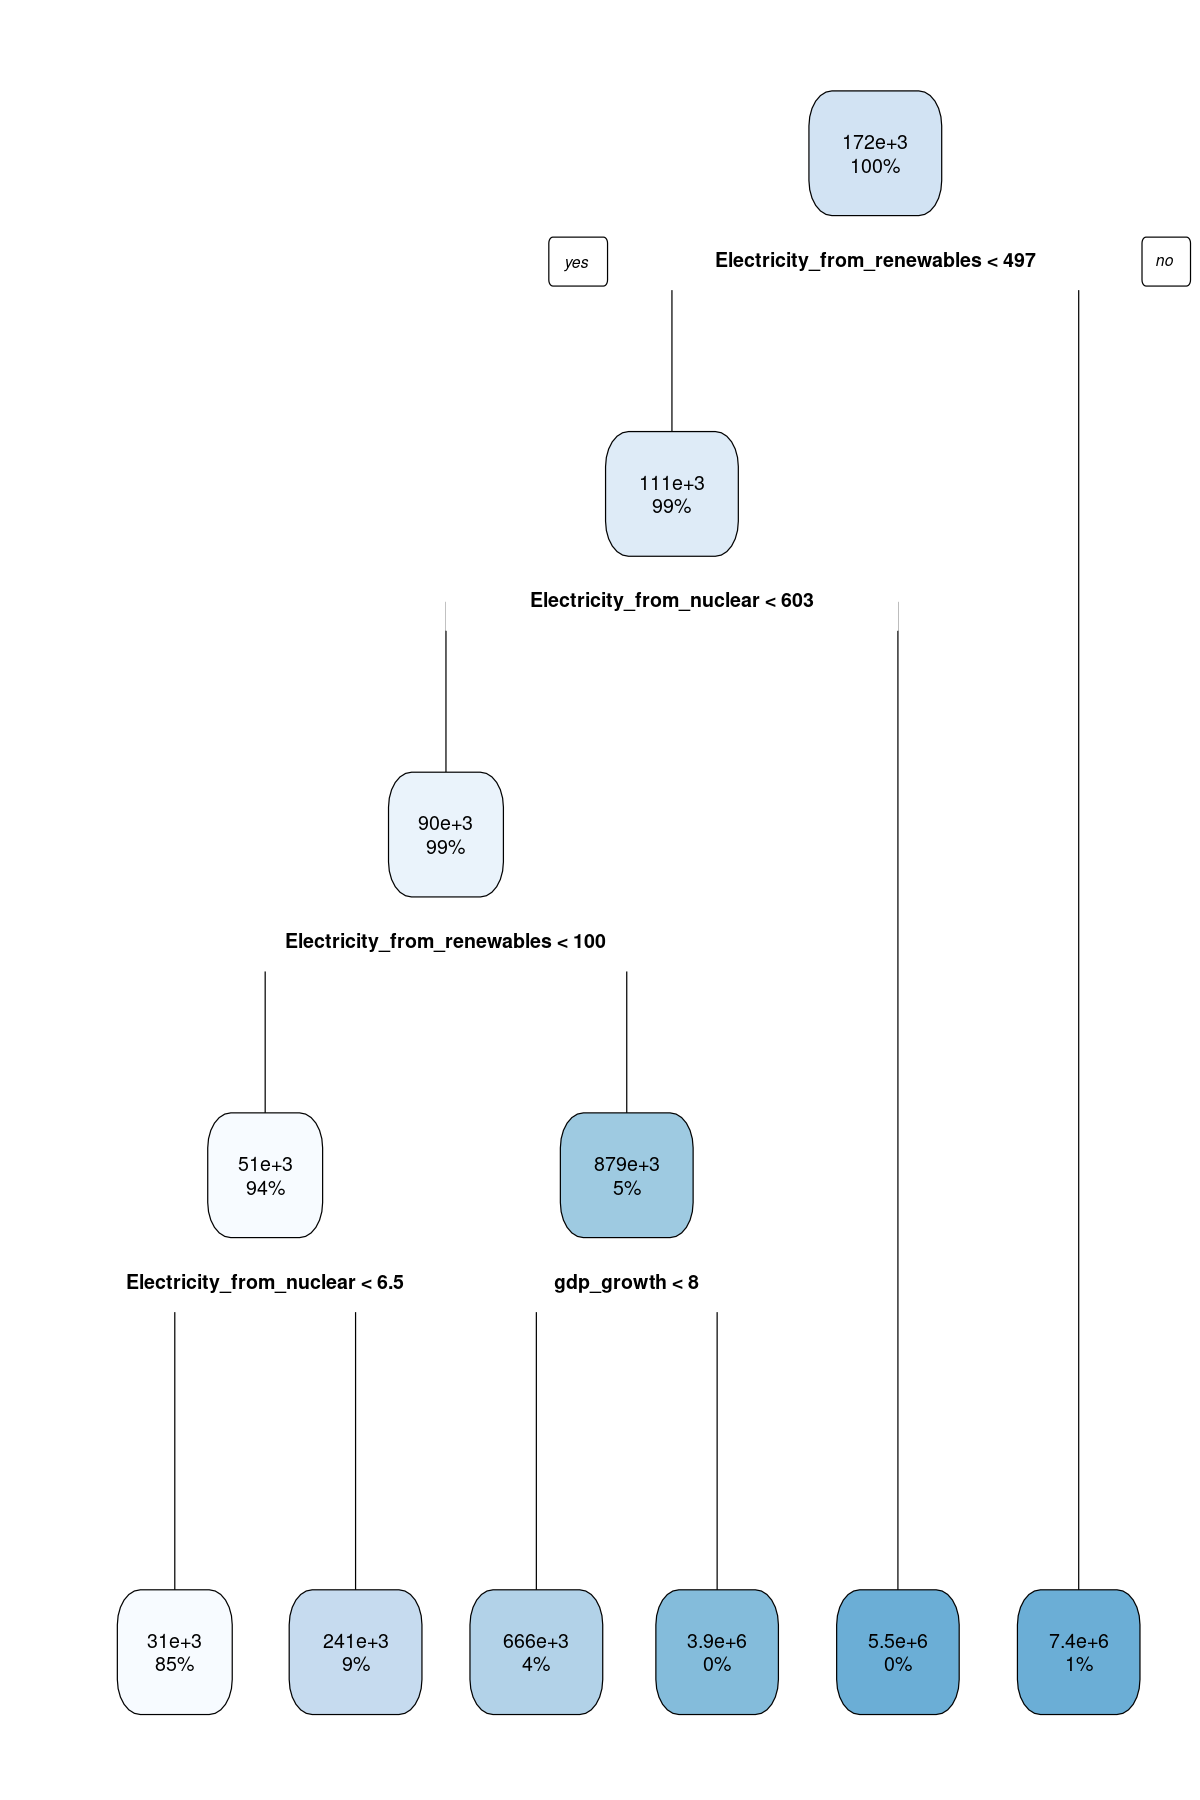

In [62]:

rpart.plot(tree_model)

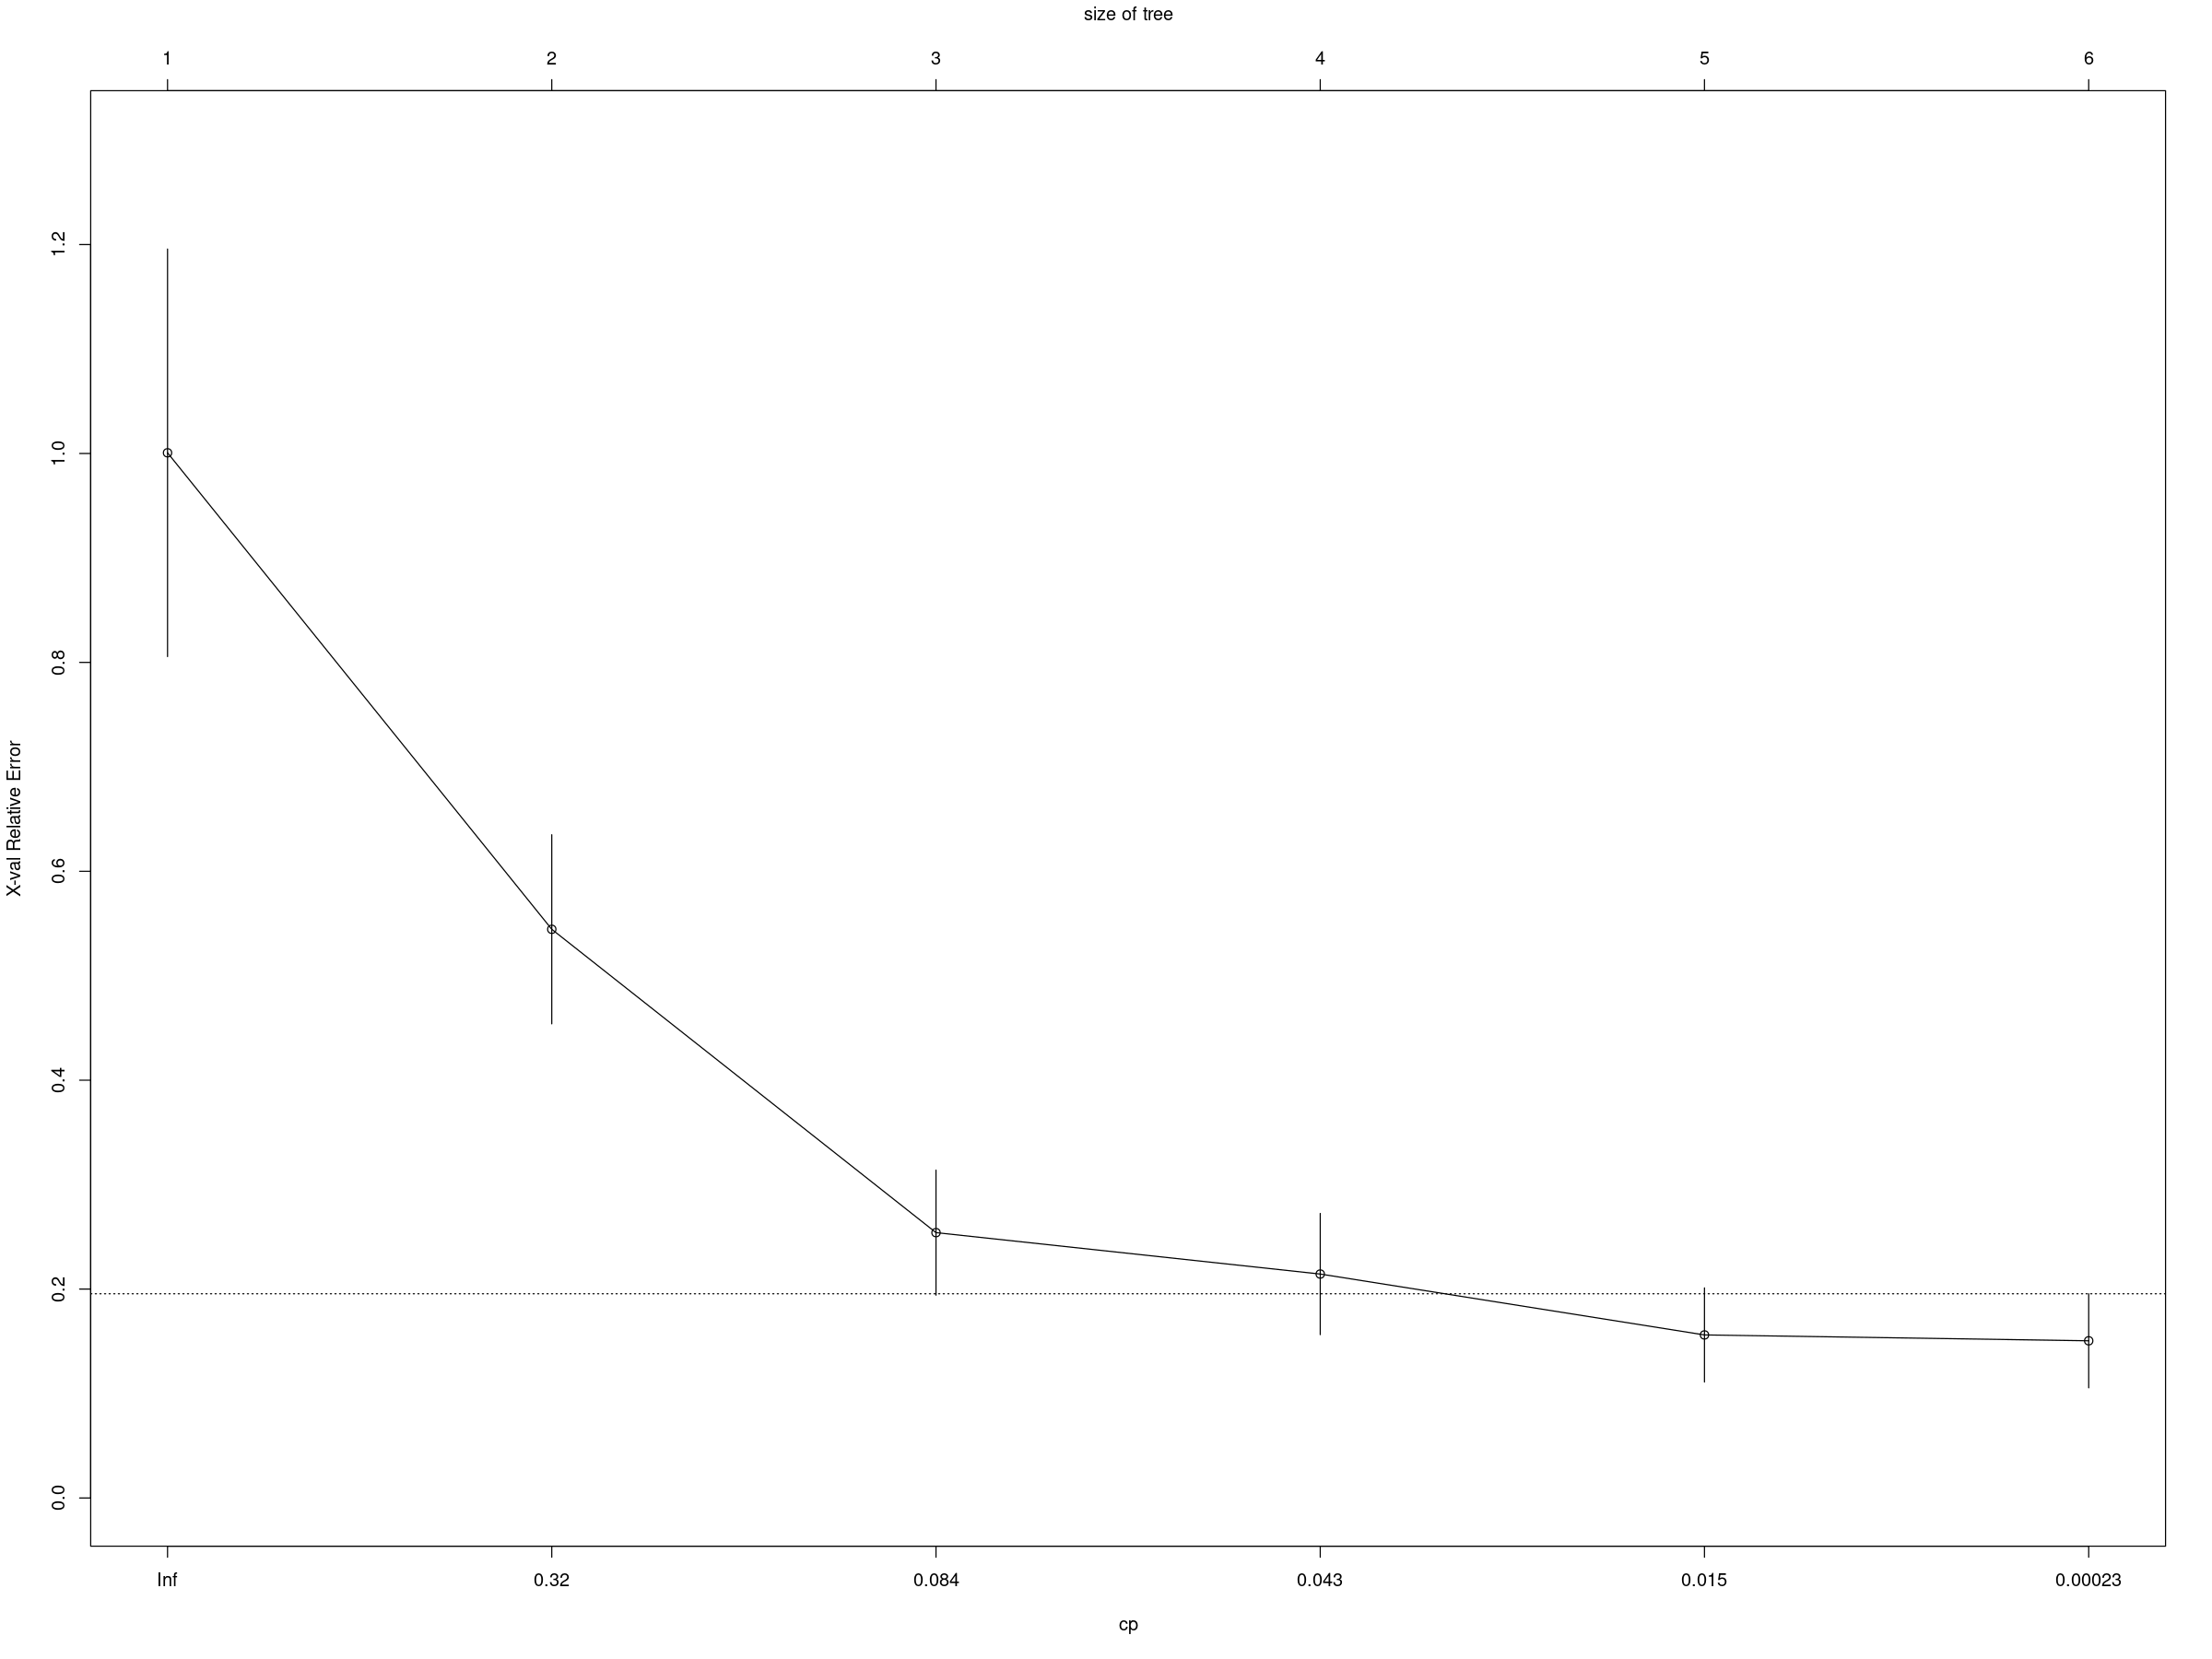

In [63]:
#On créé une matrice contenant les prédictions de l'arbre de décision tree_model pour chaque observation du jeu de données
#Chaque ligne correspond à une observation et chaque colonne à une valeur de CP

xmat<-xpred.rpart(tree_model,xval=10) 

#Erreur de validation croisée pour chaque valeur de CP

CVerr<-apply((xmat-train_data_Year[,"CO2"])^2,2,sum)
options(repr.plot.width = 20, repr.plot.height = 15)
plotcp(tree_model)

In [64]:

#On trouve le cp qui minimise l'erreur pour construire l'arbre optimal
which.min(CVerr)

0.0002261919 
           6

La taille de l’arbre qui minimise vaut 6


[1] 0.0002261919

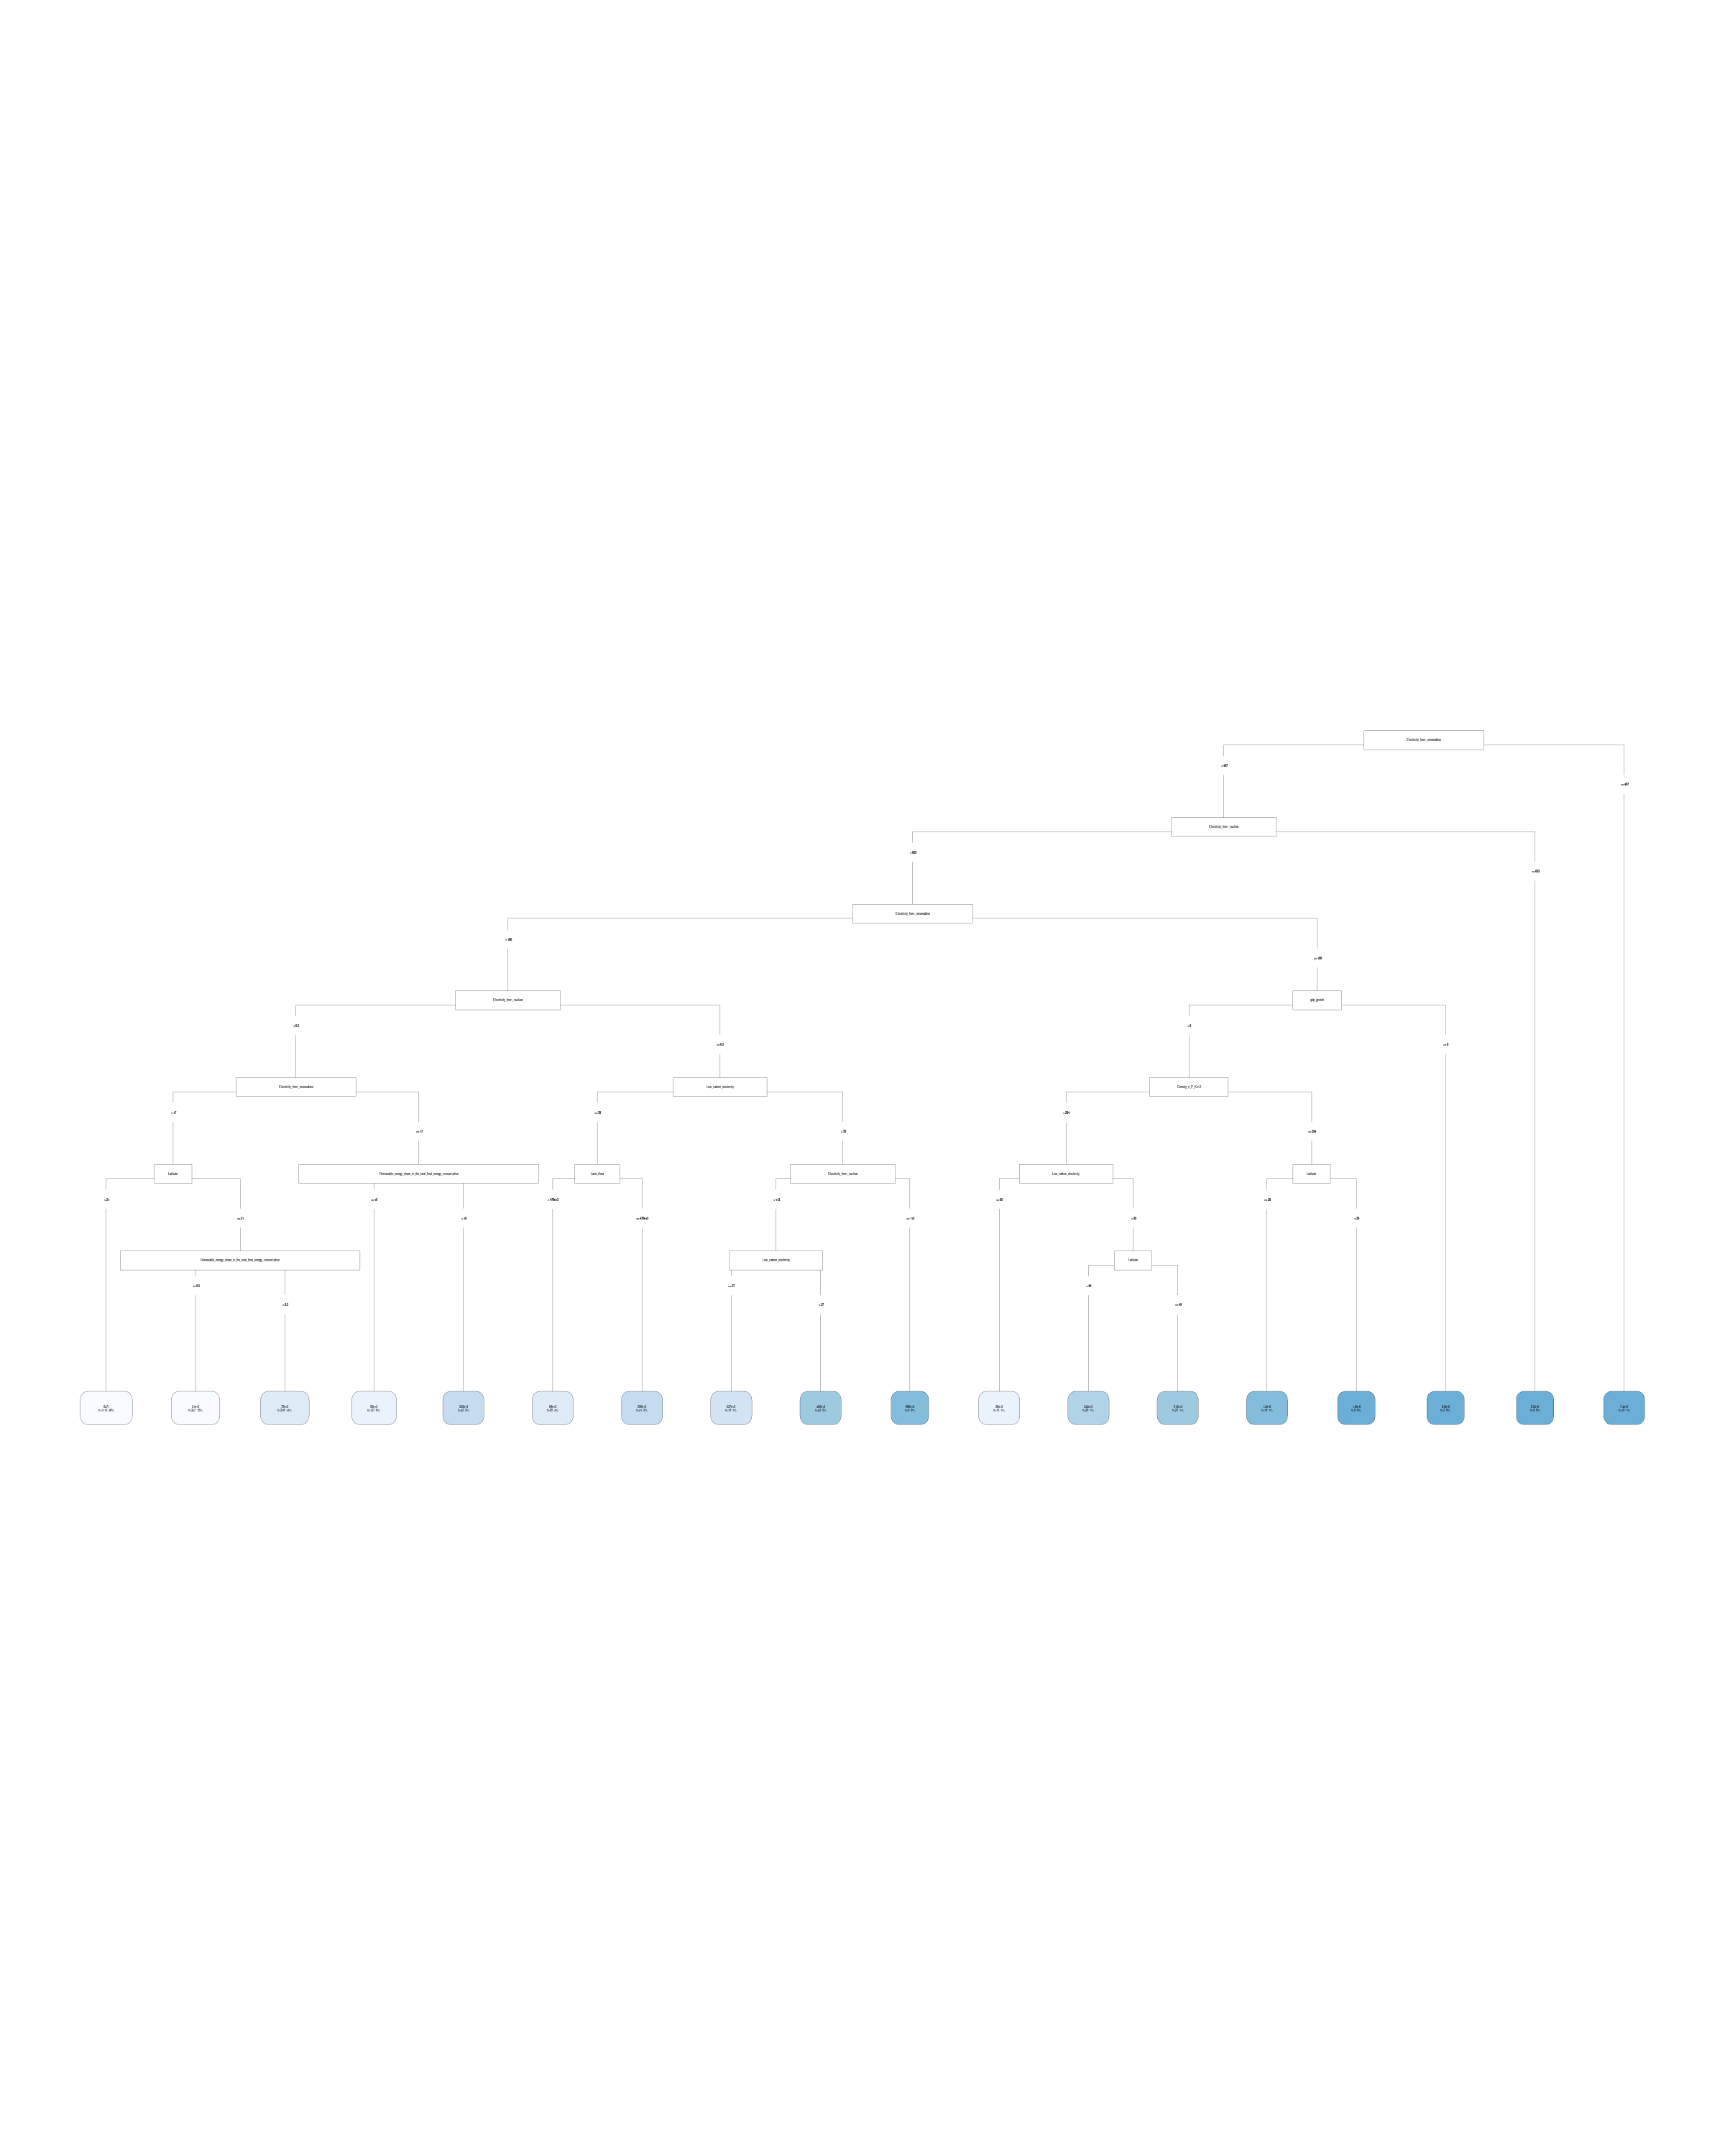

In [65]:
as.numeric(attributes(which.min(CVerr))$names)
tree_opt_model=rpart(CO2~.,data=train_data_Year,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

options(repr.plot.width = 20, repr.plot.height = 25)
rpart.plot(tree_opt_model,type=5,extra=101)

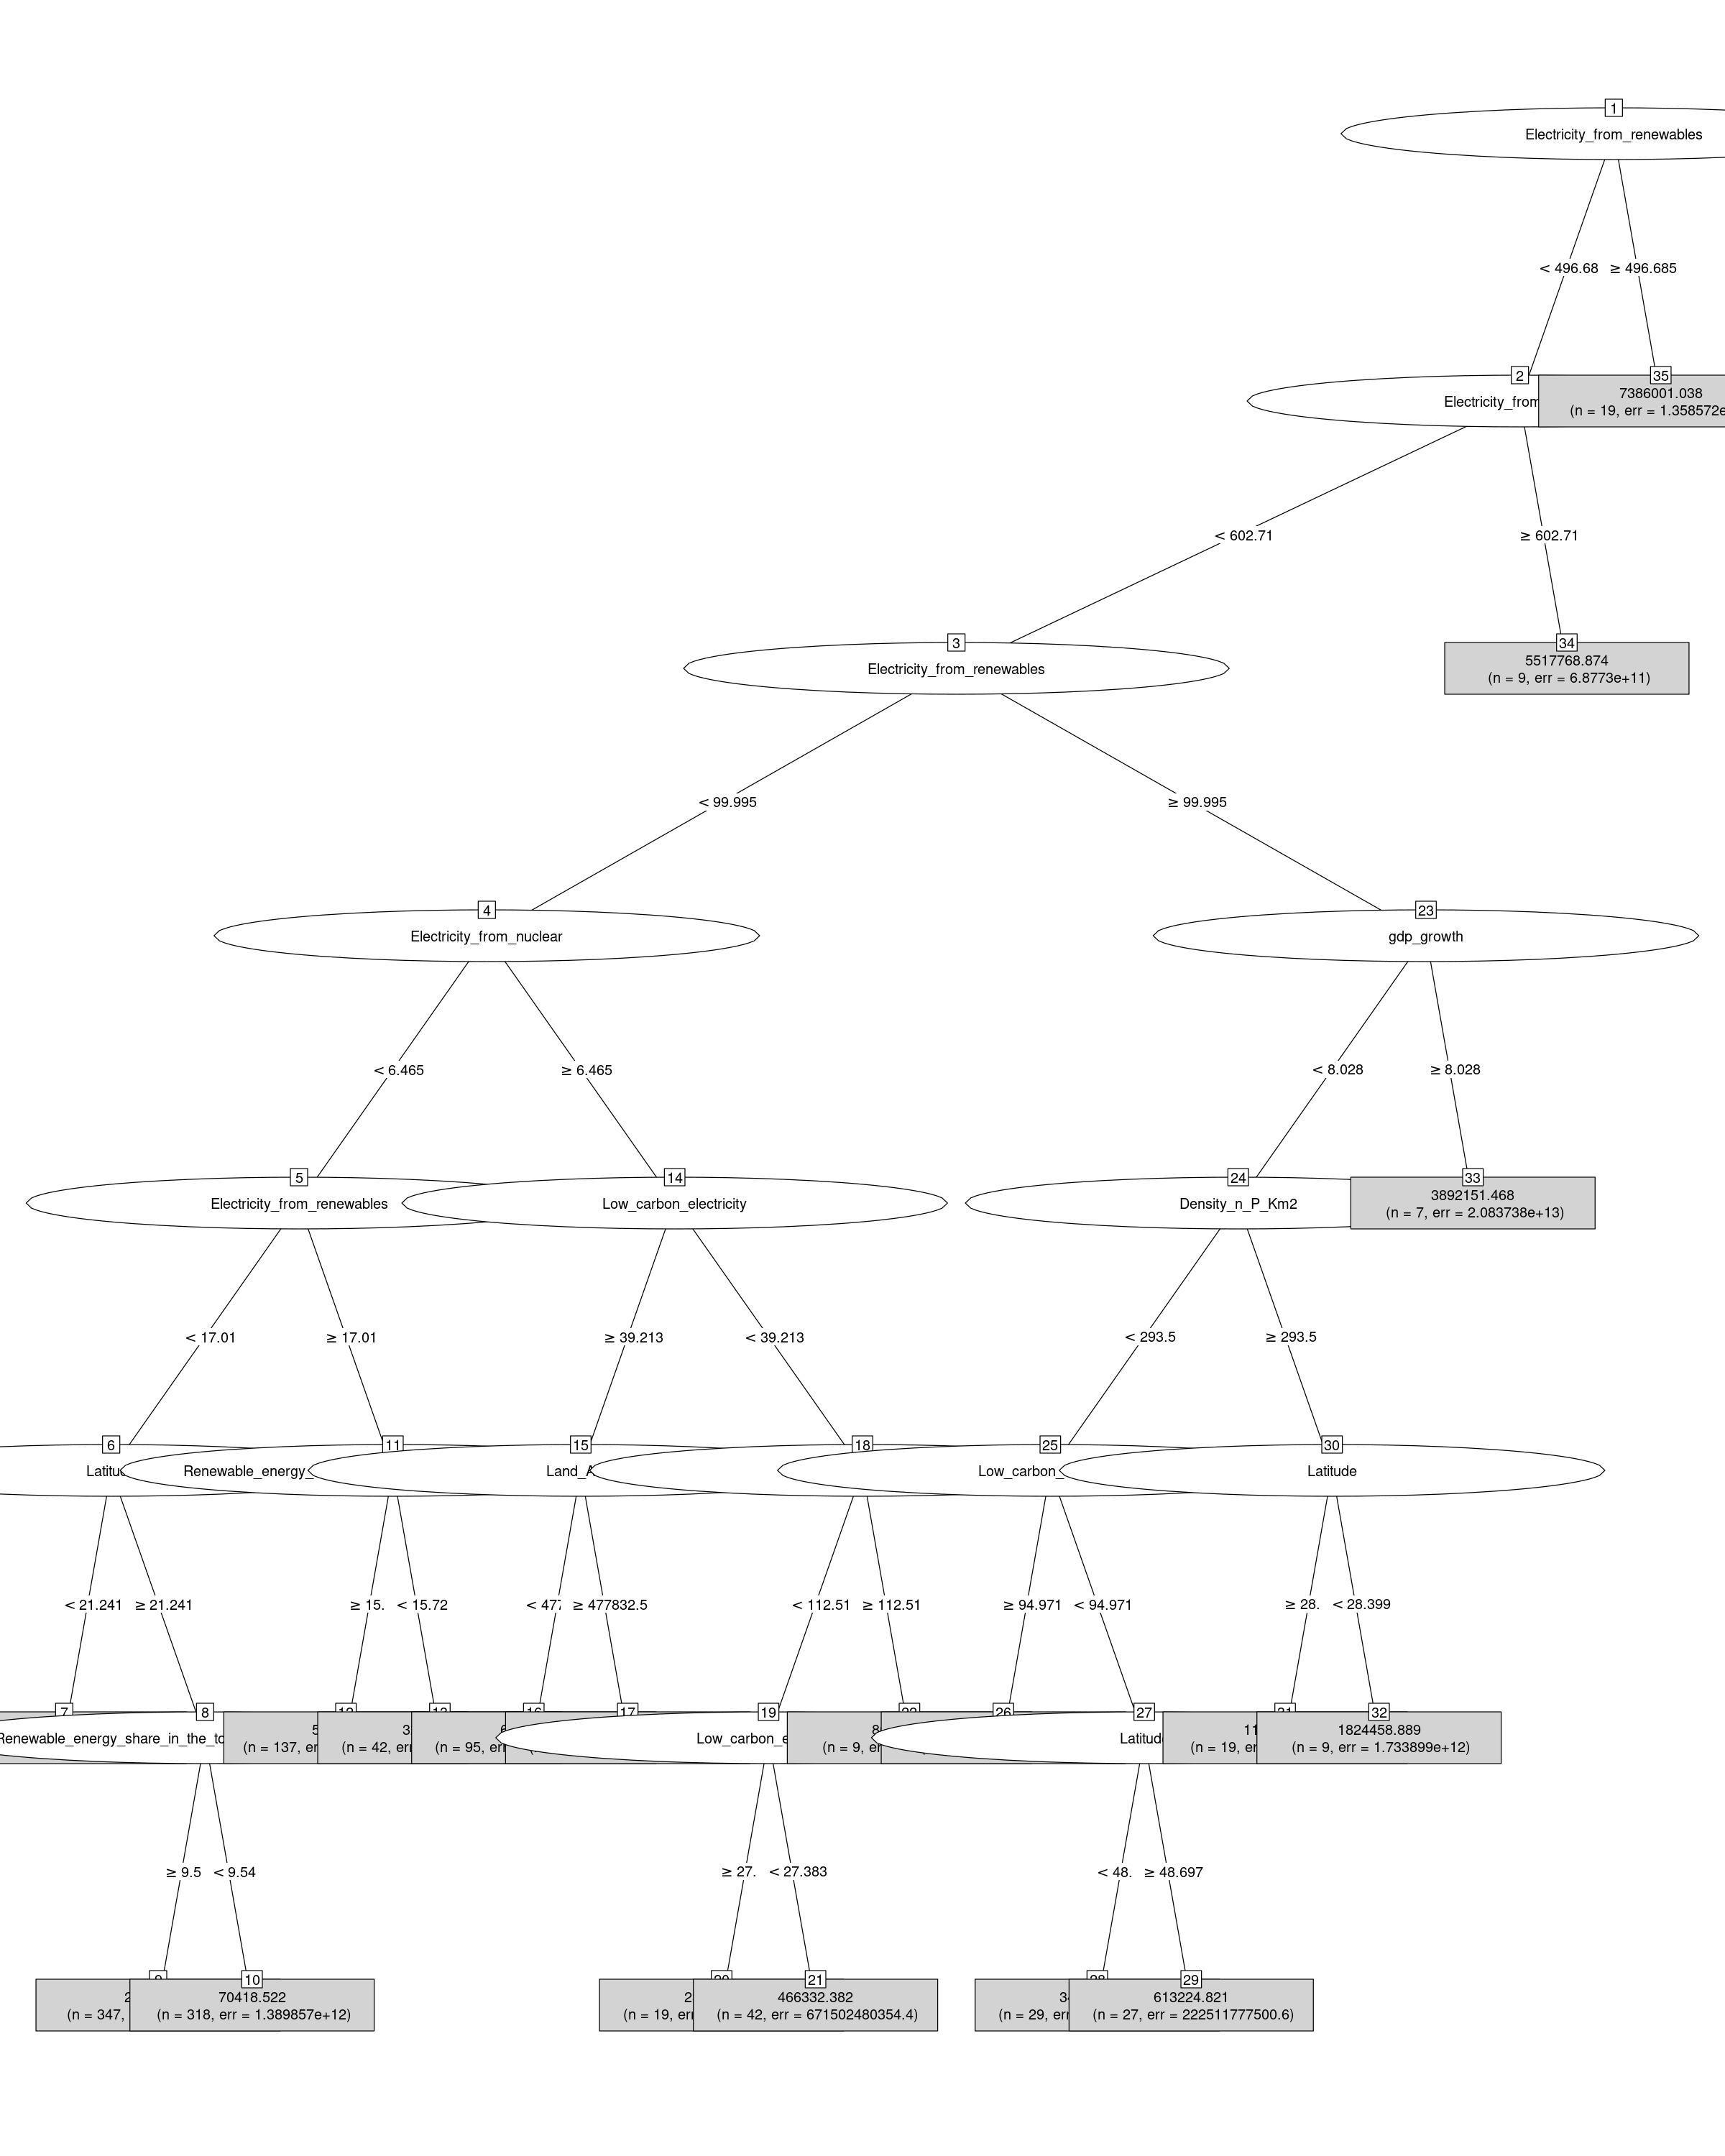

In [66]:
plot(as.party(tree_opt_model), type="simple")

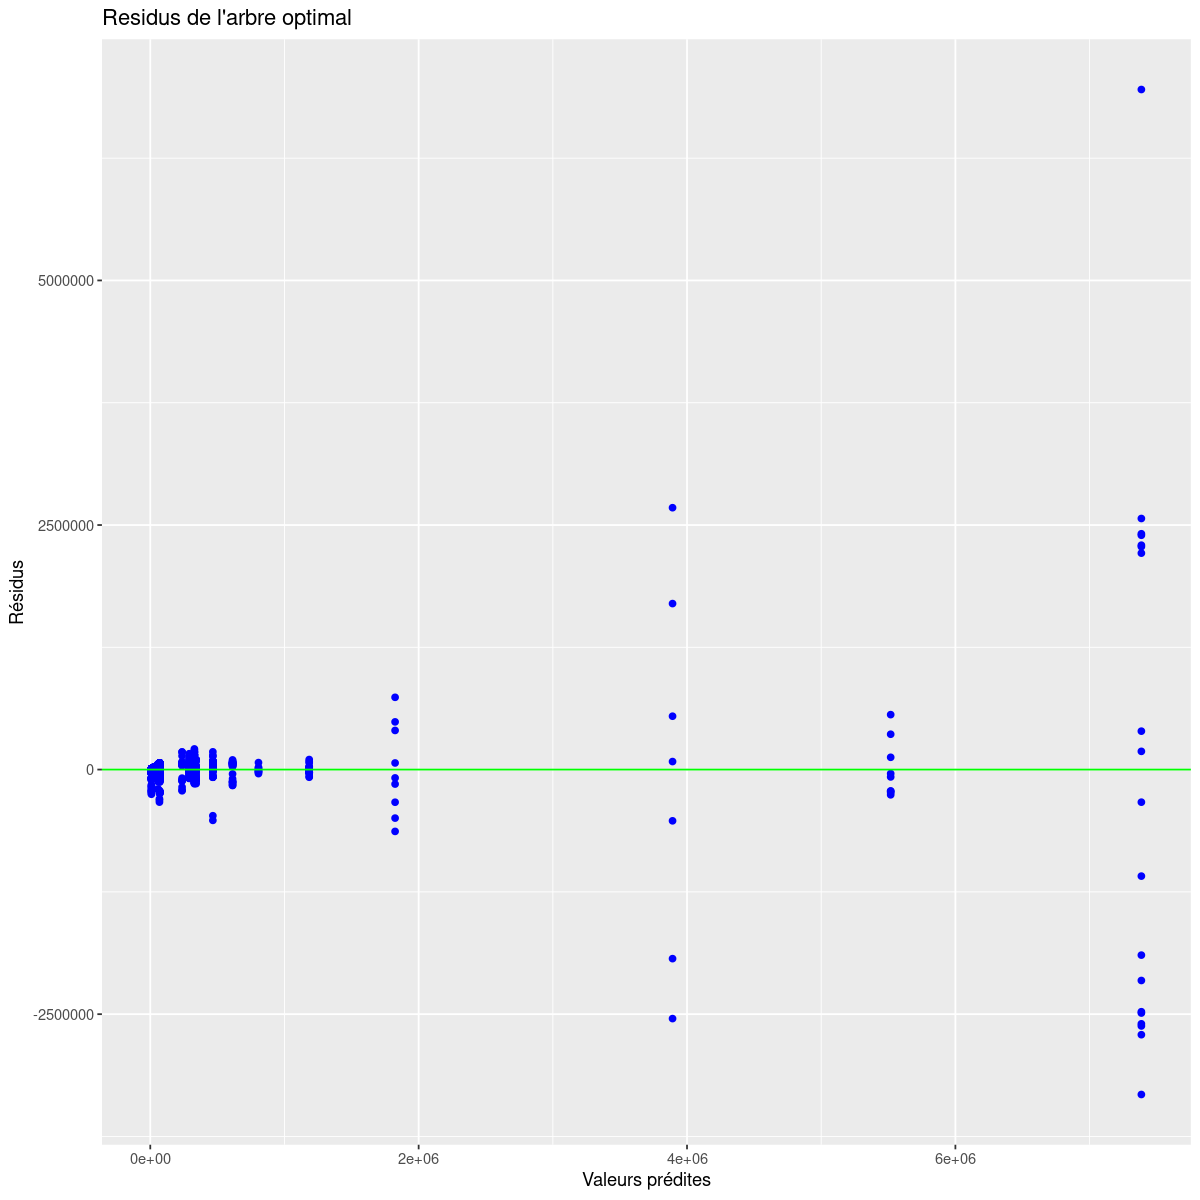

In [67]:
#Tracé des résidus 

fit.tree=predict(tree_opt_model)
res.tree=fit.tree-train_data_Year[,"CO2"]
options(repr.plot.width = 10, repr.plot.height = 10)
plot_res(fit.tree,res.tree,"Residus de l'arbre optimal")

#### d) Forêt aléatoire (Avec Year)

In [68]:
#Sélection des paramètres optimaux par validation croisée

rf_model <- randomForest(CO2 ~ ., data = train_data_Year, ntree = 500)

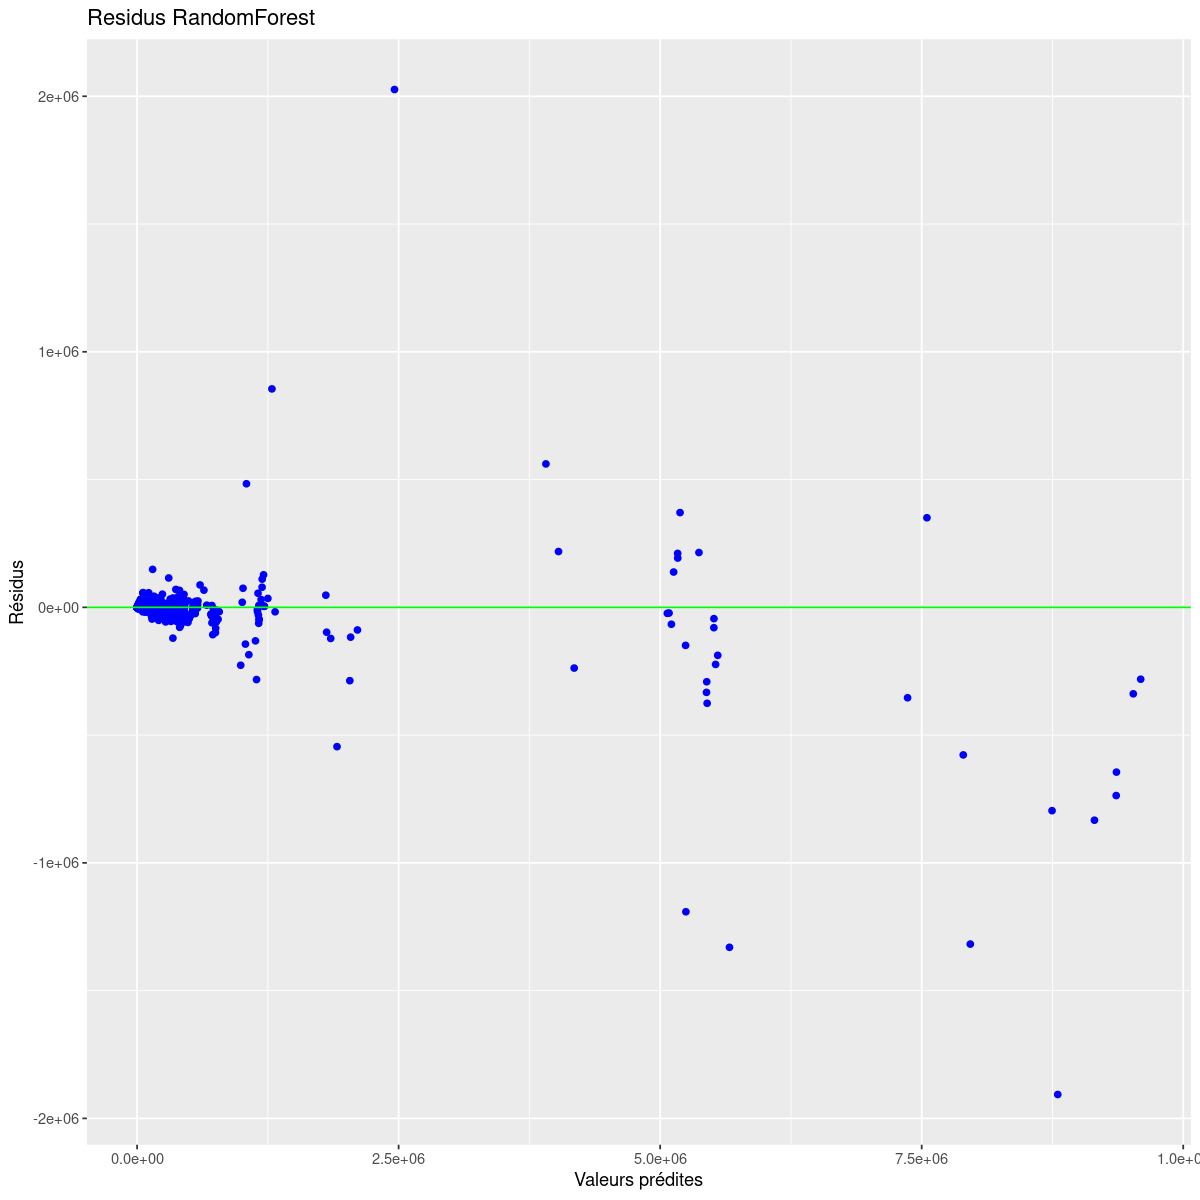

In [69]:
#Tracé des résidus
fit.rf=rf_model$predicted
res.rf=fit.rf-train_data_Year[,"CO2"]
plot_res(fit.rf,res.rf,titre="Residus RandomForest")

Warning message in fit.rf - test_data_Year[, "CO2"]:
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”


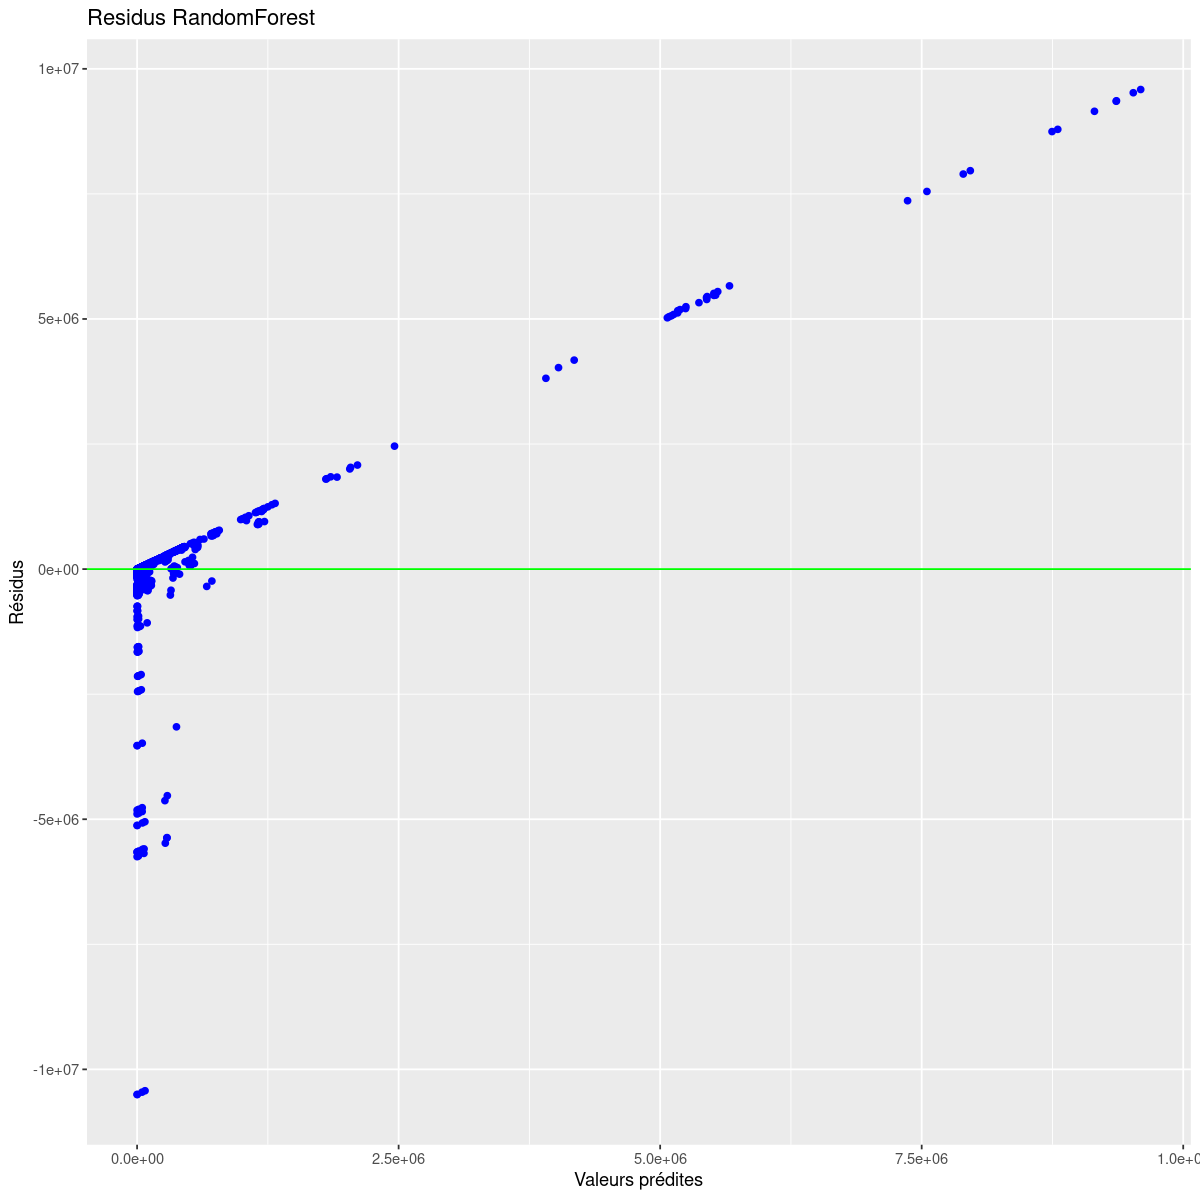

In [70]:
#Tracé des résidus sur l'échantillon de test
fit.rf=rf_model$predicted
res.rf=fit.rf-test_data_Year[,"CO2"]

plot_res(fit.rf,res.rf,titre="Residus RandomForest")

#### e) Boosting (Avec year)

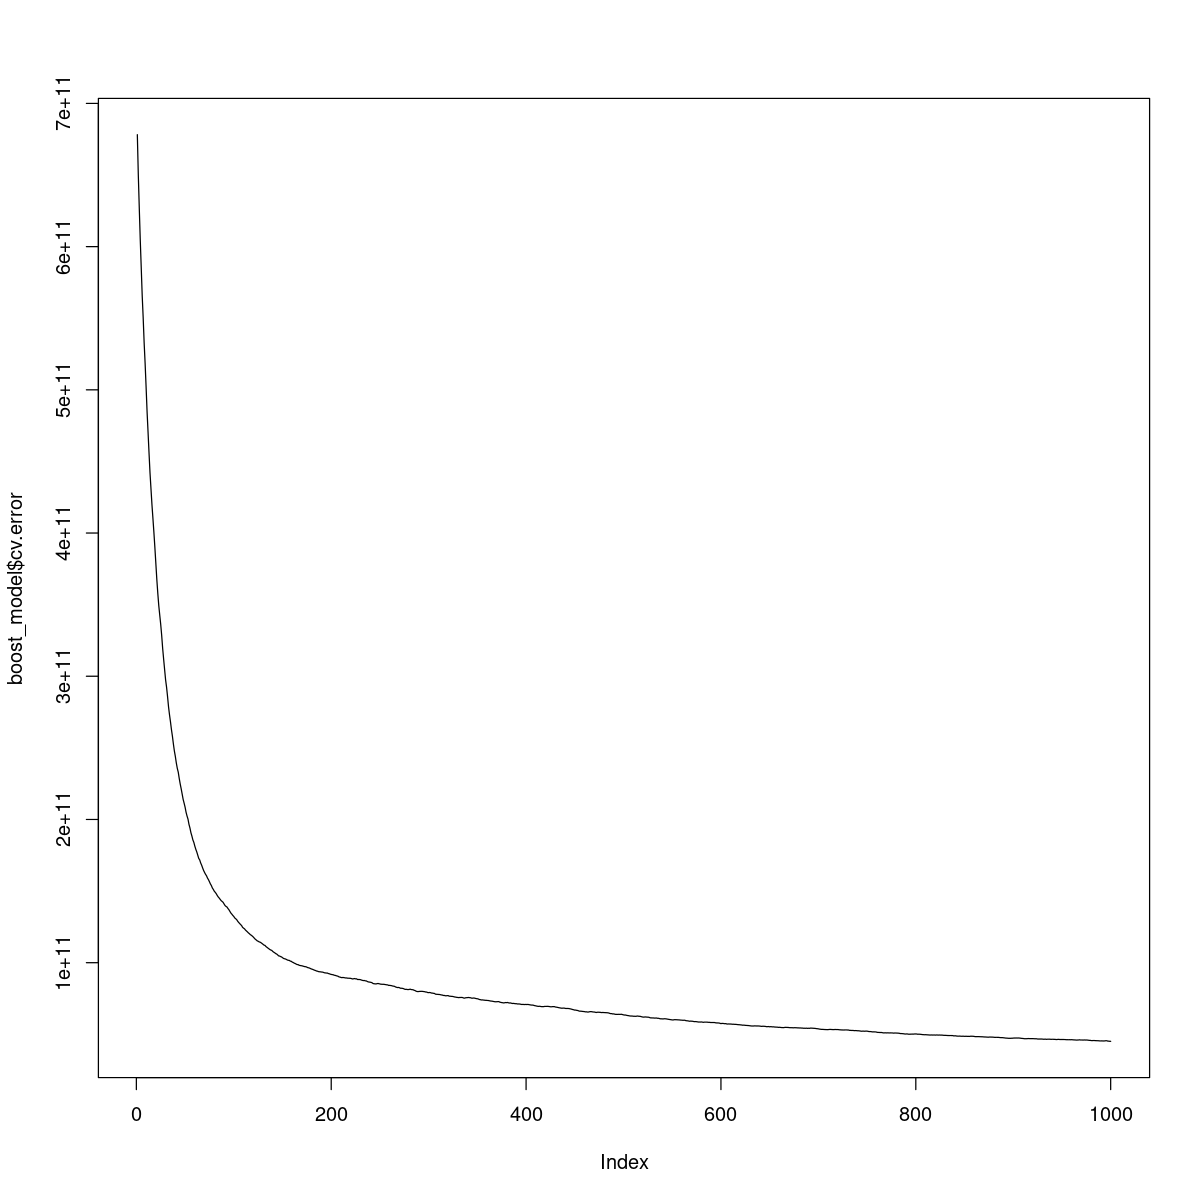

In [71]:
#Sélection des paramètres optimaux par validation croisée

boost_model <- gbm(CO2 ~ ., data = train_data_Year, distribution = "gaussian", n.trees = 1000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
plot(boost_model$cv.error, type = "l")

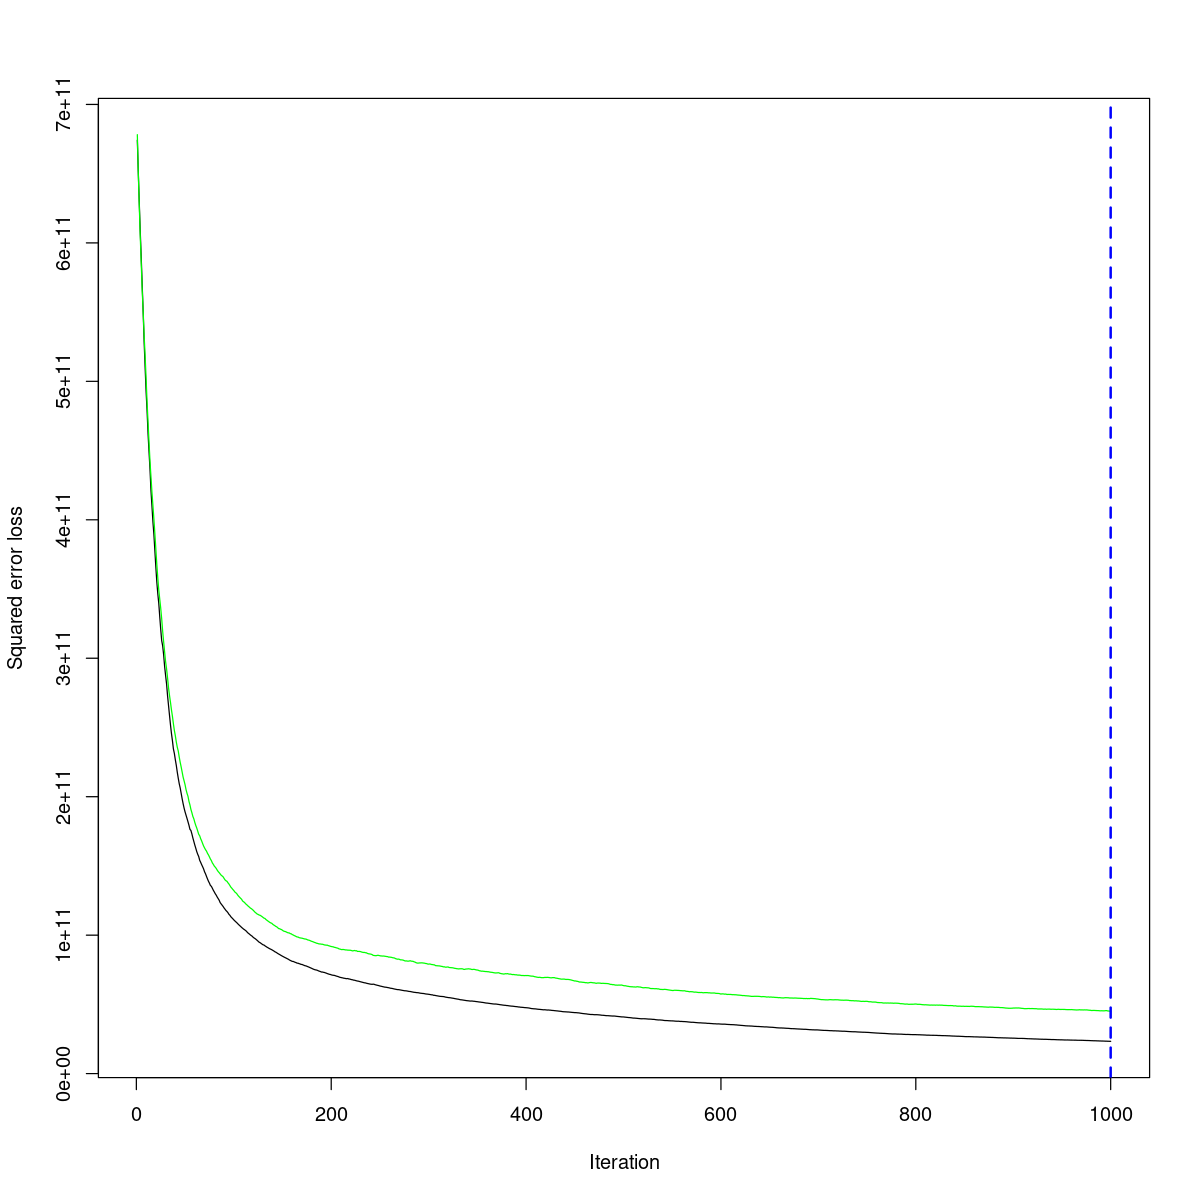

In [72]:
#Nombre optimal d'itérations par valiation croisée
best.iter=gbm.perf(boost_model,method="cv")

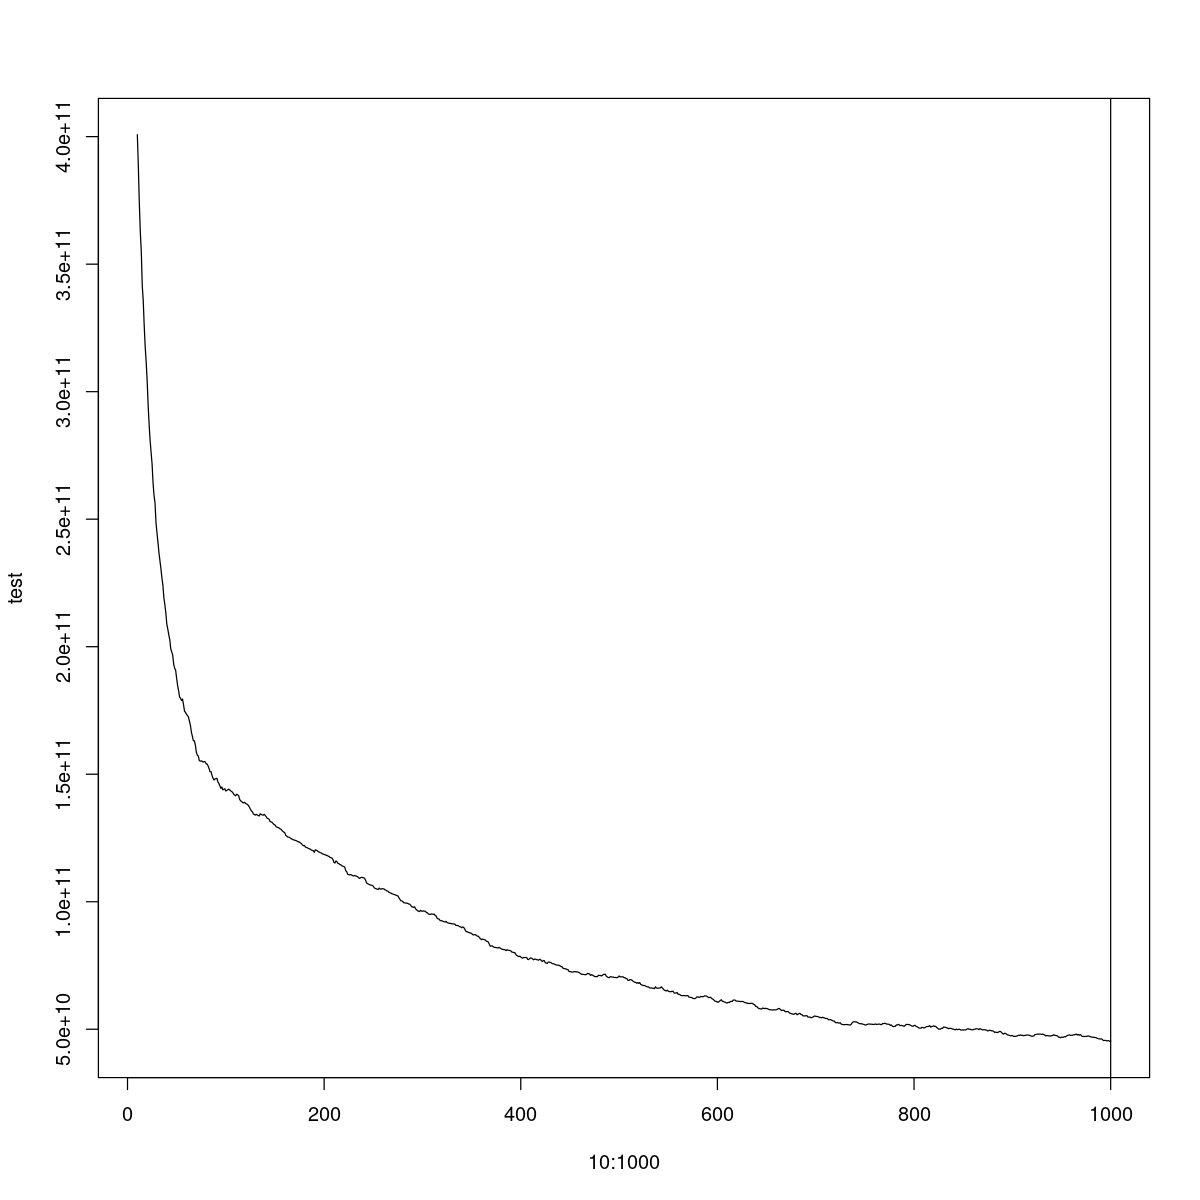

In [73]:
#On fait varier le coefficient de rétrécissement

#On vérifie donc qu'il n'y a pas de sur-ajustement : l'erreur reste stable autour du nombre d'arbres sélectionné et matérialisé par la ligne verticale

test=numeric()
for (i in 10:1000){
pred.test=predict(boost_model,newdata=test_data_Year,n.trees=i)
err=sum((pred.test-test_data_Year[,"CO2"])^2)/nrow(test_data_Year)
test=c(test,err)}
plot(10:1000,test,type="l")
abline(v=best.iter)

#### f) Réseau de neurones (sans Year)

In [74]:
# Sélection des paramètres optimaux par validation croisée
#reseau_model <- neuralnet(CO2 ~ ., data = train_data, hidden = c(5, 2))


# Entraînement du modèle de réseau de neurones pour la régression
# Assurez-vous d'adapter les noms des variables et le nom de l'ensemble de données en fonction de votre cas spécifique

res_neurones <- nnet(CO2 ~ ., data = train_data, size = 5, decay = 1, linout = TRUE, maxit = 500) 

# weights:  81
initial  value 1677461704349351.250000 
iter  10 value 1595416819291755.500000
iter  20 value 1537572145468253.000000
iter  30 value 1526130000014493.250000
final  value 1525959894893091.750000 
converged


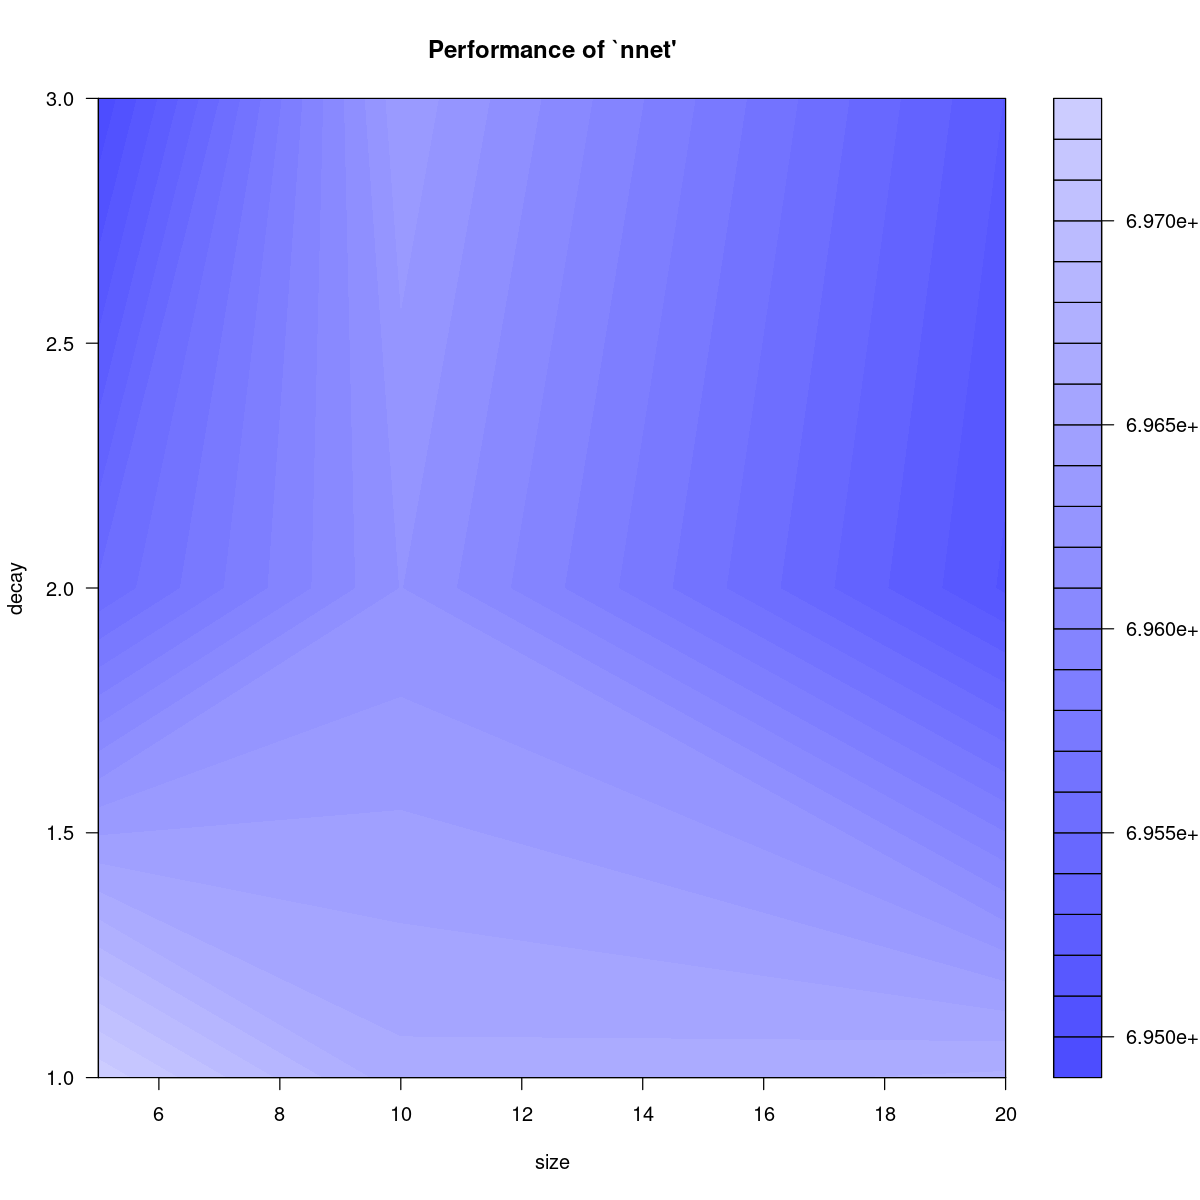

In [75]:
#On optimise les paramètres avec la validation croisée

plot(tune.nnet(CO2 ~ ., data = train_data, size = c(5, 10, 20), decay = c(1, 2, 3), maxit = 10, linout = TRUE))
#plot(tune.nnet(CO2 ~ ., data = train_data, size = 5:20, decay = 1:10))

# weights:  49
initial  value 1677462501951628.500000 
iter  10 value 1607913165952590.000000
iter  20 value 1598883338888157.750000
iter  30 value 1594729802929358.750000
iter  30 value 1594729802929013.000000
iter  30 value 1594729802928952.500000
final  value 1594729802928952.500000 
converged


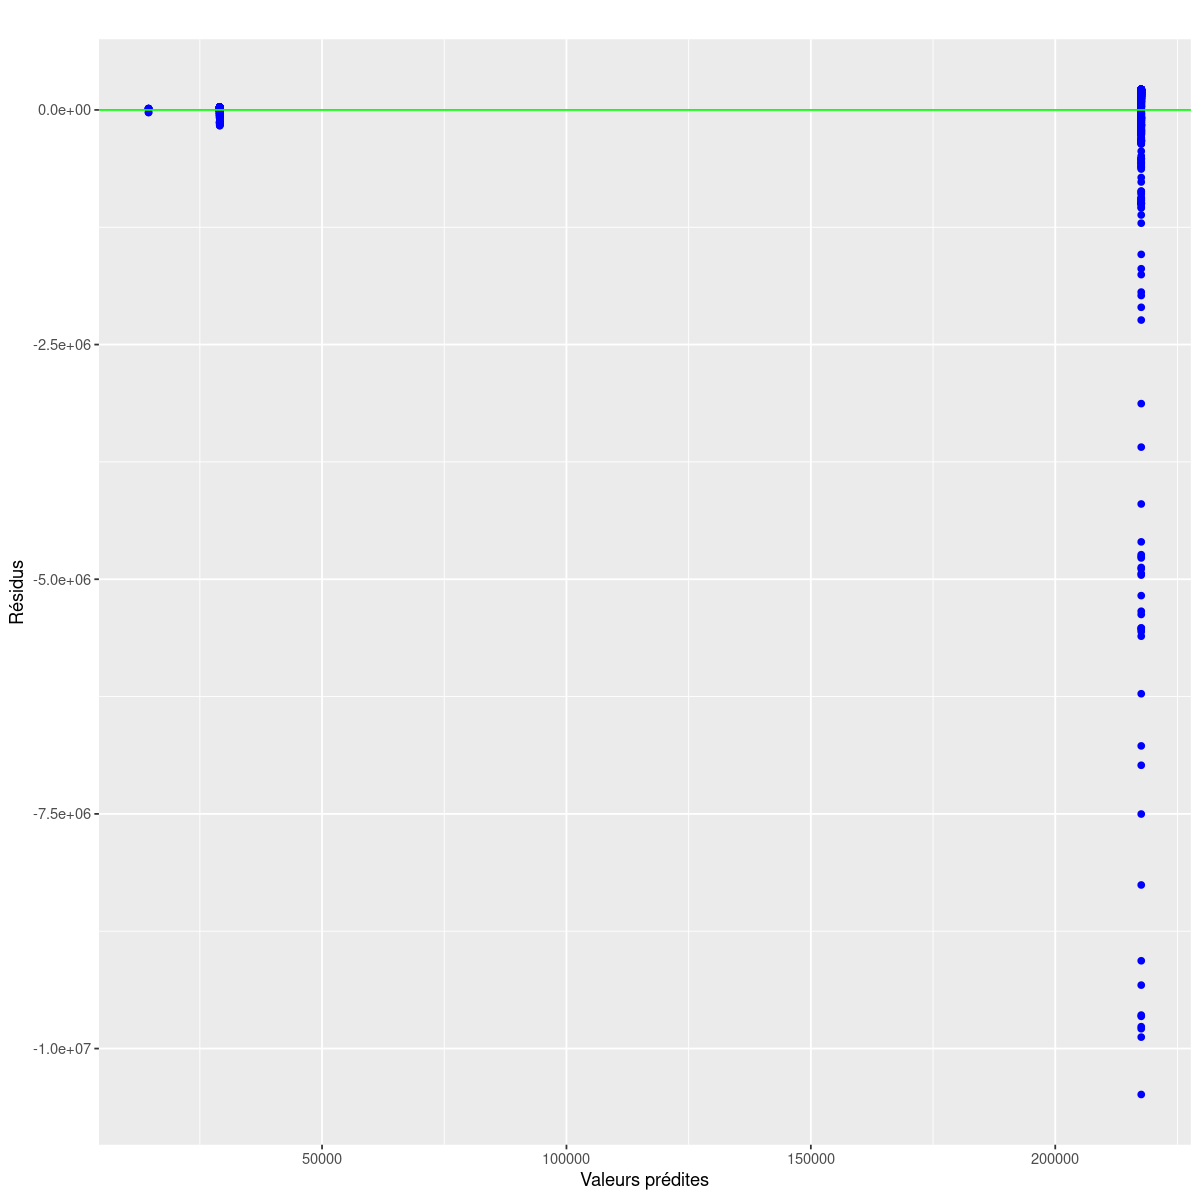

In [76]:
#On fait un modèle avec les paramètres optimisés 

res_neurones_opt=nnet(CO2~.,data=train_data,size=3,decay=2,linout=TRUE,maxit=200)

#On trace les résidus 
fit.nnetr=predict(res_neurones_opt,data=train_data)
res.nnetr=fit.nnetr-train_data[,"CO2"]
plot_res(fit.nnetr,res.nnetr,titre="")

### Question 3

In [77]:
#Prédiction sur l'ensemble de test
#Pour chaque modèle on va calculer l'erreur de généralisation


#Calculs des prédictions sur l'échantillon test pour tous les modèles optimaux

lm_AIC_pred <- predict(lm_model_AIC, newdata = test_data)
svm_pred <- predict(svm_reg, newdata = test_data)
tree_pred <- predict(tree_opt_model, newdata = test_data_Year)
rf_pred <- predict(rf_model, newdata = test_data_Year)
boost_pred <- predict(boost_model, newdata = test_data_Year)
neurones_pred <- predict(res_neurones_opt, newdata = test_data)

#Calculs des métriques de performance

lm_AIC_rmse <- RMSE(lm_AIC_pred, test_data$CO2)
svm_rmse <- RMSE(svm_pred, test_data$CO2)
tree_rmse<- RMSE(tree_pred, test_data_Year$CO2)
rf_rmse <- RMSE(rf_pred, test_data_Year$CO2)
boost_rmse <- RMSE(boost_pred, test_data_Year$CO2)
neurones_rmse <- RMSE(neurones_pred, test_data$CO2)

#On affiche les erreurs de généralisation calculées

cat("RMSE pour le modèle de régression linéaire avec AIC :", lm_AIC_rmse, "\n")
cat("RMSE pour le modèle SVM :", svm_rmse, "\n")
cat("RMSE pour le modèle d'arbre :", tree_rmse, "\n")
cat("RMSE pour le modèle de forêt aléatoire :", rf_rmse, "\n")
cat("RMSE pour le modèle Boosting :", boost_rmse, "\n")
cat("RMSE pour le modèle Réseau de neurones :", neurones_rmse, "\n")

Using 1000 trees...




RMSE pour le modèle de régression linéaire avec AIC : 308974.4 
RMSE pour le modèle SVM : 65573.18 
RMSE pour le modèle d'arbre : 237335.2 
RMSE pour le modèle de forêt aléatoire : 62826.08 
RMSE pour le modèle Boosting : 212898.5 
RMSE pour le modèle Réseau de neurones : 732012.4 


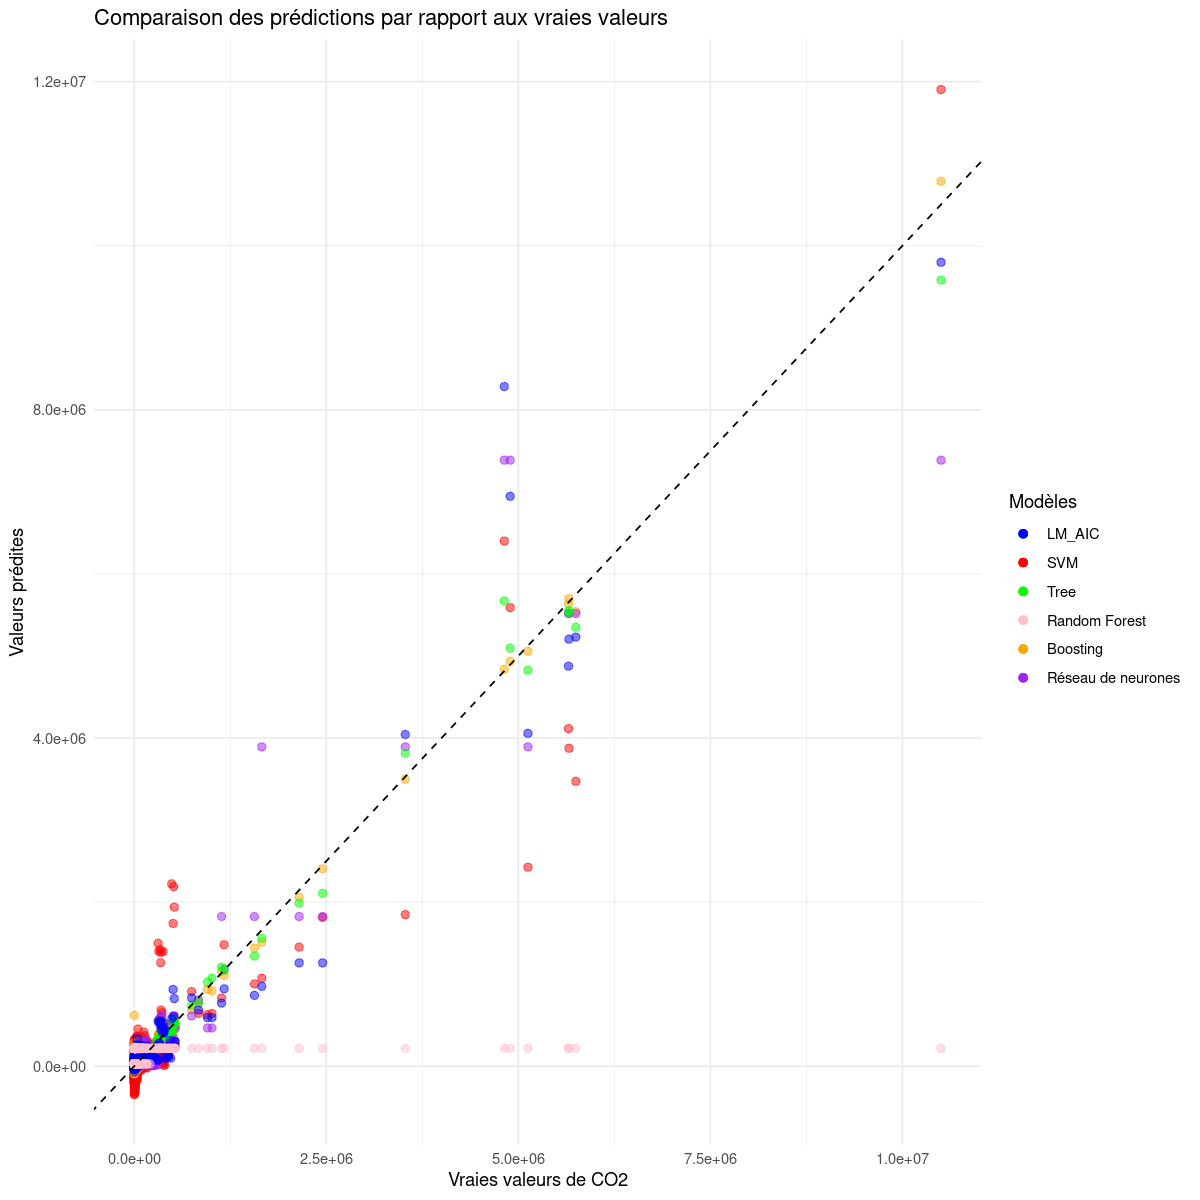

In [78]:
#On fait les prédictions des différents modèles
predictions <- data.frame(
  LM_AIC = lm_AIC_pred,
  SVM = svm_pred,
  Tree = tree_pred,
  Random_forest=rf_pred,
  Boost=boost_pred,
  Neur=neurones_pred
)

predictions$True <- test_data$CO2


ggplot(predictions, aes(x = True)) +
  geom_point(aes(y = LM_AIC, color = "LM_AIC"), size = 2, alpha = 0.5) + 
  geom_point(aes(y = SVM, color = "SVM"), size = 2, alpha = 0.5) + 
  geom_point(aes(y = Tree, color = "Tree"), size = 2, alpha = 0.5) +
  geom_point(aes(y = Random_forest, color = "Random Forest"), size = 2, alpha = 0.5) +
  geom_point(aes(y = Boost, color = "Boosting"), size = 2, alpha = 0.5)+
  geom_point(aes(y = Neur, color = "Réseau de neurones"), size = 2, alpha = 0.5)+
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") + 
  labs(title = "Comparaison des prédictions par rapport aux vraies valeurs",
       x = "Vraies valeurs de CO2",
       y = "Valeurs prédites",
       color = "Modèles") + 
  scale_color_manual(values = c("blue", "red", "green","pink","orange","purple"), labels = c("LM_AIC", "SVM", "Tree","Random Forest", "Boosting","Réseau de neurones")) + # 
  theme_minimal()

### Question 4

                                 Electricity_from_renewables 
                                                5.258914e+14 
                                                   Land_Area 
                                                4.115452e+14 
                                    Electricity_from_nuclear 
                                                2.194219e+14 
                                                   Longitude 
                                                1.054475e+14 
                                                    Latitude 
                                                6.206717e+13 
Renewable_energy_share_in_the_total_final_energy_consumption 
                                                4.805551e+13 
                                             Density_n_P_Km2 
                                                4.785878e+13 
                                      Low_carbon_electricity 
                                                4.632890e+13 
        

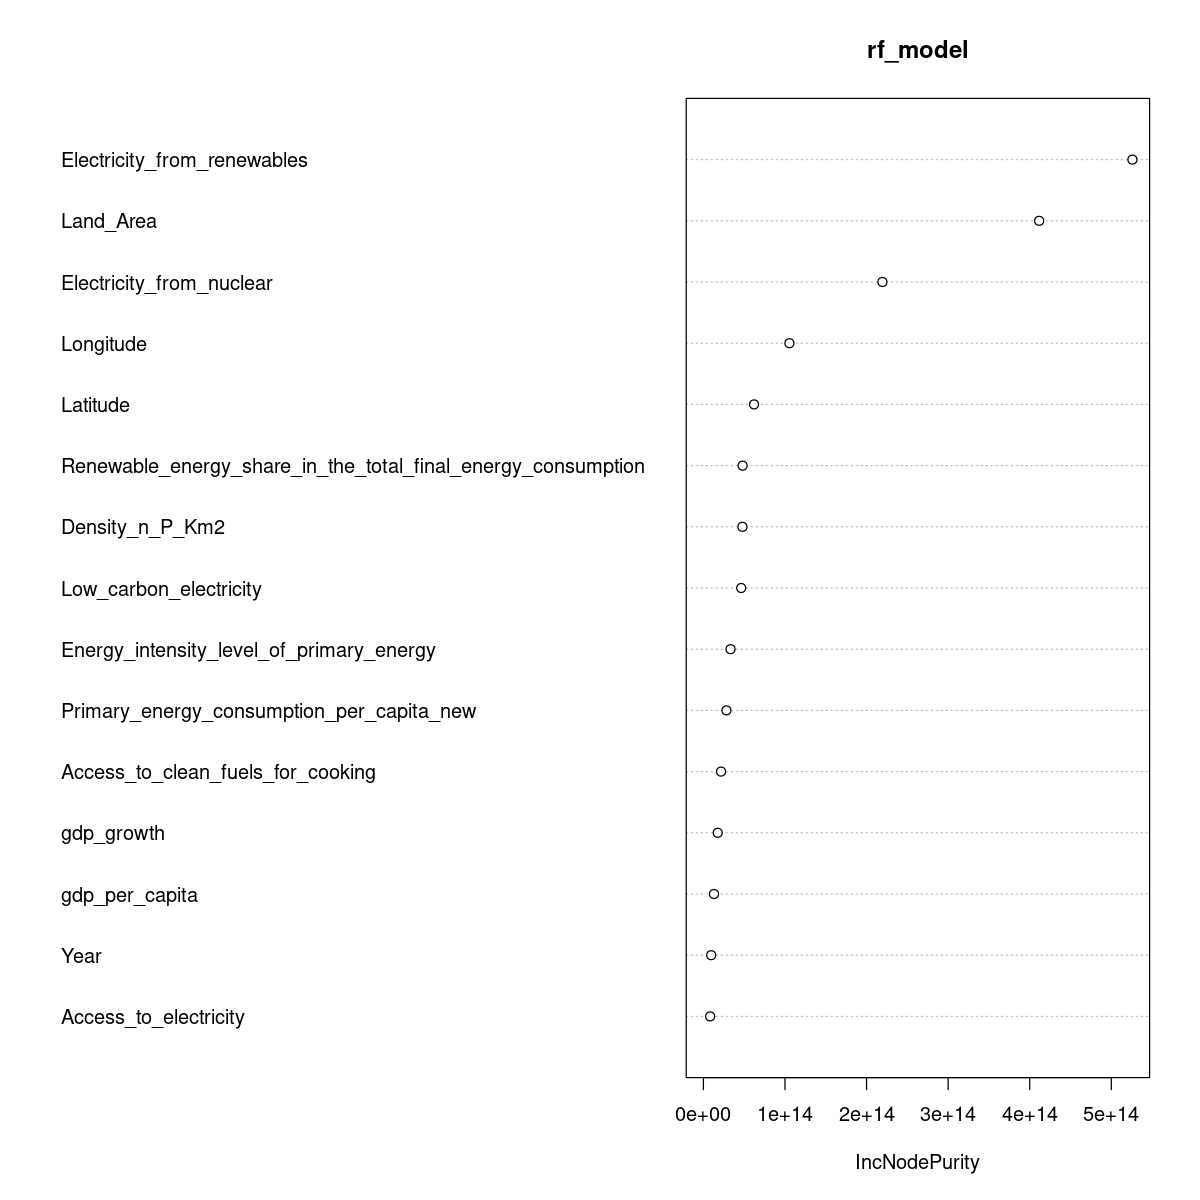

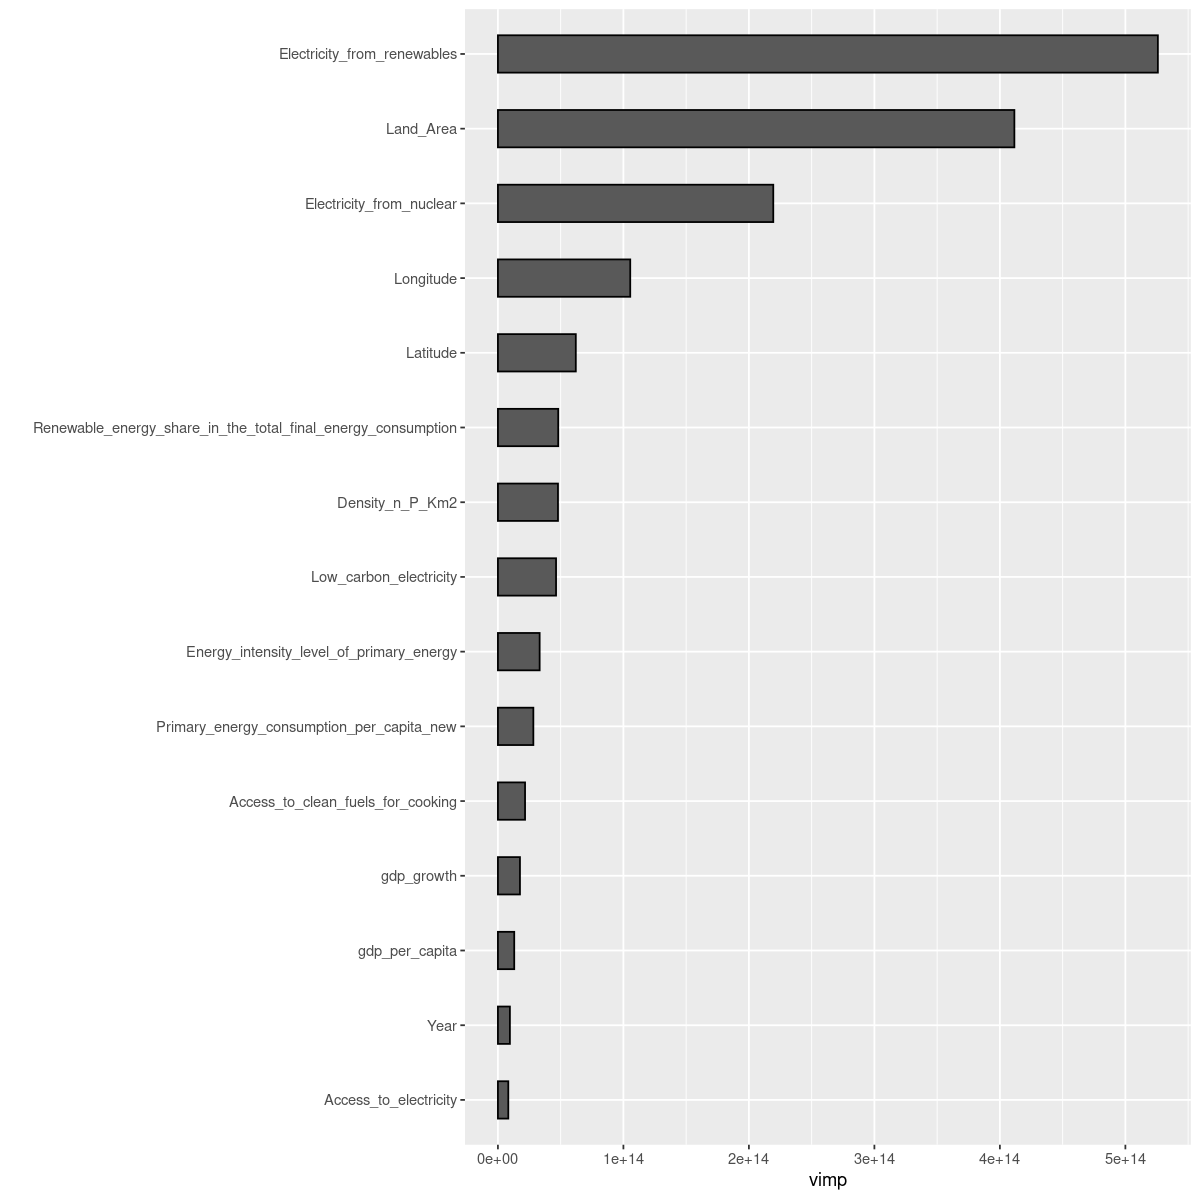

In [79]:
#On regarde l'importance des variables 


#Pour RandomForest:
importance <- round(importance(rf_model)[, 1], 2)
importance_sorted <- sort(importance, decreasing = TRUE)

#On affiche seulement les 10 premières variables les plus importantes

top_10_importance <- importance_sorted[1:10]
print(top_10_importance)

#On voit que pour Rf, c'est Electricity_from_renewables qui est la plus importante
varImpPlot(rf_model)

plot(gg_vimp(rf_model))


On a des résultats cohérents : les variables
Electricity_from_renewables, Land_area et Electricity_from_nuclear sont
très corrélées avec la variable C02 dans notre matrice de corrélation de
la partie 1. On voit que ce sont les 3 variables les plus importantes
pour le modèle de Random Forest.


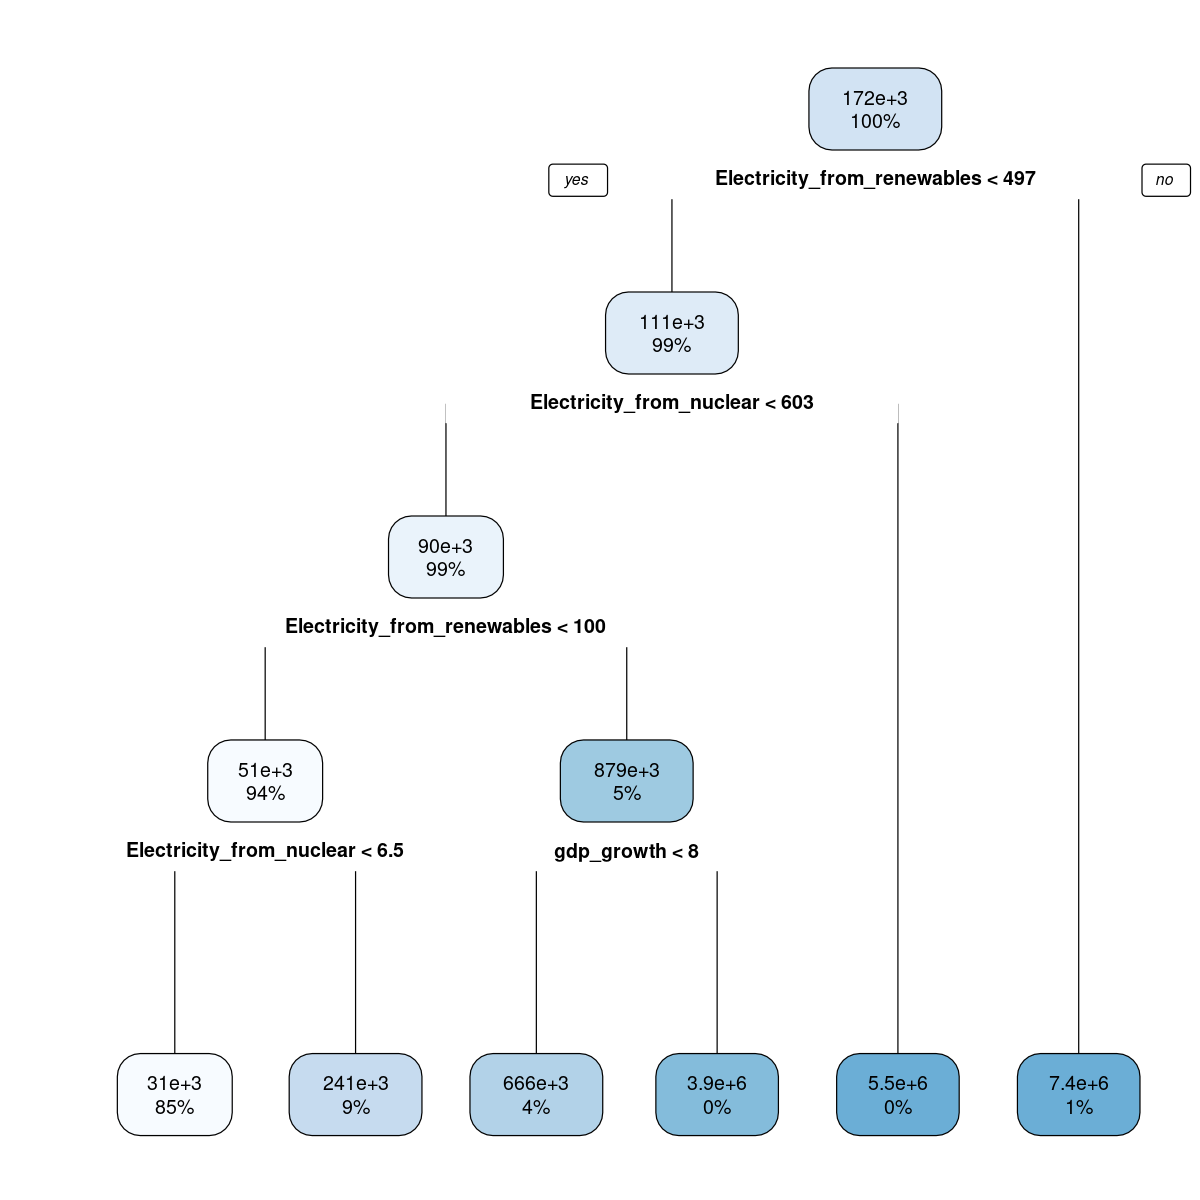

In [80]:
#Pour les arbres
rpart.plot(tree_model)

Pour les arbres on voit que la variable la plus importante est
Electricity_from_renewables (car en haut de l’arbre), c’est donc
également cohérent.

In [81]:
#Pour la regression linéaire
#cat("Coeff de Lasso :", coefficients(lasso_model), "\n")

coefficients(lm_model_AIC)

which.max(coefficients(lm_model_AIC))
which.max(coefficients(lm_model_complet))

coefficients(lm_model_complet)

(Intercept) 
                                                3.763015e+05 
                                       Access_to_electricity 
                                                2.185866e+03 
                           Access_to_clean_fuels_for_cooking 
                                               -2.253932e+03 
Renewable_energy_share_in_the_total_final_energy_consumption 
                                               -2.252255e+03 
                                    Electricity_from_nuclear 
                                                2.829076e+03 
                                 Electricity_from_renewables 
                                                6.068039e+03 
                                      Low_carbon_electricity 
                                               -2.710568e+03 
                    Energy_intensity_level_of_primary_energy 
                                                1.134387e+04 
                                                  gdp_growth 
                                                3.768760e+03 
                                              gdp_per_capita 
                                               -1.801015e+00 
                                                   Land_Area 
                                               -2.307935e-02 
                                                   Longitude 
                                                9.508969e+02 
                   Primary_energy_consumption_per_capita_new 
                                               -3.311763e+04

(Intercept) 
          1

(Intercept) 
          1

(Intercept) 
                                                3.764887e+05 
                                       Access_to_electricity 
                                                2.231942e+03 
                           Access_to_clean_fuels_for_cooking 
                                               -2.232522e+03 
Renewable_energy_share_in_the_total_final_energy_consumption 
                                               -2.243470e+03 
                                    Electricity_from_nuclear 
                                                2.835354e+03 
                                 Electricity_from_renewables 
                                                6.076513e+03 
                                      Low_carbon_electricity 
                                               -2.750894e+03 
                    Energy_intensity_level_of_primary_energy 
                                                1.143828e+04 
                                                  gdp_growth 
                                                3.865334e+03 
                                              gdp_per_capita 
                                               -1.687684e+00 
                                             Density_n_P_Km2 
                                               -8.581110e+00 
                                                   Land_Area 
                                               -2.407884e-02 
                                                    Latitude 
                                               -2.046287e+02 
                                                   Longitude 
                                                9.672614e+02 
                   Primary_energy_consumption_per_capita_new 
                                               -3.314944e+04

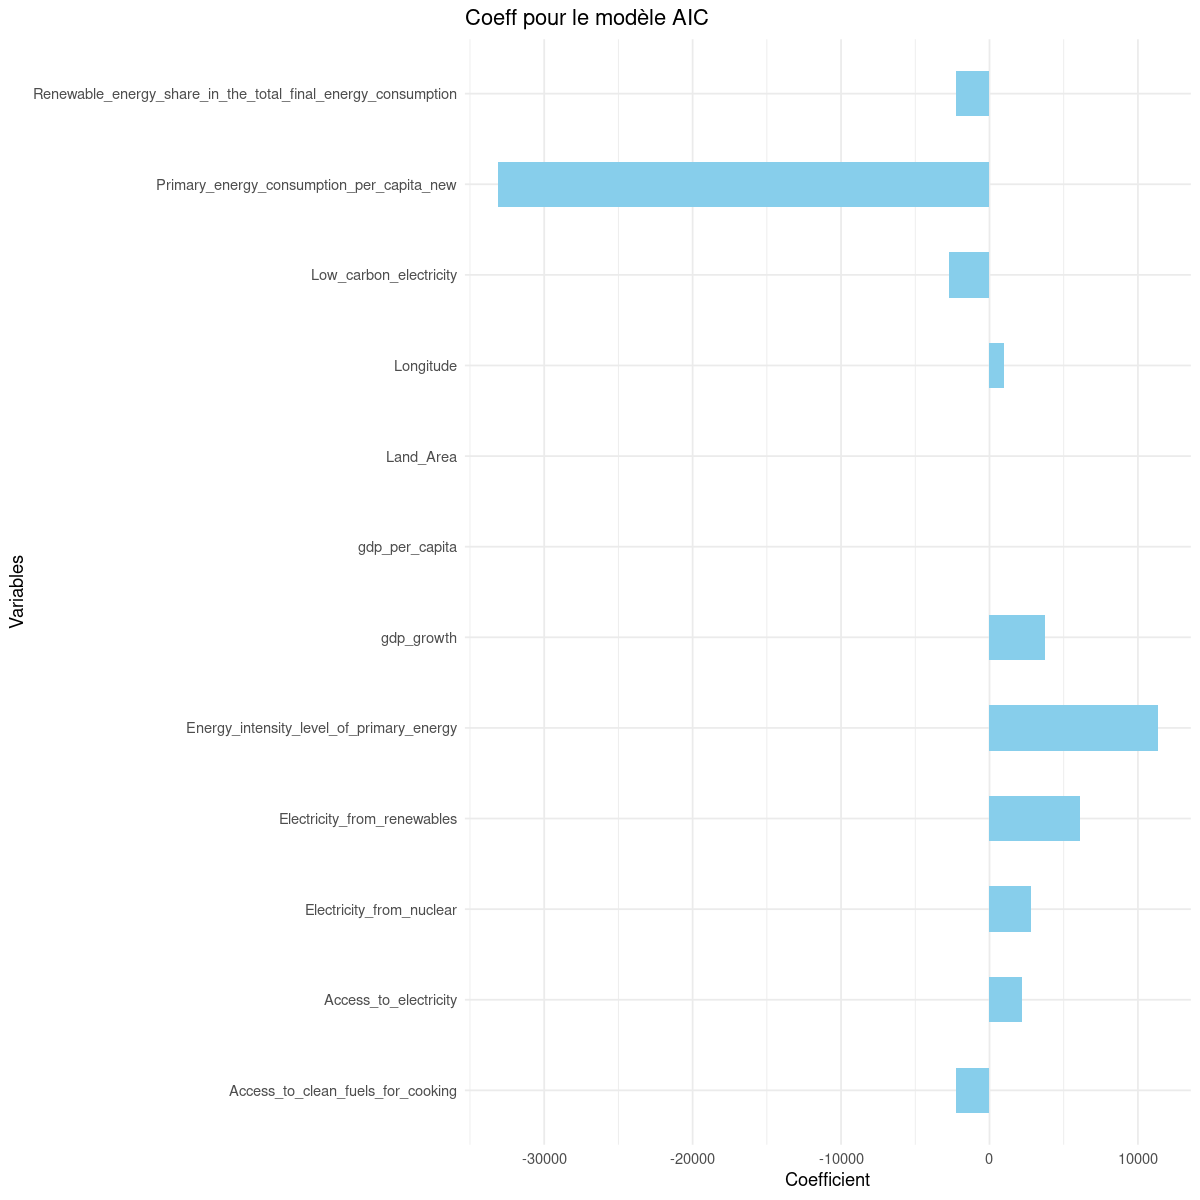

In [82]:
#Pour la regression linéaire on affiche les coeff des variables 

#Modele AIC
variable_names <- names(coefficients(lm_model_AIC))
coefficients <- coef(lm_model_AIC)

reg_aic_coefficients <- data.frame(
  Variables = variable_names,
  Coefficient = coefficients
)

#On enlève l'intercept pour le graphe
reg_aic_coefficients <- reg_aic_coefficients[reg_aic_coefficients$Variables != "(Intercept)", ]
ggplot(reg_aic_coefficients, aes(x = Variables, y = Coefficient)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.5) +
  coord_flip() +
  labs(title = "Coeff pour le modèle AIC",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()

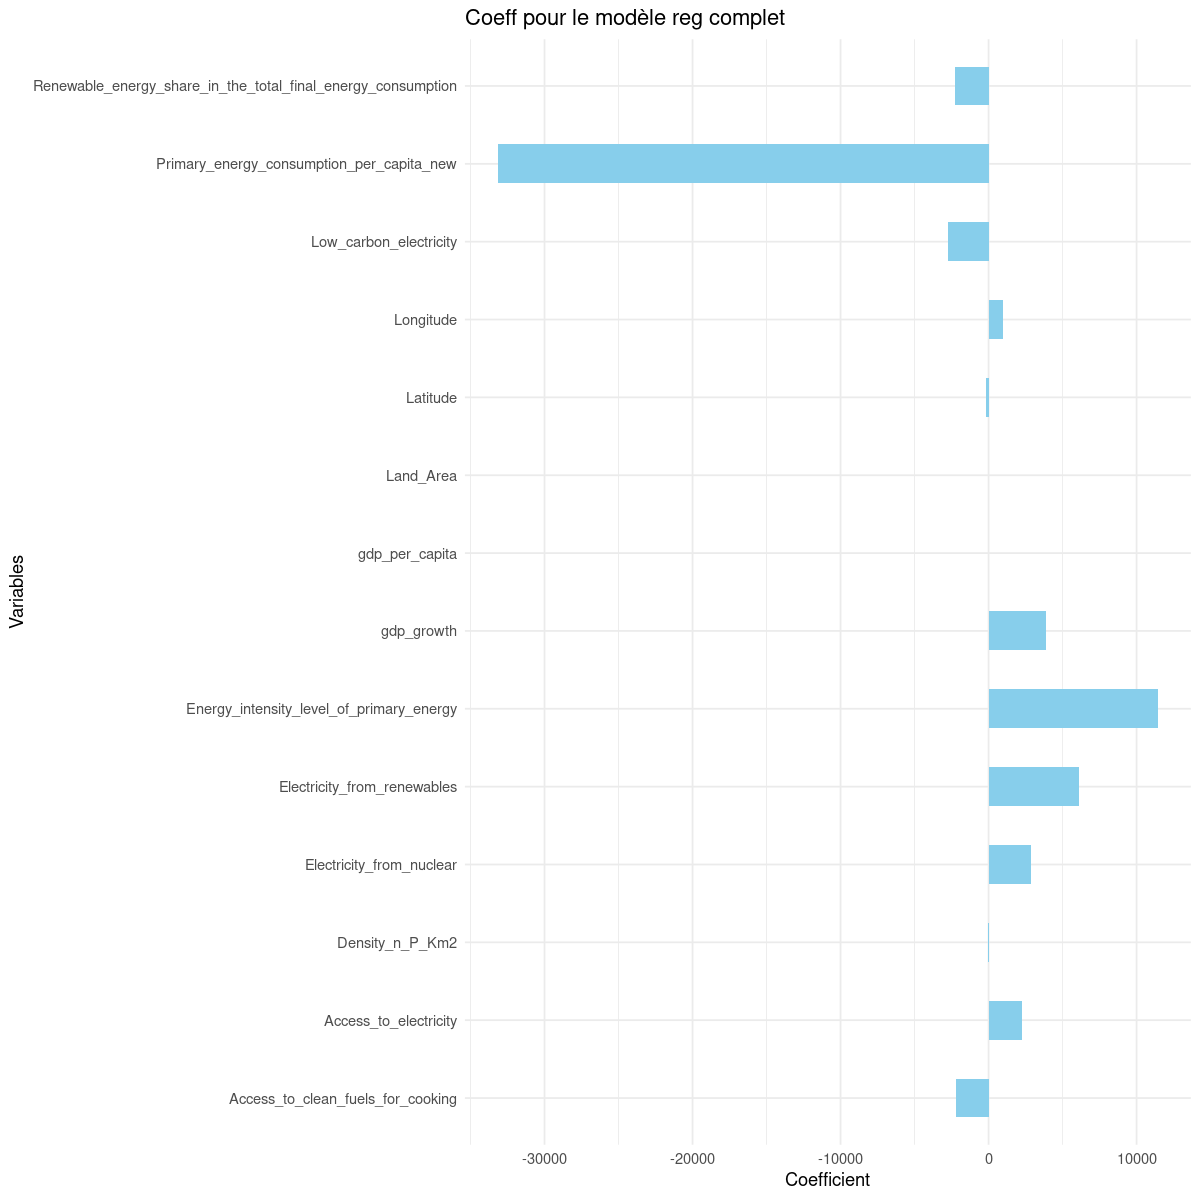

In [83]:
#Modele complet

variable_names <- names(coefficients(lm_model_complet))
coefficients <- coef(lm_model_complet)

reg_complet_coefficients <- data.frame(
  Variables = variable_names,
  Coefficient = coefficients
)

#On enlève l'intercept pour le graphe
reg_complet_coefficients <- reg_complet_coefficients[reg_complet_coefficients$Variables != "(Intercept)", ]
ggplot(reg_complet_coefficients, aes(x = Variables, y = Coefficient)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.5) +
  coord_flip() +
  labs(title = "Coeff pour le modèle reg complet",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()

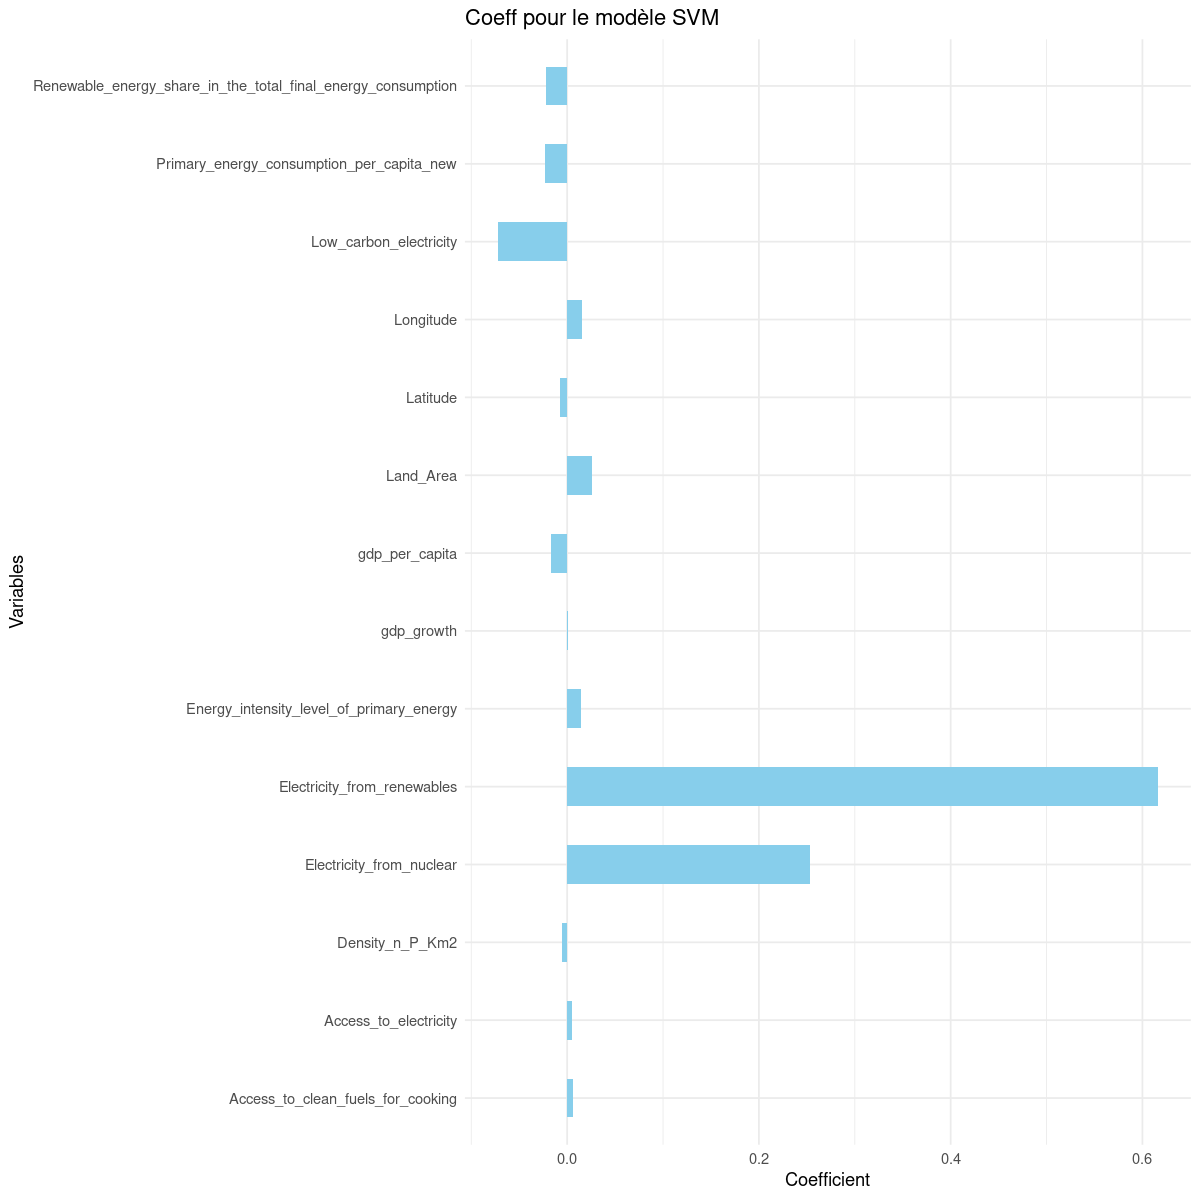

In [85]:

#Pour SVM on affiche les coeff des variables 

variable_names <- names(coef(svm_model_linear))
coefficients <- coef(svm_model_linear)

svm_coefficients <- data.frame(
  Variables = variable_names,
  Coefficient = coefficients
)

#On enlève l'intercept pour le graphe
svm_coefficients <- svm_coefficients[svm_coefficients$Variables != "(Intercept)", ]
ggplot(svm_coefficients, aes(x = Variables, y = Coefficient)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.5) +
  coord_flip() +
  labs(title = "Coeff pour le modèle SVM",
       x = "Variables",
       y = "Coefficient") +
  theme_minimal()


On voit également que c’est Electricty_from_renewables qui est la plus
importante.


### Question 5

In [119]:
#Imputation des données manquantes par la moyenne de chaque variable

#On enlève les individus avec des Y manquants
data2_clean <- data2 %>% filter(!is.na(CO2))


#On impute que pour les variables quantitatives (ici pas de pb puisque les 2 qualitatives Year et Entity n'avaient pas de données manquantes)
data5 <- data2_clean %>% mutate_if(is.numeric, ~ifelse(is.na(.), mean(., na.rm = TRUE), .))

#On enlève Electricity.from.fossil.fuels.TWh pour rester cohérent
data5 <- subset(data5, select = -c(Electricity_from_fossil_fuels))

#On vérifie qu'il n'y a plus de données manquantes
données_manquantes2 <- colSums(is.na(data5))
print(données_manquantes2)



                                                      Entity 
                                                           0 
                                                        Year 
                                                           0 
                                       Access_to_electricity 
                                                           0 
                           Access_to_clean_fuels_for_cooking 
                                                           0 
Renewable_energy_share_in_the_total_final_energy_consumption 
                                                           0 
                                    Electricity_from_nuclear 
                                                           0 
                                 Electricity_from_renewables 
                                                           0 
                                      Low_carbon_electricity 
                                                           0 
        

On voit bien que toutes les variables n'ont plus de valeurs manquantes.

In [ ]:
#On refait un découpage de notre jeu de données en test et train

#On sélectionne les variables prédictives : toutes sauf la variable à prédire
#On enlève également les variables quantitatives

X <- subset(data5, select =-c(Entity,CO2))

# On garde la variable à prédire : CO2

y <- data5$CO2

set.seed(123)

#On divise les données en un ensemble d'apprentissage et un ensemble de test

#Ici on garde que 20% des données pour l'échantillon test

train_index <- createDataPartition(y, p = 0.8, list = FALSE)

#Données d'apprentissage :
train_data_Year <- data5[train_index, ]
train_data <- subset(train_data_Year, select =-c(Year))

#Données de test :
test_data_Year <- data5[-train_index, ]
test_data <- subset(test_data_Year, select =-c(Year))


On teste de nouveau les algorithmes qui se sont montrés les plus performants

## Fôret aléatoire

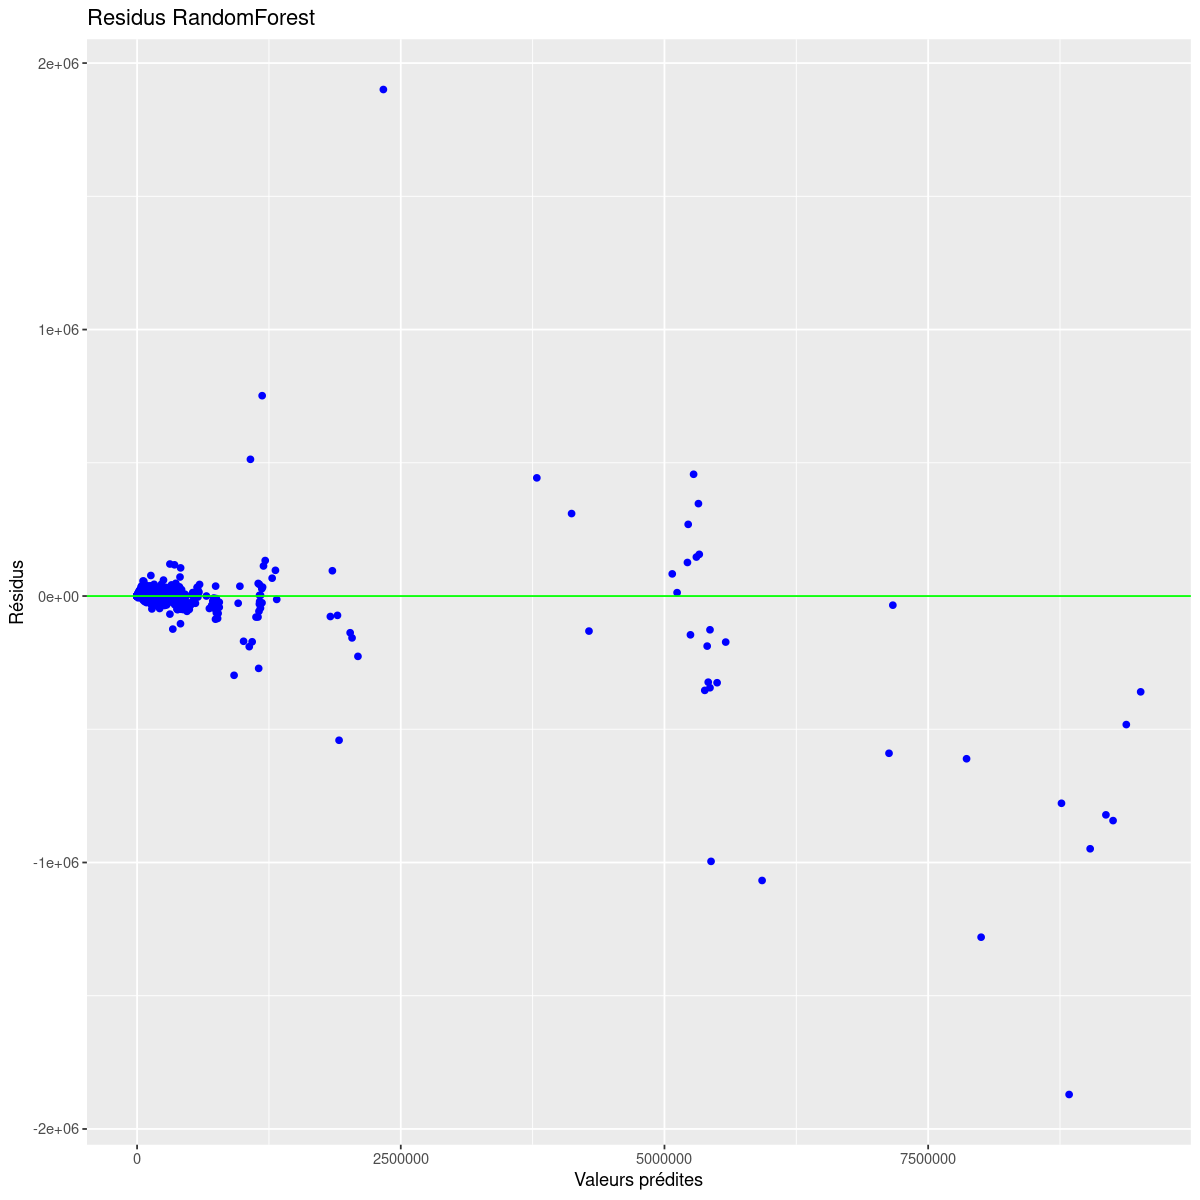

In [91]:
#Sélection des paramètres optimaux par validation croisée

rf_model2 <- randomForest(CO2 ~ ., data = train_data_Year, ntree = 500)
#Tracé des résidus
fit.rf=rf_model2$predicted
res.rf=fit.rf-train_data_Year[,"CO2"]
plot_res(fit.rf,res.rf,titre="Residus RandomForest")

## SVM

In [92]:
set.seed(2021)
svm.reg.tune2 = tune.svm(CO2 ~ ., data = train_data, cost = c(1,10,100,1000,5000), 
    gamma = seq(0.1, 0.5, by = 0.05))

svm_reg2 = svm(CO2 ~ ., data = train_data, cost = svm.reg.tune2$best.parameters$cost, 
    gamma = svm.reg.tune2$best.parameters$gamma)
summary(svm_reg2)

Warning message in deparse(x$call, 0.8 * getOption("width")):
“'cutoff' incorrect pour 'deparse', utilisation de la valeur par défaut”



Call:
svm(formula = CO2 ~ ., data = train_data, cost = svm.reg.tune2$best.parameters$cost, 
    gamma = svm.reg.tune2$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1000 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  240






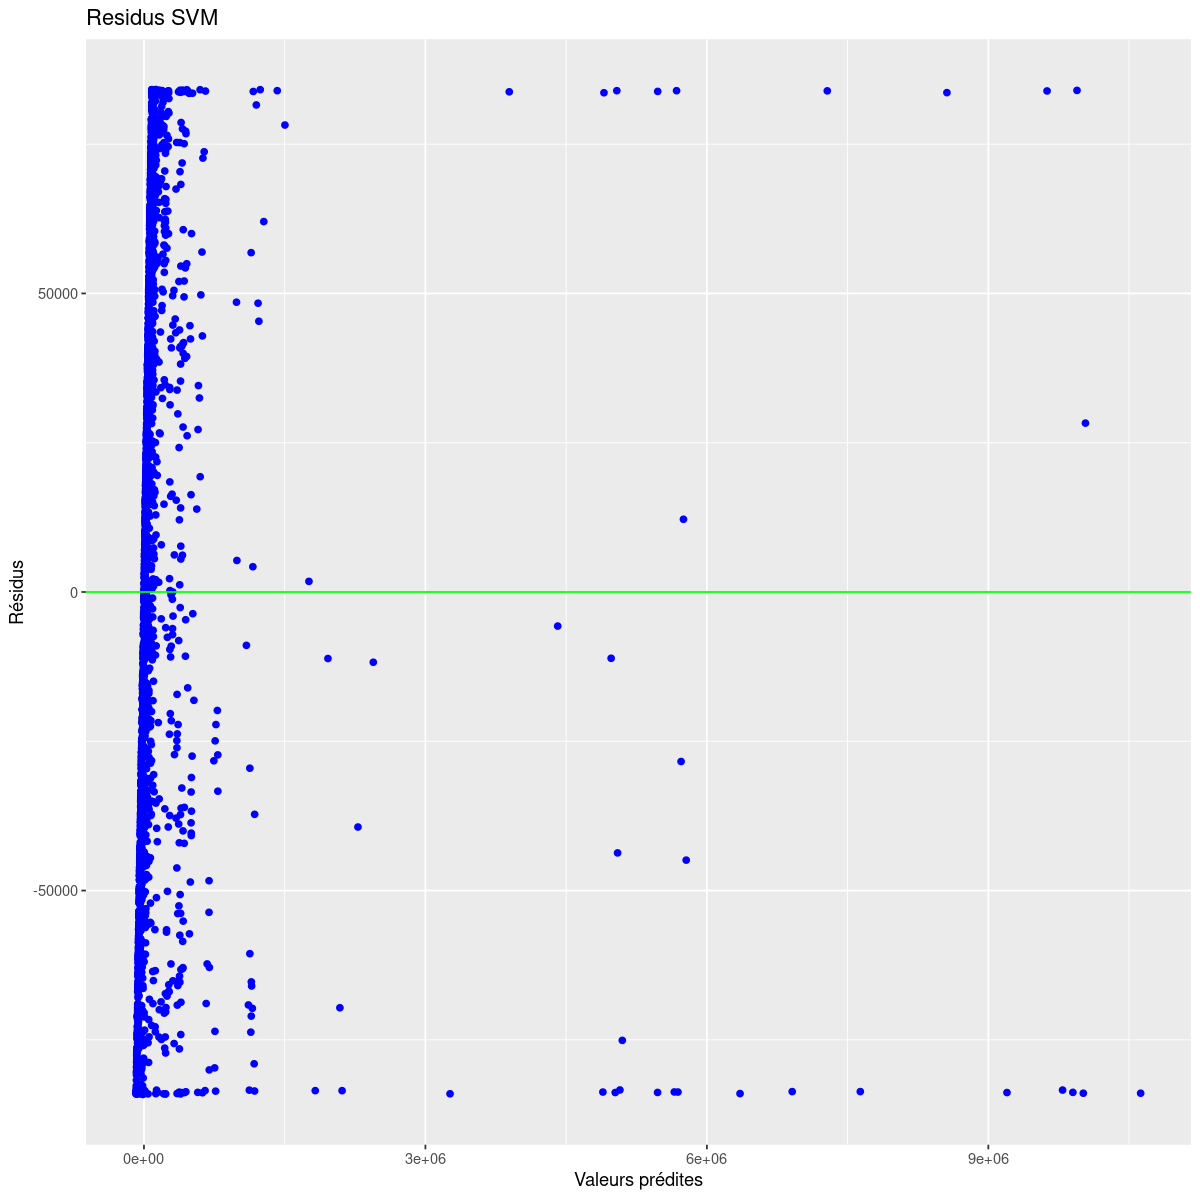

In [94]:
#Tracé des résidus
fit.svmr = svm_reg2$fitted
res.svmr = fit.svmr - train_data[,"CO2"]


plot_res(fit.svmr,res.svmr,titre="Residus SVM")

In [95]:

#Calculs des prédictions sur l'échantillon test pour tous les modèles optimaux


svm_pred2 <- predict(svm_reg2, newdata = test_data)
rf_pred2 <- predict(rf_model2, newdata = test_data_Year)

#Calculs des métriques de performance

svm_rmse2 <- RMSE(svm_pred2, test_data$CO2)
rf_rmse2 <- RMSE(rf_pred2, test_data_Year$CO2)


#On affiche les erreurs de généralisation calculées

cat("RMSE pour le modèle SVM avec imputation :", svm_rmse2, "et sans :",  svm_rmse,"\n")
cat("RMSE pour le modèle de forêt aléatoire avec imputation:", rf_rmse2, "et sans : ", rf_rmse,"\n")


RMSE pour le modèle SVM avec imputation : 65573.18 et sans : 65573.18 
RMSE pour le modèle de forêt aléatoire avec imputation: 69495.89 et sans :  62826.08 






On voit donc que pour le modèle SVM, l'erreur est stable avec ou sans imputation. On peut voir que pour RandomForest, l'erreur augmente avec imputations.
C'est normal car l'algorithme de complétion par la moyenne n'est pas l'idéal pour notre jeu de données.


On va tester un algorithme de complétion par Randomforest : 

In [114]:
#Imputation des données manquantes par la moyenne de chaque variable

#On enlève les individus avec des Y manquants
data2_clean <- data2 %>% filter(!is.na(CO2))


#On impute que pour les variables quantitatives (ici pas de pb puisque les 2 qualitatives Year et Entity n'avaient pas de données manquantes)
data5 <- missForest(subset(data2_clean, select = -c(Entity)))$ximp

#On enlève Electricity.from.fossil.fuels.TWh pour rester cohérent
data5 <- subset(data5, select = -c(Electricity_from_fossil_fuels))
data5$Entity=data2_clean$Entity

#On vérifie qu'il n'y a plus de données manquantes
données_manquantes2 <- colSums(is.na(data5))
print(données_manquantes2)



                                                        Year 
                                                           0 
                                       Access_to_electricity 
                                                           0 
                           Access_to_clean_fuels_for_cooking 
                                                           0 
Renewable_energy_share_in_the_total_final_energy_consumption 
                                                           0 
                                    Electricity_from_nuclear 
                                                           0 
                                 Electricity_from_renewables 
                                                           0 
                                      Low_carbon_electricity 
                                                           0 
                    Energy_intensity_level_of_primary_energy 
                                                           0 
        

In [115]:
#On sélectionne les variables prédictives : toutes sauf la variable à prédire
#On enlève également les variables qualitatives

X <- subset(data5, select =-c(Entity,CO2))

# On garde la variable à prédire : CO2

y <- data5$CO2

set.seed(123)

#On divise les données en un ensemble d'apprentissage et un ensemble de test

#Ici on garde que 20% des données pour l'échantillon test

train_index <- createDataPartition(y, p = 0.8, list = FALSE)

#Données d'apprentissage :
train_data_Year <- data5[train_index, ]
train_data <- subset(train_data_Year, select =-c(Year))

#Données de test :
test_data_Year <- data5[-train_index, ]
test_data <- subset(test_data_Year, select =-c(Year))


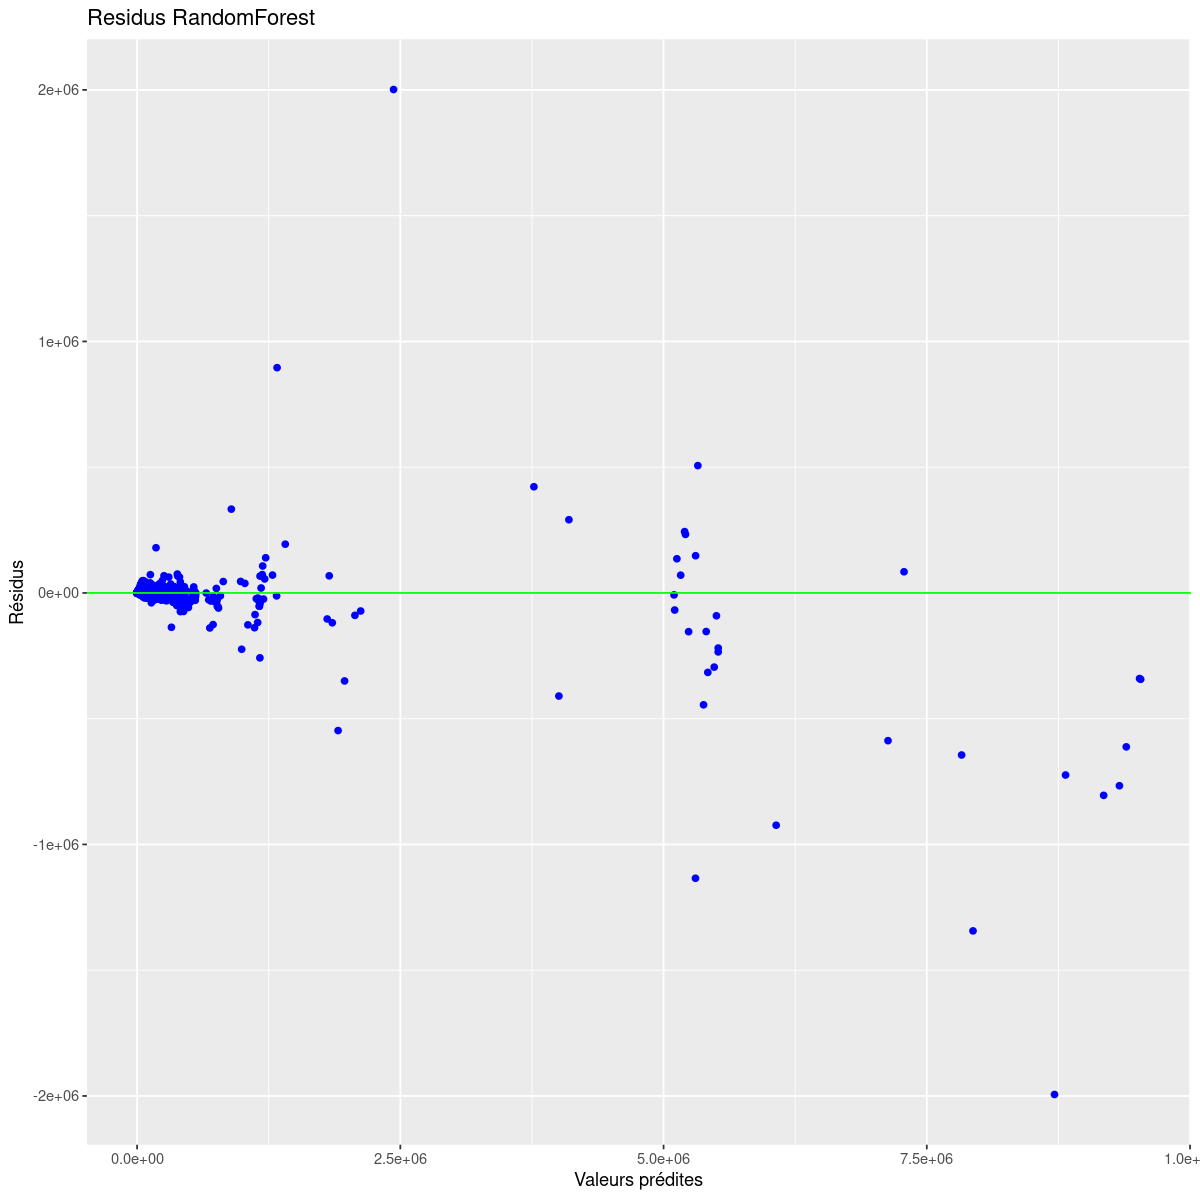

In [116]:
#Sélection des paramètres optimaux par validation croisée

rf_model2 <- randomForest(CO2 ~ ., data = train_data_Year, ntree = 500)
#Tracé des résidus
fit.rf=rf_model2$predicted
res.rf=fit.rf-train_data_Year[,"CO2"]
plot_res(fit.rf,res.rf,titre="Residus RandomForest")

In [118]:
#Calculs des prédictions sur l'échantillon test 

rf_pred2 <- predict(rf_model2, newdata = test_data_Year)

#Calcul des métriques de performance

rf_rmse2 <- RMSE(rf_pred2, test_data_Year$CO2)

#On affiche les erreurs de généralisation calculées

cat("RMSE pour le modèle de forêt aléatoire avec imputation:", rf_rmse2, "et sans : ", rf_rmse,"\n")


RMSE pour le modèle de forêt aléatoire avec imputation: 68220.82 et sans :  62826.08 


On voit ainsi que l'algorithme de complétion par MissForest permet de réduire l'erreur comparé à celle avec complétion par la moyenne.